In [1]:
import os
os.environ["SPRITZ_PATH"] = os.path.abspath('..')

In [2]:
import spritz
print(dir(spritz))
from spritz.utils import rucio_utils
from dbs.apis.dbsClient import DbsApi

files = {
    #SSWW 
    "SSWW_EWK": {
        "query": "/WWto2L2Nu-2Jets_SS_noTop_EW_TuneCP5_13p6TeV_madgraph-pythia8/Run3Summer22EENanoAODv12-130X_mcRun3_2022_realistic_postEE_v6-v2/NANOAODSIM",
        "files": [],

    },
    "SSWW_QCD": {
        "query": "/WWto2L2Nu-2Jets_SS_noTop_QCD_TuneCP5_13p6TeV_madgraph-pythia8/Run3Summer22EENanoAODv12-130X_mcRun3_2022_realistic_postEE_v6-v2/NANOAODSIM",
        "files": [],
    },

    #SSWW polarized

    "SSWW_TT": {
        "query": "/VBS-SSWW_PolarizationTT_TuneCP5_13p6TeV_madgraph-pythia8/Run3Summer22EENanoAODv12-130X_mcRun3_2022_realistic_postEE_v6-v3/NANOAODSIM",
        "files": [],
    },
    "SSWW_TL": {
        "query": "/VBS-SSWW_PolarizationTL_TuneCP5_13p6TeV_madgraph-pythia8/Run3Summer22EENanoAODv12-130X_mcRun3_2022_realistic_postEE_v6-v1/NANOAODSIM",
        "files": [],
    },
    "SSWW_LL": {
        "query": "/VBS-SSWW_PolarizationLL_TuneCP5_13p6TeV_madgraph-pythia8/Run3Summer22EENanoAODv12-130X_mcRun3_2022_realistic_postEE_v6-v3/NANOAODSIM",
        "files": [],
    },

    #WZ

    "WZ_EWK": {
        "query": "/WZto3LNu-2Jets_EW_TuneCP5_13p6TeV_madgraph-madspin-pythia8/Run3Summer22EENanoAODv12-130X_mcRun3_2022_realistic_postEE_v6-v2/NANOAODSIM",
        "files": [],

    },
    "WZ_QCD": {
        "query": "/WZto3LNu-2Jets_QCD_TuneCP5_13p6TeV_madgraph-madspin-pythia8/Run3Summer22EENanoAODv12-130X_mcRun3_2022_realistic_postEE_v6-v2/NANOAODSIM",
        "files": [],
    },

    #fake lepton form simulations

    "W_1JET": {
        "query": "/WtoLNu-4Jets_1J_TuneCP5_13p6TeV_madgraphMLM-pythia8/Run3Summer22EENanoAODv12-130X_mcRun3_2022_realistic_postEE_v6-v2/NANOAODSIM",
        "files": [],
    },

    "W_2JET": {
        "query": "/WtoLNu-4Jets_2J_TuneCP5_13p6TeV_madgraphMLM-pythia8/Run3Summer22EENanoAODv12-130X_mcRun3_2022_realistic_postEE_v6-v2/NANOAODSIM",
        "files": [],
    },

    "W_3JET": {
        "query": "/WtoLNu-4Jets_3J_TuneCP5_13p6TeV_madgraphMLM-pythia8/Run3Summer22EENanoAODv12-130X_mcRun3_2022_realistic_postEE_v6-v2/NANOAODSIM",
        "files": [],
    },

    "W_4JET": {
        "query": "/WtoLNu-4Jets_4J_TuneCP5_13p6TeV_madgraphMLM-pythia8/Run3Summer22EENanoAODv12-130X_mcRun3_2022_realistic_postEE_v6-v2/NANOAODSIM",
        "files": [],
    },

    "TTBAR": {
        "query": "/TTtoLNu2Q_TuneCP5_13p6TeV_powheg-pythia8/Run3Summer22EENanoAODv12-130X_mcRun3_2022_realistic_postEE_v6-v2/NANOAODSIM",
        "files": [],
    },




}
rucio_client = rucio_utils.get_rucio_client()
good_sites = ["IT", "FR", "BE", "CH", "UK", "ES", "DE", "US"]
for dname in files:
    dataset = files[dname]["query"]
    try:
        (
            outfiles,
            outsites,
            sites_counts,
        ) = rucio_utils.get_dataset_files_replicas(
            dataset,
            allowlist_sites=[],
            blocklist_sites=[
                # "T2_FR_IPHC",
                # "T2_ES_IFCA",
                # "T2_CH_CERN",
                "T3_IT_Trieste",
            ],
            # regex_sites=[],
            regex_sites=r"T[123]_(" + "|".join(good_sites) + ")_\w+",
            # regex_sites = r"T[123]_(DE|IT|BE|CH|ES|UK|US)_\w+",
            mode="full",  # full or first. "full"==all the available replicas
            client=rucio_client,
        )
    except Exception as e:
        print(f"\n[red bold] Exception: {e}[/]")


    url = "https://cmsweb.cern.ch/dbs/prod/global/DBSReader"
    api = DbsApi(url=url)
    filelist = api.listFiles(dataset=dataset, detail=1)

    for replicas, _ in zip(outfiles, outsites):
        prefix = "/store/data"
        if prefix not in replicas[0]:
            prefix = "/store/mc"
        logical_name = prefix + replicas[0].split(prefix)[-1]

        right_file = list(
            filter(lambda k: k["logical_file_name"] == logical_name, filelist)
        )
        if len(right_file) == 0:
            raise Exception("File present in rucio but not dbs!", logical_name)
        if len(right_file) > 1:
            raise Exception("More files have the same logical_file_name, not support")
        nevents = right_file[0]["event_count"]
        files[dname]["files"].append({"path": replicas, "nevents": nevents})

['__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__']


Loading SITECONF info


In [3]:
from spritz.framework.framework import add_dict

import json
with open('/gwpool/users/ggianoli/spritz/data/common/forms.json') as f:
    forms = json.load(f)
with open('/gwpool/users/ggianoli/spritz/data/Full2022EEv12/forms.json') as f:
    forms2 = json.load(f)
forms = add_dict(forms, forms2)

In [4]:
from spritz.framework.framework import read_events
import awkward as ak
import vector
import matplotlib.pyplot as plt
import numpy as np
import hist

vector.register_awkward()

events = read_events(outfiles[0][3], 0, 100_000, forms['mc'])

start reading
created events


did not find anything for L1PreFiringWeight root://t2dsk0011.cmsaf.mit.edu:1094//store/mc/Run3Summer22EENanoAODv12/TTtoLNu2Q_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/00b641f7-1bcf-4bb1-ae7e-5e6fe67fd8d4.root


In [5]:
events

<Array [{Jet: [...], PuppiMET: ..., ...}, ...] type='100000 * {Jet: var * M...'>

In [6]:
def createLepton(events):
    events[("Muon", "mass")] = ak.zeros_like(events.Muon.pt)
    events[("Electron", "mass")] = ak.zeros_like(events.Electron.pt)

    ele_none = ak.mask(events.Electron.pt, ak.is_none(events.Electron.pt, axis=1))
    mu_none = ak.mask(events.Muon.pt, ak.is_none(events.Muon.pt, axis=1))

    Lepton = ak.zip(
        {
            "pt": ak.concatenate([events.Electron.pt, events.Muon.pt], axis=1),
            "eta": ak.concatenate([events.Electron.eta, events.Muon.eta], axis=1),
            "phi": ak.concatenate([events.Electron.phi, events.Muon.phi], axis=1),
            "mass": ak.concatenate([events.Electron.mass, events.Muon.mass], axis=1),
            "pdgId": ak.concatenate([events.Electron.pdgId, events.Muon.pdgId], axis=1),
            "electronIdx": ak.values_astype(
                ak.concatenate(
                    [ak.local_index(events.Electron, axis=1), mu_none], axis=1
                ),
                int,
            ),
            "muonIdx": ak.values_astype(
                ak.concatenate([ele_none, ak.local_index(events.Muon, axis=1)], axis=1),
                int,
            ),
        },
        with_name="Momentum4D",
    )

    Lepton = Lepton[(abs(Lepton.pdgId) == 11) | (abs(Lepton.pdgId) == 13)]
    Lepton = Lepton[ak.argsort(Lepton.pt, ascending=False, axis=-1)]
    events["Lepton"] = Lepton
    return events

In [7]:
import numba

# elimina i jet troppo vicini ai leptoni (per non avere conteggi doppi di energia)
@numba.njit
def goodJet_kernel(jet, lepton, builder):
    for ievent in range(len(jet)):
        builder.begin_list()
        for ijet in range(len(jet[ievent])):
            dRs = np.ones(len(lepton[ievent])) * 10
            for ipart in range(len(lepton[ievent])):
                single_jet = jet[ievent][ijet]
                single_lepton = lepton[ievent][ipart]
                dRs[ipart] = single_jet.deltaR(single_lepton)
            builder.boolean(~np.any(dRs < 0.3))
        builder.end_list()
    return builder


def goodJet_func(jets, leptons):
    if ak.backend(jets) == "typetracer":
        # here we fake the output of find_4lep_kernel since
        # operating on length-zero data returns the wrong layout!
        ak.typetracer.length_zero_if_typetracer(
            jets.pt
        )  # force touching of the necessary data
        return ak.Array(ak.Array([[True]]).layout.to_typetracer(forget_length=True))

    return goodJet_kernel(jets, leptons, ak.ArrayBuilder()).snapshot()


def cleanJet(events):
    mask = goodJet_func(events.Jet, events.Lepton[events.Lepton.pt >= 10][:, :2])
    mask = ak.values_astype(mask, bool, including_unknown=True)

    events["Jet"] = events.Jet[mask]
    return events

In [8]:
def process(events, dataset):
    events["weight"] = events.genWeight 
    sumw = ak.sum(events.weight)

    events = createLepton(events)

    lepton_sort = ak.argsort(events[("Lepton", "pt")], ascending=False, axis=1)
    events["Lepton"] = events.Lepton[lepton_sort]
    events["Lepton"] = events.Lepton[events.Lepton.pt > 10]

    # l2tight 2 leptons
    events = events[(ak.num(events.Lepton, axis=1) == 2)]
    events = cleanJet(events)

    #same-sign
    events = events[events.Lepton[:, 0].pdgId * events.Lepton[:, 1].pdgId > 0]
    # Cut on pt of two leading leptons
    events = events[(events.Lepton[:, 0].pt > 25) & (events.Lepton[:, 1].pt > 20)]

    # >=2jets and ptj1>50 & anti-b tagging
    events["Jet"] = events.Jet[events.Jet.btagDeepFlavB < 0.3086] #medium

    mask_two_jets = ak.num(events.Jet) >= 2
    events = events[mask_two_jets]
    sorted_jet_idx = ak.argsort(events.Jet.pt, ascending=False, axis=1)
    events["jet"] = events.Jet[sorted_jet_idx]
    mask_one_jet_over50 = events.jet[:, 0].pt > 50

    # cut second jet
    mask_second_jet = (
    ((events.jet[:, 1].pt > 30) & ((abs(events.jet[:, 1].eta) < 2.5) | (abs(events.jet[:, 1].eta) > 3.0)))
    | ((events.jet[:, 1].pt > 50) & ((abs(events.jet[:, 1].eta) > 2.5) & (abs(events.jet[:, 1].eta) < 3.0)))
    )

    events = events[mask_one_jet_over50 & mask_second_jet]
   
    events["ptj1"] = events.jet[:, 0].pt
    events["ptj2"] = events.jet[:, 1].pt

    events["mll"] = (events.Lepton[:, 0] + events.Lepton[:, 1]).mass
    events = events[events.mll > 20]
    is_ee = (abs(events.Lepton[:, 0].pdgId) == 11) & (abs(events.Lepton[:, 1].pdgId) == 11)
    z_veto_mask = ~((is_ee) & (abs(events.mll - 91.2) <= 15))
    events = events[z_veto_mask]
    events["ptll"] = (events.Lepton[:, 0] + events.Lepton[:, 1]).pt
    events["ptl1"] = events.Lepton[:, 0].pt
    events["ptl2"] = events.Lepton[:, 0].pt
    events["dphill"] = abs(events.Lepton[:, 0].deltaphi(events.Lepton[:, 1]))

    events["mjj"] = (events.jet[:, 0] + events.jet[:, 1]).mass
    events = events[events.mjj > 500]

    #cut on MET 
    events = events[events.PuppiMET.pt > 30]

    dilep = events.Lepton[:, 0] + events.Lepton[:, 1]
    dijet = events.jet[:, 0] + events.jet[:, 1]

    dilep_T = ak.zip(
        {
            "pt": dilep.pt,
            "phi": dilep.phi,
        },
        with_name="Momentum2D",
    )
    dijet_T = ak.zip(
        {
            "pt": dijet.pt,
            "phi": dijet.phi,
        },
        with_name="Momentum2D",
    )
    met_T = ak.zip(
        {
            "pt": events.PuppiMET.pt,
            "phi": events.PuppiMET.phi,
        },
        with_name="Momentum2D",
    )
    #definition of mtWW
    ww_T = dilep_T +met_T
    events["mtWW"] = np.sqrt(
    (dilep.pt + events.PuppiMET.pt)**2 - ww_T.pt**2
    )

    events["dphijj"] = abs(events.jet[:, 0].deltaphi(events.jet[:, 1]))
    events["detajj"] = abs(events.jet[:, 0].deltaeta(events.jet[:, 1]))
    events = events[abs(events.detajj) > 2.5]
   
    # max zeppenfeld
    z_leptons = abs(events.Lepton.eta - 0.5 * (events.jet[:, 0].eta + events.jet[:, 1].eta)) / events.detajj
    z_max = ak.max(z_leptons, axis=1)
    events["zeppenfeld_max"] = z_max

    histos = {}

    histos["ptll"] = hist.Hist(
        hist.axis.Regular(30, 0, 500, name="ptll"),
        hist.axis.StrCategory([], name="region", growth=True),
        hist.storage.Weight(),
    )

    histos["ptl1"] = hist.Hist(
        hist.axis.Regular(30, 25, 500, name="ptl1"),
        hist.axis.StrCategory([], name="region", growth=True),
        hist.storage.Weight(),
    )

    histos["ptl2"] = hist.Hist(
        hist.axis.Regular(30, 20, 500, name="ptl2"),
        hist.axis.StrCategory([], name="region", growth=True),
        hist.storage.Weight(),
    )

    histos["dphill"] = hist.Hist(
        hist.axis.Regular(30, 0, np.pi, name="dphill"),
        hist.axis.StrCategory([], name="region", growth=True),
        hist.storage.Weight(),
    )

    histos["dphijj"] = hist.Hist(
        hist.axis.Regular(30, 0, np.pi, name="dphijj"),
        hist.axis.StrCategory([], name="region", growth=True),
        hist.storage.Weight(),
    )

    histos["detajj"] = hist.Hist(
        hist.axis.Regular(30, 2.5, 10, name="detajj"),
        hist.axis.StrCategory([], name="region", growth=True),
        hist.storage.Weight(),
    )

    histos["mjj"] = hist.Hist(
        # hist.axis.Regular(30, 200, 1500, name="mjj"),
        hist.axis.Variable([500, 1000, 1500, 2250, 3000, 4500, 7500], name="mjj"),
        hist.axis.StrCategory([], name="region", growth=True),
        hist.storage.Weight(),
    )

    histos["mll"] = hist.Hist(
        hist.axis.Regular(30, 20, 500, name="mll"),
        hist.axis.StrCategory([], name="region", growth=True),
        hist.storage.Weight(),
    )

    histos["mtWW"] = hist.Hist(
        hist.axis.Regular(30, 0, 500, name="mtWW"),
        hist.axis.StrCategory([], name="region", growth=True),
        hist.storage.Weight(),
    )

    histos["ptj1"] = hist.Hist(
        hist.axis.Regular(30, 50, 500, name="ptj1"),
        hist.axis.StrCategory([], name="region", growth=True),
        hist.storage.Weight(),
    )

    histos["ptj2"] = hist.Hist(
        hist.axis.Regular(30, 50, 500, name="ptj2"),
        hist.axis.StrCategory([], name="region", growth=True),
        hist.storage.Weight(),
    )

    # histos["pt_balance"] = hist.Hist(
    #     hist.axis.Regular(30, 0, 2, name="pt_balance"),
    #     hist.axis.StrCategory([], name="region", growth=True),
    #     hist.storage.Weight(),
    # )

    regions = {
        "SR": {
            "func": lambda events: (
                 events.zeppenfeld_max <= 0.75
            )
        },
    }

    for region in regions:
        mask = regions[region]["func"](events)
        for variable in histos:
            kwargs = {
                "region": region,
                "weight": events.weight[mask],
            }
            if ":" in variable:
                var1, var2 = variable.split(":")
                kwargs[var1] = events[var1][mask]
                kwargs[var2] = events[var2][mask]
            else:
                kwargs[variable] = events[variable][mask]

            histos[variable].fill(**kwargs)

    return {dataset: {"histos": histos, "sumw": sumw}}

In [9]:
import traceback as tb
def big_process(dataset, chunk):
    events = 0
    # print(chunk['paths'])
    for replica in chunk["paths"]:
        try:
            events = read_events(
                replica, chunk["start"], chunk["stop"], forms["mc"]
            )
            break
        except Exception as e:
            print(tb.print_exception(e))
            continue
    result = process(events, dataset)
    print(f"Processed {dataset}")
    return result

In [10]:
from spritz.scripts.chunks import split_chunks
import concurrent.futures
import random

max_chunks = {"SSWW_EWK": 300, "SSWW_QCD": 100, "SSWW_TT": 100, "SSWW_TL": 100, "SSWW_LL": 100, "WZ_EWK": 100, "WZ_QCD": 100, "W_1JET" : 100, "W_2JET" : 100, "W_3JET" : 100, "W_4JET" : 100, "TTBAR" : 100,}
chunks = []
for dataset in files:
    _files = files[dataset]["files"]
    i_chunk = 0
    for file in _files:
        steps = split_chunks(file["nevents"])
        for start, stop in steps:
            if i_chunk >= max_chunks[dataset]:
                break
            replicas = file["path"]
            random.shuffle(replicas)
            chunks.append(
                {
                    "dataset": dataset,
                    "chunk": {
                        "paths": replicas,
                        "start": start,
                        "stop": stop,
                        "form": forms["mc"],
                    },
                }
            )
            i_chunk += 1
with concurrent.futures.ProcessPoolExecutor(max_workers=3) as pool:
    tasks = []
    for chunk in chunks:
        tasks.append(pool.submit(
            big_process,
            chunk["dataset"],
            chunk["chunk"],
        ))
    concurrent.futures.wait(tasks)
    results = []
    for task in tasks:
        results.append(task.result())

start reading
start reading
start reading


did not find anything for L1PreFiringWeight root://ccxrdcms.in2p3.fr:1094//store/mc/Run3Summer22EENanoAODv12/WWto2L2Nu-2Jets_SS_noTop_EW_TuneCP5_13p6TeV_madgraph-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/80000/1ca821b9-d218-4ae4-afdb-6a3a05db2c81.root


created events


did not find anything for L1PreFiringWeight root://ccxrdcms.in2p3.fr:1094//store/mc/Run3Summer22EENanoAODv12/WWto2L2Nu-2Jets_SS_noTop_EW_TuneCP5_13p6TeV_madgraph-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/80000/1ca821b9-d218-4ae4-afdb-6a3a05db2c81.root


created events


did not find anything for L1PreFiringWeight root://t2dsk0011.cmsaf.mit.edu:1094//store/mc/Run3Summer22EENanoAODv12/WWto2L2Nu-2Jets_SS_noTop_EW_TuneCP5_13p6TeV_madgraph-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/80000/145767b2-53c3-47bf-815b-4201e09a4f1b.root


created events
Processed SSWW_EWK
start reading
Processed SSWW_EWK
start reading
Processed SSWW_EWK
start reading


did not find anything for L1PreFiringWeight root://t2dsk0011.cmsaf.mit.edu:1094//store/mc/Run3Summer22EENanoAODv12/WWto2L2Nu-2Jets_SS_noTop_EW_TuneCP5_13p6TeV_madgraph-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/80000/235466f9-2b73-40fd-a37a-ad2f8b784965.root


created events
Processed SSWW_EWK
start reading


did not find anything for L1PreFiringWeight root://t2dsk0011.cmsaf.mit.edu:1094//store/mc/Run3Summer22EENanoAODv12/WWto2L2Nu-2Jets_SS_noTop_EW_TuneCP5_13p6TeV_madgraph-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/80000/2d6ad009-b033-43b5-a6d2-39c9b6508026.root


created events
Processed SSWW_EWK
start reading


did not find anything for L1PreFiringWeight root://t2dsk0011.cmsaf.mit.edu:1094//store/mc/Run3Summer22EENanoAODv12/WWto2L2Nu-2Jets_SS_noTop_EW_TuneCP5_13p6TeV_madgraph-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/80000/36eae21a-fdf6-4ae8-86ce-be160882d6c9.root


created events
Processed SSWW_EWK
start reading


did not find anything for L1PreFiringWeight root://ccxrdcms.in2p3.fr:1094//store/mc/Run3Summer22EENanoAODv12/WWto2L2Nu-2Jets_SS_noTop_EW_TuneCP5_13p6TeV_madgraph-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/80000/57b0dc0d-ecc9-4f1d-ad9f-4da447b1c501.root


created events
Processed SSWW_EWK
start reading


did not find anything for L1PreFiringWeight root://cmsdcadisk.fnal.gov//dcache/uscmsdisk/store/mc/Run3Summer22EENanoAODv12/WWto2L2Nu-2Jets_SS_noTop_EW_TuneCP5_13p6TeV_madgraph-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/80000/5697b3a1-928c-40cf-bec3-5aff53d1be3a.root


created events
Processed SSWW_EWK
start reading


did not find anything for L1PreFiringWeight root://cmsdcadisk.fnal.gov//dcache/uscmsdisk/store/mc/Run3Summer22EENanoAODv12/WWto2L2Nu-2Jets_SS_noTop_EW_TuneCP5_13p6TeV_madgraph-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/80000/2c08ed71-4c69-49b1-9b4c-39c8335a3a37.root


created events
Processed SSWW_EWK
start reading


did not find anything for L1PreFiringWeight root://cmsdcadisk.fnal.gov//dcache/uscmsdisk/store/mc/Run3Summer22EENanoAODv12/WWto2L2Nu-2Jets_SS_noTop_EW_TuneCP5_13p6TeV_madgraph-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/80000/9173c546-97c8-4b46-8f94-19203aedb316.root


created events
Processed SSWW_EWK
start reading


did not find anything for L1PreFiringWeight root://cmsdcadisk.fnal.gov//dcache/uscmsdisk/store/mc/Run3Summer22EENanoAODv12/WWto2L2Nu-2Jets_SS_noTop_EW_TuneCP5_13p6TeV_madgraph-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/80000/b1e9b4c4-020e-404e-af90-2bbe34b02066.root


created events
Processed SSWW_EWK
start reading


did not find anything for L1PreFiringWeight root://t2dsk0011.cmsaf.mit.edu:1094//store/mc/Run3Summer22EENanoAODv12/WWto2L2Nu-2Jets_SS_noTop_EW_TuneCP5_13p6TeV_madgraph-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/80000/a705b2b8-ff13-4bc3-bdc0-4f765fbb931f.root


created events


did not find anything for L1PreFiringWeight root://cmsdcadisk.fnal.gov//dcache/uscmsdisk/store/mc/Run3Summer22EENanoAODv12/WWto2L2Nu-2Jets_SS_noTop_EW_TuneCP5_13p6TeV_madgraph-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/80000/b971b870-0410-4d97-b34d-50ca27e89135.root


created events
Processed SSWW_EWK
start reading
Processed SSWW_EWK
start reading


did not find anything for L1PreFiringWeight root://cmsio2.rc.ufl.edu:1094//store/mc/Run3Summer22EENanoAODv12/WWto2L2Nu-2Jets_SS_noTop_QCD_TuneCP5_13p6TeV_madgraph-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2530000/15219b44-21b5-45d7-94ef-ac6c1c8c587c.root


created events
Processed SSWW_QCD
start reading


did not find anything for L1PreFiringWeight root://cmsio2.rc.ufl.edu:1094//store/mc/Run3Summer22EENanoAODv12/WWto2L2Nu-2Jets_SS_noTop_QCD_TuneCP5_13p6TeV_madgraph-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2530000/15219b44-21b5-45d7-94ef-ac6c1c8c587c.root


created events
Processed SSWW_QCD
start reading


did not find anything for L1PreFiringWeight root://cmsio2.rc.ufl.edu:1094//store/mc/Run3Summer22EENanoAODv12/WWto2L2Nu-2Jets_SS_noTop_QCD_TuneCP5_13p6TeV_madgraph-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2530000/15219b44-21b5-45d7-94ef-ac6c1c8c587c.root


created events
Processed SSWW_QCD
start reading


did not find anything for L1PreFiringWeight root://gfe02.grid.hep.ph.ic.ac.uk:1094//pnfs/hep.ph.ic.ac.uk/data/cms/store/mc/Run3Summer22EENanoAODv12/WWto2L2Nu-2Jets_SS_noTop_QCD_TuneCP5_13p6TeV_madgraph-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2530000/7d93d2af-6971-45c4-b7b2-9f0b3eb50c07.root


created events
Processed SSWW_QCD
start reading


did not find anything for L1PreFiringWeight root://gfe02.grid.hep.ph.ic.ac.uk:1094//pnfs/hep.ph.ic.ac.uk/data/cms/store/mc/Run3Summer22EENanoAODv12/VBS-SSWW_PolarizationTT_TuneCP5_13p6TeV_madgraph-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v3/2540000/017a4983-cc84-49e7-8bba-9f3d18843eff.root


created events
Processed SSWW_TT
start reading


did not find anything for L1PreFiringWeight root://storage01.lcg.cscs.ch:1096//pnfs/lcg.cscs.ch/cms/trivcat/store/mc/Run3Summer22EENanoAODv12/WWto2L2Nu-2Jets_SS_noTop_QCD_TuneCP5_13p6TeV_madgraph-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2530000/3422e692-31d5-4e89-a976-69277ae35988.root


created events
Processed SSWW_QCD
start reading


did not find anything for L1PreFiringWeight root://gfe02.grid.hep.ph.ic.ac.uk:1094//pnfs/hep.ph.ic.ac.uk/data/cms/store/mc/Run3Summer22EENanoAODv12/VBS-SSWW_PolarizationTT_TuneCP5_13p6TeV_madgraph-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v3/2540000/0586fa87-bb3c-4ea0-b4ac-283685844d28.root


created events
Processed SSWW_TT
start reading


did not find anything for L1PreFiringWeight root://cmsio2.rc.ufl.edu:1094//store/mc/Run3Summer22EENanoAODv12/VBS-SSWW_PolarizationTT_TuneCP5_13p6TeV_madgraph-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v3/2540000/08cd7490-02a4-495f-ac58-507981db113b.root


created events
Processed SSWW_TT
start reading


did not find anything for L1PreFiringWeight root://cmsio2.rc.ufl.edu:1094//store/mc/Run3Summer22EENanoAODv12/VBS-SSWW_PolarizationTT_TuneCP5_13p6TeV_madgraph-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v3/2540000/0f22d972-435a-4274-a04d-e36d51951710.root


created events
Processed SSWW_TT
start reading


did not find anything for L1PreFiringWeight root://lyoeos.in2p3.fr:1094//eos/lyoeos.in2p3.fr/grid/cms/store/mc/Run3Summer22EENanoAODv12/VBS-SSWW_PolarizationTT_TuneCP5_13p6TeV_madgraph-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v3/2540000/14e9ad85-639a-486a-8f89-b88074b53132.root


created events
Processed SSWW_TT
start reading


did not find anything for L1PreFiringWeight root://eos.cms.rcac.purdue.edu//store/mc/Run3Summer22EENanoAODv12/VBS-SSWW_PolarizationTT_TuneCP5_13p6TeV_madgraph-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v3/2540000/155fe37d-bcf3-4a04-b76b-f12181e5204b.root


created events
Processed SSWW_TT
start reading


did not find anything for L1PreFiringWeight root://cmsdcadisk.fnal.gov//dcache/uscmsdisk/store/mc/Run3Summer22EENanoAODv12/VBS-SSWW_PolarizationTT_TuneCP5_13p6TeV_madgraph-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v3/2540000/15ee4f0f-c2e2-40d7-973e-acb563f3b4a1.root


created events
Processed SSWW_TT
start reading


did not find anything for L1PreFiringWeight root://lyoeos.in2p3.fr:1094//eos/lyoeos.in2p3.fr/grid/cms/store/mc/Run3Summer22EENanoAODv12/VBS-SSWW_PolarizationTT_TuneCP5_13p6TeV_madgraph-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v3/2540000/1d84859a-c75c-4b77-b6d6-8b14f1da6f53.root


created events
Processed SSWW_TT
start reading


did not find anything for L1PreFiringWeight root://cmsdcadisk.fnal.gov//dcache/uscmsdisk/store/mc/Run3Summer22EENanoAODv12/VBS-SSWW_PolarizationTT_TuneCP5_13p6TeV_madgraph-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v3/2540000/258872f8-0e8d-4576-aeb7-cb4cad0798b2.root


created events


did not find anything for L1PreFiringWeight root://gfe02.grid.hep.ph.ic.ac.uk:1094//pnfs/hep.ph.ic.ac.uk/data/cms/store/mc/Run3Summer22EENanoAODv12/VBS-SSWW_PolarizationTT_TuneCP5_13p6TeV_madgraph-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v3/2540000/3c1c137c-279b-411d-a248-0311bf3de16b.root


created events
Processed SSWW_TT
start reading
Processed SSWW_TT
start reading


did not find anything for L1PreFiringWeight root://cmsdcadisk.fnal.gov//dcache/uscmsdisk/store/mc/Run3Summer22EENanoAODv12/VBS-SSWW_PolarizationTT_TuneCP5_13p6TeV_madgraph-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v3/2540000/470d7c7f-98e6-40b6-a94c-c75ea1b2ffce.root


created events
Processed SSWW_TT
start reading


did not find anything for L1PreFiringWeight root://lyoeos.in2p3.fr:1094//eos/lyoeos.in2p3.fr/grid/cms/store/mc/Run3Summer22EENanoAODv12/VBS-SSWW_PolarizationTT_TuneCP5_13p6TeV_madgraph-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v3/2540000/7d49d3c9-5c75-4561-8849-3bf33a08f000.root


created events


did not find anything for L1PreFiringWeight root://gfe02.grid.hep.ph.ic.ac.uk:1094//pnfs/hep.ph.ic.ac.uk/data/cms/store/mc/Run3Summer22EENanoAODv12/VBS-SSWW_PolarizationTT_TuneCP5_13p6TeV_madgraph-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v3/2540000/56a42344-2257-4e2d-91ae-5abfb2565229.root


created events
Processed SSWW_TT
start reading
Processed SSWW_TT
start reading


did not find anything for L1PreFiringWeight root://lyoeos.in2p3.fr:1094//eos/lyoeos.in2p3.fr/grid/cms/store/mc/Run3Summer22EENanoAODv12/VBS-SSWW_PolarizationTT_TuneCP5_13p6TeV_madgraph-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v3/2540000/88438611-2551-4c19-9c75-1e21a743e857.root


created events
Processed SSWW_TT
start reading


did not find anything for L1PreFiringWeight root://cmsio2.rc.ufl.edu:1094//store/mc/Run3Summer22EENanoAODv12/VBS-SSWW_PolarizationTT_TuneCP5_13p6TeV_madgraph-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v3/2540000/a5f36775-47ff-4eaf-9aeb-f9c028ff4a6d.root


created events
Processed SSWW_TT
start reading


did not find anything for L1PreFiringWeight root://lyoeos.in2p3.fr:1094//eos/lyoeos.in2p3.fr/grid/cms/store/mc/Run3Summer22EENanoAODv12/VBS-SSWW_PolarizationTT_TuneCP5_13p6TeV_madgraph-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v3/2540000/b88d311c-c172-4d14-bc32-89dab73cadbc.root


created events
Processed SSWW_TT
start reading


Traceback (most recent call last):
  File "/tmp/ggianoli/ipykernel_1319166/936566138.py", line 7, in big_process
    events = read_events(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/spritz/framework/framework.py", line 100, in read_events
    events_bad_form = tree.arrays(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 888, in arrays
    _ranges_or_baskets_to_arrays(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 3193, in _ranges_or_baskets_to_arrays
    uproot.source.futures.delayed_raise(*obj)
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/source/futures.py", line 38, in delayed_raise
    raise exception_value.with_traceback(traceback)
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 3108, in ch

None
start reading


did not find anything for L1PreFiringWeight root://cmsio2.rc.ufl.edu:1094//store/mc/Run3Summer22EENanoAODv12/VBS-SSWW_PolarizationTT_TuneCP5_13p6TeV_madgraph-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v3/2540000/da2a9edb-6b63-4aee-97ec-7b7ea6110c58.root


created events
Processed SSWW_TT
start reading


did not find anything for L1PreFiringWeight root://lyoeos.in2p3.fr:1094//eos/lyoeos.in2p3.fr/grid/cms/store/mc/Run3Summer22EENanoAODv12/VBS-SSWW_PolarizationTT_TuneCP5_13p6TeV_madgraph-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v3/2540000/e3678d3f-1708-4ad9-983b-e9ac46a13379.root


created events
Processed SSWW_TT
start reading


did not find anything for L1PreFiringWeight root://eos.cms.rcac.purdue.edu//store/mc/Run3Summer22EENanoAODv12/VBS-SSWW_PolarizationTT_TuneCP5_13p6TeV_madgraph-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v3/2540000/e8126b01-1526-494c-8c12-5a43f93c8b5e.root


created events
Processed SSWW_TT
start reading


did not find anything for L1PreFiringWeight root://cmsio2.rc.ufl.edu:1094//store/mc/Run3Summer22EENanoAODv12/VBS-SSWW_PolarizationTT_TuneCP5_13p6TeV_madgraph-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v3/2540000/eb632455-8563-4ddc-80ae-042a7429a13d.root


created events
Processed SSWW_TT
start reading


did not find anything for L1PreFiringWeight root://lyoeos.in2p3.fr:1094//eos/lyoeos.in2p3.fr/grid/cms/store/mc/Run3Summer22EENanoAODv12/VBS-SSWW_PolarizationTT_TuneCP5_13p6TeV_madgraph-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v3/2540000/fdbc267d-d8cf-47f3-ba85-2aa84bcdab8f.root


created events
Processed SSWW_TT
start reading


did not find anything for L1PreFiringWeight root://xrootd-vanderbilt.sites.opensciencegrid.org:1094//store/mc/Run3Summer22EENanoAODv12/WWto2L2Nu-2Jets_SS_noTop_QCD_TuneCP5_13p6TeV_madgraph-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2530000/d6a88d78-5d44-4db2-913c-87ec3547a950.root


created events
Processed SSWW_QCD
start reading


did not find anything for L1PreFiringWeight root://gfe02.grid.hep.ph.ic.ac.uk:1094//pnfs/hep.ph.ic.ac.uk/data/cms/store/mc/Run3Summer22EENanoAODv12/VBS-SSWW_PolarizationTT_TuneCP5_13p6TeV_madgraph-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v3/50000/07f0190f-da01-4fdb-b0ea-950f89a0418a.root


created events
Processed SSWW_TT
start reading


did not find anything for L1PreFiringWeight root://cmsdcadisk.fnal.gov//dcache/uscmsdisk/store/mc/Run3Summer22EENanoAODv12/VBS-SSWW_PolarizationTT_TuneCP5_13p6TeV_madgraph-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v3/50000/08d79ffe-8b8f-4958-ad5a-b125454860f7.root


created events
Processed SSWW_TT
start reading


did not find anything for L1PreFiringWeight root://cmsio2.rc.ufl.edu:1094//store/mc/Run3Summer22EENanoAODv12/VBS-SSWW_PolarizationTT_TuneCP5_13p6TeV_madgraph-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v3/50000/386d757a-109d-49dc-acd4-5dd062fa1aa4.root


created events
Processed SSWW_TT
start reading


did not find anything for L1PreFiringWeight root://cmsio2.rc.ufl.edu:1094//store/mc/Run3Summer22EENanoAODv12/VBS-SSWW_PolarizationTT_TuneCP5_13p6TeV_madgraph-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v3/50000/0b8b908e-ebe7-4108-8dee-883aeb58a0ab.root


created events
Processed SSWW_TT
start reading


did not find anything for L1PreFiringWeight root://cmsdcadisk.fnal.gov//dcache/uscmsdisk/store/mc/Run3Summer22EENanoAODv12/VBS-SSWW_PolarizationTT_TuneCP5_13p6TeV_madgraph-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v3/50000/403c3071-93f4-43b9-a6d3-2225c567bf7d.root


created events


did not find anything for L1PreFiringWeight root://lyoeos.in2p3.fr:1094//eos/lyoeos.in2p3.fr/grid/cms/store/mc/Run3Summer22EENanoAODv12/VBS-SSWW_PolarizationTT_TuneCP5_13p6TeV_madgraph-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v3/50000/4d8fc68b-d630-4087-99c2-a812a06ec1d0.root


created events
Processed SSWW_TT
start reading
Processed SSWW_TT
start reading


Traceback (most recent call last):
  File "/tmp/ggianoli/ipykernel_1319166/936566138.py", line 7, in big_process
    events = read_events(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/spritz/framework/framework.py", line 100, in read_events
    events_bad_form = tree.arrays(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 888, in arrays
    _ranges_or_baskets_to_arrays(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 3193, in _ranges_or_baskets_to_arrays
    uproot.source.futures.delayed_raise(*obj)
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/source/futures.py", line 38, in delayed_raise
    raise exception_value.with_traceback(traceback)
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 3108, in ch

None
start reading


did not find anything for L1PreFiringWeight root://eos.cms.rcac.purdue.edu//store/mc/Run3Summer22EENanoAODv12/VBS-SSWW_PolarizationTT_TuneCP5_13p6TeV_madgraph-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v3/50000/4eb9937d-3633-420f-b5fc-702031c170d7.root


created events
Processed SSWW_TT
start reading


did not find anything for L1PreFiringWeight root://gfe02.grid.hep.ph.ic.ac.uk:1094//pnfs/hep.ph.ic.ac.uk/data/cms/store/mc/Run3Summer22EENanoAODv12/VBS-SSWW_PolarizationTT_TuneCP5_13p6TeV_madgraph-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v3/50000/4ff6932e-4c94-4383-b02b-3df79c578c32.root


created events
Processed SSWW_TT
start reading


did not find anything for L1PreFiringWeight root://lyoeos.in2p3.fr:1094//eos/lyoeos.in2p3.fr/grid/cms/store/mc/Run3Summer22EENanoAODv12/VBS-SSWW_PolarizationTT_TuneCP5_13p6TeV_madgraph-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v3/2540000/db7234bc-2b5b-4085-ac82-56227851524b.root


created events
Processed SSWW_TT
start reading


did not find anything for L1PreFiringWeight root://gfe02.grid.hep.ph.ic.ac.uk:1094//pnfs/hep.ph.ic.ac.uk/data/cms/store/mc/Run3Summer22EENanoAODv12/VBS-SSWW_PolarizationTT_TuneCP5_13p6TeV_madgraph-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v3/50000/57cd5ce1-07cc-4e36-9658-8c49345d98b8.root


created events
Processed SSWW_TT
start reading


did not find anything for L1PreFiringWeight root://cmsdcadisk.fnal.gov//dcache/uscmsdisk/store/mc/Run3Summer22EENanoAODv12/VBS-SSWW_PolarizationTT_TuneCP5_13p6TeV_madgraph-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v3/50000/59a86c97-332f-49c1-b20a-97d71d331cc1.root


created events
Processed SSWW_TT
start reading


did not find anything for L1PreFiringWeight root://eos.cms.rcac.purdue.edu//store/mc/Run3Summer22EENanoAODv12/VBS-SSWW_PolarizationTT_TuneCP5_13p6TeV_madgraph-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v3/50000/61f99e79-ace8-4aad-8138-cc90f0dabe21.root


created events
Processed SSWW_TT
start reading


did not find anything for L1PreFiringWeight root://lyoeos.in2p3.fr:1094//eos/lyoeos.in2p3.fr/grid/cms/store/mc/Run3Summer22EENanoAODv12/VBS-SSWW_PolarizationTT_TuneCP5_13p6TeV_madgraph-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v3/50000/82a3ffec-00b5-4d03-bbcd-44f036e4451b.root


created events
Processed SSWW_TT
start reading


did not find anything for L1PreFiringWeight root://lyoeos.in2p3.fr:1094//eos/lyoeos.in2p3.fr/grid/cms/store/mc/Run3Summer22EENanoAODv12/VBS-SSWW_PolarizationTT_TuneCP5_13p6TeV_madgraph-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v3/50000/89517f79-75c8-4f21-ac5e-9774e1995623.root


created events
Processed SSWW_TT
start reading


did not find anything for L1PreFiringWeight root://eos.cms.rcac.purdue.edu//store/mc/Run3Summer22EENanoAODv12/VBS-SSWW_PolarizationTT_TuneCP5_13p6TeV_madgraph-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v3/50000/9deab683-8a82-4fee-a887-3620cdf1aeda.root


created events


did not find anything for L1PreFiringWeight root://cmsio2.rc.ufl.edu:1094//store/mc/Run3Summer22EENanoAODv12/VBS-SSWW_PolarizationTT_TuneCP5_13p6TeV_madgraph-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v3/50000/aac4bc45-d010-45ac-a662-0261c8f13c4c.root


created events
Processed SSWW_TT
start reading
Processed SSWW_TT
start reading


did not find anything for L1PreFiringWeight root://eos.cms.rcac.purdue.edu//store/mc/Run3Summer22EENanoAODv12/VBS-SSWW_PolarizationTT_TuneCP5_13p6TeV_madgraph-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v3/50000/b5a38534-93ab-44d4-96aa-ff71e910d369.root


created events
Processed SSWW_TT
start reading


did not find anything for L1PreFiringWeight root://cmsio2.rc.ufl.edu:1094//store/mc/Run3Summer22EENanoAODv12/VBS-SSWW_PolarizationTT_TuneCP5_13p6TeV_madgraph-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v3/50000/9978c742-56b6-4840-8ffd-717ff9422fe7.root


created events
Processed SSWW_TT
start reading


did not find anything for L1PreFiringWeight root://gfe02.grid.hep.ph.ic.ac.uk:1094//pnfs/hep.ph.ic.ac.uk/data/cms/store/mc/Run3Summer22EENanoAODv12/VBS-SSWW_PolarizationTT_TuneCP5_13p6TeV_madgraph-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v3/50000/adebcdf3-3a0f-4e9e-a457-5ef0d6a52455.root


created events
Processed SSWW_TT
start reading


did not find anything for L1PreFiringWeight root://gfe02.grid.hep.ph.ic.ac.uk:1094//pnfs/hep.ph.ic.ac.uk/data/cms/store/mc/Run3Summer22EENanoAODv12/VBS-SSWW_PolarizationTT_TuneCP5_13p6TeV_madgraph-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v3/50000/c4856795-2a4f-4c6f-b9b6-0fb40de397af.root


created events
Processed SSWW_TT
start reading


did not find anything for L1PreFiringWeight root://eos.cms.rcac.purdue.edu//store/mc/Run3Summer22EENanoAODv12/VBS-SSWW_PolarizationTT_TuneCP5_13p6TeV_madgraph-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v3/50000/d2415d08-601c-4fe9-b9ff-c4fa053d3409.root


created events


did not find anything for L1PreFiringWeight root://gfe02.grid.hep.ph.ic.ac.uk:1094//pnfs/hep.ph.ic.ac.uk/data/cms/store/mc/Run3Summer22EENanoAODv12/VBS-SSWW_PolarizationTT_TuneCP5_13p6TeV_madgraph-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v3/50000/c99d6b30-718b-4350-8c90-aaf8ed8a4d1f.root


created events
Processed SSWW_TT
start reading
Processed SSWW_TT
start reading


did not find anything for L1PreFiringWeight root://lyoeos.in2p3.fr:1094//eos/lyoeos.in2p3.fr/grid/cms/store/mc/Run3Summer22EENanoAODv12/VBS-SSWW_PolarizationTT_TuneCP5_13p6TeV_madgraph-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v3/50000/e6f1d4d1-8f12-4485-a4ac-284dab809689.root


created events
Processed SSWW_TT
start reading


did not find anything for L1PreFiringWeight root://gfe02.grid.hep.ph.ic.ac.uk:1094//pnfs/hep.ph.ic.ac.uk/data/cms/store/mc/Run3Summer22EENanoAODv12/VBS-SSWW_PolarizationTT_TuneCP5_13p6TeV_madgraph-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v3/50000/d2956789-6255-4b2f-8264-89d20c636aca.root


created events


did not find anything for L1PreFiringWeight root://eos.cms.rcac.purdue.edu//store/mc/Run3Summer22EENanoAODv12/VBS-SSWW_PolarizationTT_TuneCP5_13p6TeV_madgraph-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v3/50000/d2e78893-dad9-41fc-aebf-937fd0fade38.root


created events


did not find anything for L1PreFiringWeight root://cmsio2.rc.ufl.edu:1094//store/mc/Run3Summer22EENanoAODv12/VBS-SSWW_PolarizationTT_TuneCP5_13p6TeV_madgraph-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v3/50000/ebeb7f43-4d1f-48fb-9d95-3a251d1cbb94.root


created events
Processed SSWW_TT
start reading
Processed SSWW_TT
start reading
Processed SSWW_TT
start reading


did not find anything for L1PreFiringWeight root://lyoeos.in2p3.fr:1094//eos/lyoeos.in2p3.fr/grid/cms/store/mc/Run3Summer22EENanoAODv12/VBS-SSWW_PolarizationTT_TuneCP5_13p6TeV_madgraph-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v3/50000/ef00c373-6712-49b6-9fa1-e25956e60378.root


created events
Processed SSWW_TT
start reading


did not find anything for L1PreFiringWeight root://lyoeos.in2p3.fr:1094//eos/lyoeos.in2p3.fr/grid/cms/store/mc/Run3Summer22EENanoAODv12/VBS-SSWW_PolarizationTT_TuneCP5_13p6TeV_madgraph-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v3/50000/eef0d626-ab7b-43d9-986d-a936337905fd.root


created events
Processed SSWW_TT
start reading


did not find anything for L1PreFiringWeight root://lyoeos.in2p3.fr:1094//eos/lyoeos.in2p3.fr/grid/cms/store/mc/Run3Summer22EENanoAODv12/VBS-SSWW_PolarizationTT_TuneCP5_13p6TeV_madgraph-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v3/50000/ef00c373-6712-49b6-9fa1-e25956e60378.root


created events
Processed SSWW_TT
start reading


did not find anything for L1PreFiringWeight root://cmsdcadisk.fnal.gov//dcache/uscmsdisk/store/mc/Run3Summer22EENanoAODv12/VBS-SSWW_PolarizationTT_TuneCP5_13p6TeV_madgraph-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v3/50000/ef4df0d3-6845-4dfd-92f4-fe67616ea7d3.root


created events


did not find anything for L1PreFiringWeight root://cmsdcadisk.fnal.gov//dcache/uscmsdisk/store/mc/Run3Summer22EENanoAODv12/VBS-SSWW_PolarizationTT_TuneCP5_13p6TeV_madgraph-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v3/50000/ef4df0d3-6845-4dfd-92f4-fe67616ea7d3.root


created events
Processed SSWW_TT
start reading
Processed SSWW_TT
start reading


did not find anything for L1PreFiringWeight root://cmsdcadisk.fnal.gov//dcache/uscmsdisk/store/mc/Run3Summer22EENanoAODv12/VBS-SSWW_PolarizationTT_TuneCP5_13p6TeV_madgraph-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v3/50000/ef4df0d3-6845-4dfd-92f4-fe67616ea7d3.root


created events
Processed SSWW_TT
start reading


did not find anything for L1PreFiringWeight root://rdr.echo.stfc.ac.uk//store/mc/Run3Summer22EENanoAODv12/VBS-SSWW_PolarizationTL_TuneCP5_13p6TeV_madgraph-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v1/2550000/1d1d0268-6214-4f8c-9ed8-e298ee072082.root


created events
Processed SSWW_TL
start reading


did not find anything for L1PreFiringWeight root://lyoeos.in2p3.fr:1094//eos/lyoeos.in2p3.fr/grid/cms/store/mc/Run3Summer22EENanoAODv12/VBS-SSWW_PolarizationTL_TuneCP5_13p6TeV_madgraph-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v1/2550000/70a871d6-41e1-49e1-a6f0-1d848d66dff9.root


created events
Processed SSWW_TL
start reading


did not find anything for L1PreFiringWeight root://lyoeos.in2p3.fr:1094//eos/lyoeos.in2p3.fr/grid/cms/store/mc/Run3Summer22EENanoAODv12/VBS-SSWW_PolarizationTL_TuneCP5_13p6TeV_madgraph-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v1/2550000/70a871d6-41e1-49e1-a6f0-1d848d66dff9.root


created events
Processed SSWW_TL
start reading


did not find anything for L1PreFiringWeight root://lyoeos.in2p3.fr:1094//eos/lyoeos.in2p3.fr/grid/cms/store/mc/Run3Summer22EENanoAODv12/VBS-SSWW_PolarizationTL_TuneCP5_13p6TeV_madgraph-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v1/2550000/70a871d6-41e1-49e1-a6f0-1d848d66dff9.root


created events
Processed SSWW_TL
start reading


did not find anything for L1PreFiringWeight root://lyoeos.in2p3.fr:1094//eos/lyoeos.in2p3.fr/grid/cms/store/mc/Run3Summer22EENanoAODv12/VBS-SSWW_PolarizationTL_TuneCP5_13p6TeV_madgraph-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v1/2550000/70a871d6-41e1-49e1-a6f0-1d848d66dff9.root


created events
Processed SSWW_TL
start reading


did not find anything for L1PreFiringWeight root://lyoeos.in2p3.fr:1094//eos/lyoeos.in2p3.fr/grid/cms/store/mc/Run3Summer22EENanoAODv12/VBS-SSWW_PolarizationTL_TuneCP5_13p6TeV_madgraph-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v1/2550000/70a871d6-41e1-49e1-a6f0-1d848d66dff9.root


created events
Processed SSWW_TL
start reading


did not find anything for L1PreFiringWeight root://lyoeos.in2p3.fr:1094//eos/lyoeos.in2p3.fr/grid/cms/store/mc/Run3Summer22EENanoAODv12/VBS-SSWW_PolarizationTL_TuneCP5_13p6TeV_madgraph-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v1/2550000/70a871d6-41e1-49e1-a6f0-1d848d66dff9.root


created events
Processed SSWW_TL
start reading


did not find anything for L1PreFiringWeight root://lyoeos.in2p3.fr:1094//eos/lyoeos.in2p3.fr/grid/cms/store/mc/Run3Summer22EENanoAODv12/VBS-SSWW_PolarizationTL_TuneCP5_13p6TeV_madgraph-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v1/2550000/70a871d6-41e1-49e1-a6f0-1d848d66dff9.root


created events


did not find anything for L1PreFiringWeight root://lyoeos.in2p3.fr:1094//eos/lyoeos.in2p3.fr/grid/cms/store/mc/Run3Summer22EENanoAODv12/VBS-SSWW_PolarizationTL_TuneCP5_13p6TeV_madgraph-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v1/2550000/70a871d6-41e1-49e1-a6f0-1d848d66dff9.root


created events
Processed SSWW_TL
start reading
Processed SSWW_TL
start reading


did not find anything for L1PreFiringWeight root://lyoeos.in2p3.fr:1094//eos/lyoeos.in2p3.fr/grid/cms/store/mc/Run3Summer22EENanoAODv12/VBS-SSWW_PolarizationTL_TuneCP5_13p6TeV_madgraph-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v1/2550000/70a871d6-41e1-49e1-a6f0-1d848d66dff9.root


created events
Processed SSWW_TL
start reading


did not find anything for L1PreFiringWeight root://cmsio2.rc.ufl.edu:1094//store/mc/Run3Summer22EENanoAODv12/VBS-SSWW_PolarizationLL_TuneCP5_13p6TeV_madgraph-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v3/50000/0de9dcd6-a94c-4fc8-a3f0-21c7a9b94d18.root


created events
Processed SSWW_LL
start reading


did not find anything for L1PreFiringWeight root://cmsio2.rc.ufl.edu:1094//store/mc/Run3Summer22EENanoAODv12/VBS-SSWW_PolarizationLL_TuneCP5_13p6TeV_madgraph-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v3/50000/121dbd05-fb7a-4517-aece-2cc12f543dd1.root


created events


did not find anything for L1PreFiringWeight root://lyoeos.in2p3.fr:1094//eos/lyoeos.in2p3.fr/grid/cms/store/mc/Run3Summer22EENanoAODv12/VBS-SSWW_PolarizationTL_TuneCP5_13p6TeV_madgraph-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v1/2550000/70a871d6-41e1-49e1-a6f0-1d848d66dff9.root


created events
Processed SSWW_LL
start reading
Processed SSWW_TL
start reading


did not find anything for L1PreFiringWeight root://xrootd-cms.infn.it:1194//store/mc/Run3Summer22EENanoAODv12/VBS-SSWW_PolarizationLL_TuneCP5_13p6TeV_madgraph-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v3/50000/1cf8c9c4-800a-41e2-82a2-a43040dca216.root


created events
Processed SSWW_LL
start reading


did not find anything for L1PreFiringWeight root://xrootd-cms.infn.it:1194//store/mc/Run3Summer22EENanoAODv12/VBS-SSWW_PolarizationLL_TuneCP5_13p6TeV_madgraph-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v3/50000/25a5068b-f1df-4c55-a9c9-35fb304a5571.root


created events
Processed SSWW_LL
start reading


did not find anything for L1PreFiringWeight root://lyoeos.in2p3.fr:1094//eos/lyoeos.in2p3.fr/grid/cms/store/mc/Run3Summer22EENanoAODv12/VBS-SSWW_PolarizationLL_TuneCP5_13p6TeV_madgraph-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v3/50000/33bb48e3-9885-4b86-a954-0b4baa74872b.root


created events
Processed SSWW_LL
start reading


did not find anything for L1PreFiringWeight root://cmsdcadisk.fnal.gov//dcache/uscmsdisk/store/mc/Run3Summer22EENanoAODv12/VBS-SSWW_PolarizationLL_TuneCP5_13p6TeV_madgraph-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v3/50000/43dfc1d7-b163-485e-b5da-15520bed05e1.root


created events
Processed SSWW_LL
start reading


did not find anything for L1PreFiringWeight root://lyoeos.in2p3.fr:1094//eos/lyoeos.in2p3.fr/grid/cms/store/mc/Run3Summer22EENanoAODv12/VBS-SSWW_PolarizationLL_TuneCP5_13p6TeV_madgraph-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v3/50000/49ae691f-de56-4429-9acb-31373f908e8d.root


created events
Processed SSWW_LL
start reading


did not find anything for L1PreFiringWeight root://lyoeos.in2p3.fr:1094//eos/lyoeos.in2p3.fr/grid/cms/store/mc/Run3Summer22EENanoAODv12/VBS-SSWW_PolarizationLL_TuneCP5_13p6TeV_madgraph-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v3/50000/5676b102-452d-4049-8151-ace46abd3dc6.root


created events
Processed SSWW_LL


did not find anything for

start reading

L1PreFiringWeight root://lyoeos.in2p3.fr:1094//eos/lyoeos.in2p3.fr/grid/cms/store/mc/Run3Summer22EENanoAODv12/VBS-SSWW_PolarizationLL_TuneCP5_13p6TeV_madgraph-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v3/50000/3970d051-80b4-4b4d-8265-1eaa7ef6401b.root


created events


did not find anything for L1PreFiringWeight root://lyoeos.in2p3.fr:1094//eos/lyoeos.in2p3.fr/grid/cms/store/mc/Run3Summer22EENanoAODv12/VBS-SSWW_PolarizationLL_TuneCP5_13p6TeV_madgraph-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v3/50000/3970d051-80b4-4b4d-8265-1eaa7ef6401b.root


created events
Processed SSWW_LL
start reading
Processed SSWW_LL
start reading


did not find anything for L1PreFiringWeight root://cmsio2.rc.ufl.edu:1094//store/mc/Run3Summer22EENanoAODv12/VBS-SSWW_PolarizationLL_TuneCP5_13p6TeV_madgraph-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v3/50000/576a328f-08a0-402d-b907-dfddcf2b5166.root


created events
Processed SSWW_LL
start reading


did not find anything for L1PreFiringWeight root://cmsio2.rc.ufl.edu:1094//store/mc/Run3Summer22EENanoAODv12/VBS-SSWW_PolarizationLL_TuneCP5_13p6TeV_madgraph-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v3/50000/5c63d6f0-f340-42f3-adc0-f1e256f2cd7b.root


created events
Processed SSWW_LL
start reading


did not find anything for L1PreFiringWeight root://cmsio2.rc.ufl.edu:1094//store/mc/Run3Summer22EENanoAODv12/VBS-SSWW_PolarizationLL_TuneCP5_13p6TeV_madgraph-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v3/50000/5c63d6f0-f340-42f3-adc0-f1e256f2cd7b.root


created events
Processed SSWW_LL
start reading


did not find anything for L1PreFiringWeight root://xrootd-cms.infn.it:1194//store/mc/Run3Summer22EENanoAODv12/VBS-SSWW_PolarizationLL_TuneCP5_13p6TeV_madgraph-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v3/50000/5cf5a17a-f33c-4ec0-9afb-7d32b7a6ee08.root


created events
Processed SSWW_LL
start reading


Traceback (most recent call last):
  File "/tmp/ggianoli/ipykernel_1319166/936566138.py", line 7, in big_process
    events = read_events(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/spritz/framework/framework.py", line 100, in read_events
    events_bad_form = tree.arrays(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 888, in arrays
    _ranges_or_baskets_to_arrays(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 3193, in _ranges_or_baskets_to_arrays
    uproot.source.futures.delayed_raise(*obj)
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/source/futures.py", line 38, in delayed_raise
    raise exception_value.with_traceback(traceback)
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 3108, in ch

None
start reading


did not find anything for L1PreFiringWeight root://xrootd-cms.infn.it:1194//store/mc/Run3Summer22EENanoAODv12/VBS-SSWW_PolarizationLL_TuneCP5_13p6TeV_madgraph-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v3/50000/5cf5a17a-f33c-4ec0-9afb-7d32b7a6ee08.root


created events
Processed SSWW_LL
start reading


did not find anything for L1PreFiringWeight root://cmsdcadisk.fnal.gov//dcache/uscmsdisk/store/mc/Run3Summer22EENanoAODv12/VBS-SSWW_PolarizationLL_TuneCP5_13p6TeV_madgraph-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v3/50000/5c63d6f0-f340-42f3-adc0-f1e256f2cd7b.root


created events
Processed SSWW_LL
start reading


Traceback (most recent call last):
  File "/tmp/ggianoli/ipykernel_1319166/936566138.py", line 7, in big_process
    events = read_events(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/spritz/framework/framework.py", line 100, in read_events
    events_bad_form = tree.arrays(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 888, in arrays
    _ranges_or_baskets_to_arrays(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 3193, in _ranges_or_baskets_to_arrays
    uproot.source.futures.delayed_raise(*obj)
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/source/futures.py", line 38, in delayed_raise
    raise exception_value.with_traceback(traceback)
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 3108, in ch

None
start reading


did not find anything for L1PreFiringWeight root://cmsdcadisk.fnal.gov//dcache/uscmsdisk/store/mc/Run3Summer22EENanoAODv12/VBS-SSWW_PolarizationLL_TuneCP5_13p6TeV_madgraph-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v3/50000/6ede697d-c909-40a2-af42-2515bd1361ab.root


created events
Processed SSWW_LL
start reading


did not find anything for L1PreFiringWeight root://xrootd-cms.infn.it:1194//store/mc/Run3Summer22EENanoAODv12/VBS-SSWW_PolarizationLL_TuneCP5_13p6TeV_madgraph-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v3/50000/5cf5a17a-f33c-4ec0-9afb-7d32b7a6ee08.root


created events
Processed SSWW_LL
start reading


did not find anything for L1PreFiringWeight root://cmsio2.rc.ufl.edu:1094//store/mc/Run3Summer22EENanoAODv12/VBS-SSWW_PolarizationLL_TuneCP5_13p6TeV_madgraph-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v3/50000/7d572ea4-bc5e-491e-9746-2db806af34ac.root


created events


did not find anything for L1PreFiringWeight root://lyoeos.in2p3.fr:1094//eos/lyoeos.in2p3.fr/grid/cms/store/mc/Run3Summer22EENanoAODv12/VBS-SSWW_PolarizationLL_TuneCP5_13p6TeV_madgraph-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v3/50000/ac28bc6e-b3c0-497b-85a1-c9293695b0c2.root


created events
Processed SSWW_LL
start reading
Processed SSWW_LL
start reading


did not find anything for L1PreFiringWeight root://lyoeos.in2p3.fr:1094//eos/lyoeos.in2p3.fr/grid/cms/store/mc/Run3Summer22EENanoAODv12/VBS-SSWW_PolarizationLL_TuneCP5_13p6TeV_madgraph-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v3/50000/5cf5a17a-f33c-4ec0-9afb-7d32b7a6ee08.root


created events


did not find anything for L1PreFiringWeight root://xrootd-cms.infn.it:1194//store/mc/Run3Summer22EENanoAODv12/VBS-SSWW_PolarizationLL_TuneCP5_13p6TeV_madgraph-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v3/50000/b0b5d2a3-3cd4-40c7-82f2-988f1d181713.root


created events
Processed SSWW_LL
start reading
Processed SSWW_LL
start reading


did not find anything for L1PreFiringWeight root://cmsio2.rc.ufl.edu:1094//store/mc/Run3Summer22EENanoAODv12/VBS-SSWW_PolarizationLL_TuneCP5_13p6TeV_madgraph-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v3/50000/af068d4a-ef65-4c98-8389-9e199bb83332.root


created events
Processed SSWW_LL
start reading


did not find anything for L1PreFiringWeight root://lyoeos.in2p3.fr:1094//eos/lyoeos.in2p3.fr/grid/cms/store/mc/Run3Summer22EENanoAODv12/VBS-SSWW_PolarizationLL_TuneCP5_13p6TeV_madgraph-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v3/50000/c36b936e-cd94-41bc-8e05-9be69b3544d2.root


created events


did not find anything for L1PreFiringWeight root://cmsdcadisk.fnal.gov//dcache/uscmsdisk/store/mc/Run3Summer22EENanoAODv12/VBS-SSWW_PolarizationLL_TuneCP5_13p6TeV_madgraph-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v3/50000/cc4e3930-f530-42c3-96b9-29fe53957d0a.root


created events
Processed SSWW_LL
start reading
Processed SSWW_LL
start reading


did not find anything for L1PreFiringWeight root://lyoeos.in2p3.fr:1094//eos/lyoeos.in2p3.fr/grid/cms/store/mc/Run3Summer22EENanoAODv12/VBS-SSWW_PolarizationLL_TuneCP5_13p6TeV_madgraph-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v3/50000/c36b936e-cd94-41bc-8e05-9be69b3544d2.root


created events


did not find anything for L1PreFiringWeight root://dcache-cms-xrootd.desy.de:1094//store/mc/Run3Summer22EENanoAODv12/WZto3LNu-2Jets_EW_TuneCP5_13p6TeV_madgraph-madspin-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/14ef368a-e012-4373-987c-462c50b5fa13.root


created events
Processed SSWW_LL
start reading
Processed WZ_EWK
start reading


did not find anything for L1PreFiringWeight root://dcache-cms-xrootd.desy.de:1094//store/mc/Run3Summer22EENanoAODv12/WZto3LNu-2Jets_EW_TuneCP5_13p6TeV_madgraph-madspin-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/08392ecc-3c29-4525-9456-60eb9d49111e.root


created events
Processed WZ_EWK
start reading


did not find anything for L1PreFiringWeight root://eos.cms.rcac.purdue.edu//store/mc/Run3Summer22EENanoAODv12/WZto3LNu-2Jets_EW_TuneCP5_13p6TeV_madgraph-madspin-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/176960cb-6bea-486a-b308-f7aebebdcc03.root


created events
Processed WZ_EWK
start reading


did not find anything for L1PreFiringWeight root://eos.cms.rcac.purdue.edu//store/mc/Run3Summer22EENanoAODv12/WZto3LNu-2Jets_EW_TuneCP5_13p6TeV_madgraph-madspin-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/17325c08-0360-4be9-923b-2a4b1f5a6697.root


created events


did not find anything for L1PreFiringWeight root://rdr.echo.stfc.ac.uk//store/mc/Run3Summer22EENanoAODv12/WZto3LNu-2Jets_EW_TuneCP5_13p6TeV_madgraph-madspin-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/1d660a22-7cb7-4638-9ef0-eece08c6ff5d.root


created events
Processed WZ_EWK
start reading
Processed WZ_EWK
start reading


did not find anything for L1PreFiringWeight root://rdr.echo.stfc.ac.uk//store/mc/Run3Summer22EENanoAODv12/WZto3LNu-2Jets_EW_TuneCP5_13p6TeV_madgraph-madspin-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/52c863f1-73c2-4ff1-9f7f-86395a5ddb29.root


created events
Processed WZ_EWK
start reading


did not find anything for L1PreFiringWeight root://eos.cms.rcac.purdue.edu//store/mc/Run3Summer22EENanoAODv12/WZto3LNu-2Jets_EW_TuneCP5_13p6TeV_madgraph-madspin-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/53a41ffb-5922-42f0-bc6b-0eeb8203fd80.root


created events
Processed WZ_EWK
start reading


did not find anything for L1PreFiringWeight root://dcache-cms-xrootd.desy.de:1094//store/mc/Run3Summer22EENanoAODv12/WZto3LNu-2Jets_EW_TuneCP5_13p6TeV_madgraph-madspin-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/57560aca-3bce-4051-bc34-199e2b3f3fcf.root


created events


did not find anything for L1PreFiringWeight root://rdr.echo.stfc.ac.uk//store/mc/Run3Summer22EENanoAODv12/WZto3LNu-2Jets_EW_TuneCP5_13p6TeV_madgraph-madspin-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/5be16d35-b134-46c3-9680-5fab66b96e9b.root


created events
Processed WZ_EWK
start reading
Processed WZ_EWK
start reading


did not find anything for L1PreFiringWeight root://rdr.echo.stfc.ac.uk//store/mc/Run3Summer22EENanoAODv12/WZto3LNu-2Jets_EW_TuneCP5_13p6TeV_madgraph-madspin-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/693d001e-cd42-4bc6-9fb1-38ebfa40ad9f.root


created events
Processed WZ_EWK
start reading


did not find anything for L1PreFiringWeight root://eos.cms.rcac.purdue.edu//store/mc/Run3Summer22EENanoAODv12/WZto3LNu-2Jets_EW_TuneCP5_13p6TeV_madgraph-madspin-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/72029c40-5229-4f90-8894-4c8591ad0925.root


created events
Processed WZ_EWK
start reading


did not find anything for L1PreFiringWeight root://eos.cms.rcac.purdue.edu//store/mc/Run3Summer22EENanoAODv12/WZto3LNu-2Jets_EW_TuneCP5_13p6TeV_madgraph-madspin-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/5d54cf64-73a2-4a7d-9a01-3c851adeee6d.root


created events


did not find anything for L1PreFiringWeight root://hactar01.crc.nd.edu//store/mc/Run3Summer22EENanoAODv12/WZto3LNu-2Jets_EW_TuneCP5_13p6TeV_madgraph-madspin-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/249d7caa-1d8f-4a2d-b8aa-21c1bec4b248.root


created events
Processed WZ_EWK
start reading
Processed WZ_EWK
start reading


did not find anything for L1PreFiringWeight root://dcache-cms-xrootd.desy.de:1094//store/mc/Run3Summer22EENanoAODv12/WZto3LNu-2Jets_EW_TuneCP5_13p6TeV_madgraph-madspin-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/738d75cf-4afc-438e-9291-4ccdfda8e1bd.root


created events
Processed WZ_EWK
start reading


did not find anything for L1PreFiringWeight root://eos.cms.rcac.purdue.edu//store/mc/Run3Summer22EENanoAODv12/WZto3LNu-2Jets_EW_TuneCP5_13p6TeV_madgraph-madspin-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/7e1fd68b-c030-4238-b303-a7e26c415f84.root


created events
Processed WZ_EWK
start reading


did not find anything for L1PreFiringWeight root://hactar01.crc.nd.edu//store/mc/Run3Summer22EENanoAODv12/WZto3LNu-2Jets_EW_TuneCP5_13p6TeV_madgraph-madspin-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/80233d0e-12ca-4693-9d31-41b44d2d23b0.root


created events
Processed WZ_EWK
start reading


did not find anything for L1PreFiringWeight root://eos.cms.rcac.purdue.edu//store/mc/Run3Summer22EENanoAODv12/WZto3LNu-2Jets_EW_TuneCP5_13p6TeV_madgraph-madspin-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/8445b045-a1df-46c9-920c-a7a8b6fa5e60.root


created events
Processed WZ_EWK
start reading


did not find anything for L1PreFiringWeight root://rdr.echo.stfc.ac.uk//store/mc/Run3Summer22EENanoAODv12/WZto3LNu-2Jets_EW_TuneCP5_13p6TeV_madgraph-madspin-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/8a3de1d5-db22-4e54-9292-68836714c6a4.root


created events
Processed WZ_EWK
start reading


did not find anything for L1PreFiringWeight root://hactar01.crc.nd.edu//store/mc/Run3Summer22EENanoAODv12/WZto3LNu-2Jets_EW_TuneCP5_13p6TeV_madgraph-madspin-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/a0db2e50-4f9b-4e1e-a1b0-8547cbeef4d6.root


created events
Processed WZ_EWK
start reading


did not find anything for L1PreFiringWeight root://eos.cms.rcac.purdue.edu//store/mc/Run3Summer22EENanoAODv12/WZto3LNu-2Jets_EW_TuneCP5_13p6TeV_madgraph-madspin-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/a2906b16-42a5-497f-ae87-1c1d0d888934.root


created events
Processed WZ_EWK
start reading


did not find anything for L1PreFiringWeight root://rdr.echo.stfc.ac.uk//store/mc/Run3Summer22EENanoAODv12/WZto3LNu-2Jets_EW_TuneCP5_13p6TeV_madgraph-madspin-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/b86371a2-8bf0-42d5-8b79-b39cf9765156.root


created events
Processed WZ_EWK
start reading


did not find anything for L1PreFiringWeight root://dcache-cms-xrootd.desy.de:1094//store/mc/Run3Summer22EENanoAODv12/WZto3LNu-2Jets_EW_TuneCP5_13p6TeV_madgraph-madspin-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/bef9d374-2db9-405b-93f4-266478dce195.root


created events
Processed WZ_EWK
start reading


did not find anything for L1PreFiringWeight root://rdr.echo.stfc.ac.uk//store/mc/Run3Summer22EENanoAODv12/WZto3LNu-2Jets_EW_TuneCP5_13p6TeV_madgraph-madspin-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/bf6ad3cc-65a6-4174-a5e6-1ceb0272e7e2.root


created events
Processed WZ_EWK
start reading


did not find anything for L1PreFiringWeight root://dcache-cms-xrootd.desy.de:1094//store/mc/Run3Summer22EENanoAODv12/WZto3LNu-2Jets_EW_TuneCP5_13p6TeV_madgraph-madspin-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/a89afbf2-ad0a-4c7b-8095-114ff3985964.root


created events
Processed WZ_EWK
start reading


did not find anything for L1PreFiringWeight root://rdr.echo.stfc.ac.uk//store/mc/Run3Summer22EENanoAODv12/WZto3LNu-2Jets_EW_TuneCP5_13p6TeV_madgraph-madspin-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/c034c48d-ca46-49df-a360-02cb2049ec66.root


created events
Processed WZ_EWK
start reading


did not find anything for L1PreFiringWeight root://hactar01.crc.nd.edu//store/mc/Run3Summer22EENanoAODv12/WZto3LNu-2Jets_EW_TuneCP5_13p6TeV_madgraph-madspin-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/c07bc1cf-849c-40e7-a19f-3f2a7d5ef845.root


created events
Processed WZ_EWK
start reading


did not find anything for L1PreFiringWeight root://dcache-cms-xrootd.desy.de:1094//store/mc/Run3Summer22EENanoAODv12/WZto3LNu-2Jets_EW_TuneCP5_13p6TeV_madgraph-madspin-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/cbcce512-e594-4b4c-8610-ca31a57dfdf9.root


created events
Processed WZ_EWK
start reading


did not find anything for L1PreFiringWeight root://eos.cms.rcac.purdue.edu//store/mc/Run3Summer22EENanoAODv12/WZto3LNu-2Jets_EW_TuneCP5_13p6TeV_madgraph-madspin-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/ce1139a0-57e2-4d74-8776-ba21b38fdc2c.root


created events
Processed WZ_EWK
start reading


did not find anything for L1PreFiringWeight root://eos.cms.rcac.purdue.edu//store/mc/Run3Summer22EENanoAODv12/WZto3LNu-2Jets_EW_TuneCP5_13p6TeV_madgraph-madspin-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/da1ab4c2-8252-49a1-a380-350b3f3e2917.root


created events
Processed WZ_EWK
start reading


did not find anything for L1PreFiringWeight root://eos.cms.rcac.purdue.edu//store/mc/Run3Summer22EENanoAODv12/WZto3LNu-2Jets_EW_TuneCP5_13p6TeV_madgraph-madspin-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/a3e72a59-de2c-4fea-9bf5-61ffedb7b764.root


created events
Processed WZ_EWK
start reading


did not find anything for L1PreFiringWeight root://rdr.echo.stfc.ac.uk//store/mc/Run3Summer22EENanoAODv12/WZto3LNu-2Jets_EW_TuneCP5_13p6TeV_madgraph-madspin-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/dbfdfddb-4412-41da-9a95-e839bbd7fdae.root


created events
Processed WZ_EWK
start reading


did not find anything for L1PreFiringWeight root://dcache-cms-xrootd.desy.de:1094//store/mc/Run3Summer22EENanoAODv12/WZto3LNu-2Jets_EW_TuneCP5_13p6TeV_madgraph-madspin-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/e0a9d300-e66d-46cd-9885-de9cfac4bd5b.root


created events


did not find anything for L1PreFiringWeight root://eos.cms.rcac.purdue.edu//store/mc/Run3Summer22EENanoAODv12/WZto3LNu-2Jets_EW_TuneCP5_13p6TeV_madgraph-madspin-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/e8ee7450-9f36-45bf-b72f-9ff64a0aa5b3.root


created events
Processed WZ_EWK
start reading
Processed WZ_EWK
start reading


did not find anything for L1PreFiringWeight root://hactar01.crc.nd.edu//store/mc/Run3Summer22EENanoAODv12/WZto3LNu-2Jets_EW_TuneCP5_13p6TeV_madgraph-madspin-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/ea9bcff6-c182-48f5-afe5-4e01dd884fa6.root


created events
Processed WZ_EWK
start reading


did not find anything for L1PreFiringWeight root://cmsio2.rc.ufl.edu:1094//store/mc/Run3Summer22EENanoAODv12/WZto3LNu-2Jets_QCD_TuneCP5_13p6TeV_madgraph-madspin-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/0ec50a34-1cee-460d-a9f9-41b10a46b67c.root


created events
Processed WZ_QCD
start reading


did not find anything for L1PreFiringWeight root://eos.cms.rcac.purdue.edu//store/mc/Run3Summer22EENanoAODv12/WZto3LNu-2Jets_EW_TuneCP5_13p6TeV_madgraph-madspin-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/ec142b8a-3848-44be-9083-bf6c7a996225.root


created events


did not find anything for L1PreFiringWeight root://storage01.lcg.cscs.ch:1096//pnfs/lcg.cscs.ch/cms/trivcat/store/mc/Run3Summer22EENanoAODv12/WZto3LNu-2Jets_QCD_TuneCP5_13p6TeV_madgraph-madspin-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/16d5810d-a7b1-475e-861f-9c5dcfe0b4d6.root


created events
Processed WZ_EWK
start reading
Processed WZ_QCD
start reading


did not find anything for L1PreFiringWeight root://dcache-cms-xrootd.desy.de:1094//store/mc/Run3Summer22EENanoAODv12/WZto3LNu-2Jets_QCD_TuneCP5_13p6TeV_madgraph-madspin-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/1c4fc78a-5b03-4fda-96b3-4281ded78d3d.root


created events
Processed WZ_QCD
start reading


did not find anything for L1PreFiringWeight root://xrootd-vanderbilt.sites.opensciencegrid.org:1094//store/mc/Run3Summer22EENanoAODv12/WZto3LNu-2Jets_QCD_TuneCP5_13p6TeV_madgraph-madspin-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/1c7a708d-2287-44c0-8f9d-259177d310a4.root


created events
Processed WZ_QCD
start reading


did not find anything for L1PreFiringWeight root://storage01.lcg.cscs.ch:1096//pnfs/lcg.cscs.ch/cms/trivcat/store/mc/Run3Summer22EENanoAODv12/WZto3LNu-2Jets_QCD_TuneCP5_13p6TeV_madgraph-madspin-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/18782edb-50a3-4208-bcf4-3585b347755c.root


created events
Processed WZ_QCD
start reading


did not find anything for L1PreFiringWeight root://storage01.lcg.cscs.ch:1096//pnfs/lcg.cscs.ch/cms/trivcat/store/mc/Run3Summer22EENanoAODv12/WZto3LNu-2Jets_QCD_TuneCP5_13p6TeV_madgraph-madspin-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/2b1d979c-1470-4c0e-b813-e2f0c2036400.root


created events
Processed WZ_QCD
start reading


did not find anything for L1PreFiringWeight root://storage01.lcg.cscs.ch:1096//pnfs/lcg.cscs.ch/cms/trivcat/store/mc/Run3Summer22EENanoAODv12/WZto3LNu-2Jets_QCD_TuneCP5_13p6TeV_madgraph-madspin-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/41ecfa47-fb19-400c-aa66-ffefe6032fb7.root


created events
Processed WZ_QCD
start reading


did not find anything for L1PreFiringWeight root://storage01.lcg.cscs.ch:1096//pnfs/lcg.cscs.ch/cms/trivcat/store/mc/Run3Summer22EENanoAODv12/WZto3LNu-2Jets_QCD_TuneCP5_13p6TeV_madgraph-madspin-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/250aec5a-e7f4-4b67-a9bb-172290a0f732.root


created events


did not find anything for L1PreFiringWeight root://storage01.lcg.cscs.ch:1096//pnfs/lcg.cscs.ch/cms/trivcat/store/mc/Run3Summer22EENanoAODv12/WZto3LNu-2Jets_QCD_TuneCP5_13p6TeV_madgraph-madspin-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/32ca4440-dff2-42b4-92ff-d2d20813c17d.root


created events
Processed WZ_QCD
start reading
Processed WZ_QCD
start reading


did not find anything for L1PreFiringWeight root://dcache-cms-xrootd.desy.de:1094//store/mc/Run3Summer22EENanoAODv12/WZto3LNu-2Jets_QCD_TuneCP5_13p6TeV_madgraph-madspin-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/43a24f85-75a0-4ebb-a404-434d88c4ebed.root


created events
Processed WZ_QCD
start reading


did not find anything for L1PreFiringWeight root://dcache-cms-xrootd.desy.de:1094//store/mc/Run3Summer22EENanoAODv12/WZto3LNu-2Jets_QCD_TuneCP5_13p6TeV_madgraph-madspin-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/46eef39e-3277-48a6-883b-e469734eea79.root


created events
Processed WZ_QCD
start reading


did not find anything for L1PreFiringWeight root://storage01.lcg.cscs.ch:1096//pnfs/lcg.cscs.ch/cms/trivcat/store/mc/Run3Summer22EENanoAODv12/WZto3LNu-2Jets_QCD_TuneCP5_13p6TeV_madgraph-madspin-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/64444001-e14a-449d-a84f-54141e87da90.root


created events
Processed WZ_QCD
start reading


did not find anything for L1PreFiringWeight root://xrootd-vanderbilt.sites.opensciencegrid.org:1094//store/mc/Run3Summer22EENanoAODv12/WZto3LNu-2Jets_QCD_TuneCP5_13p6TeV_madgraph-madspin-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/5ced6c85-57de-4f07-9c3f-d1b80dd9a840.root


created events
Processed WZ_QCD
start reading


did not find anything for L1PreFiringWeight root://dcache-cms-xrootd.desy.de:1094//store/mc/Run3Summer22EENanoAODv12/WZto3LNu-2Jets_QCD_TuneCP5_13p6TeV_madgraph-madspin-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/73cf49d1-f879-486d-97dc-6542d52dba39.root


created events
Processed WZ_QCD
start reading


did not find anything for L1PreFiringWeight root://storage01.lcg.cscs.ch:1096//pnfs/lcg.cscs.ch/cms/trivcat/store/mc/Run3Summer22EENanoAODv12/WZto3LNu-2Jets_QCD_TuneCP5_13p6TeV_madgraph-madspin-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/6b263cdd-785c-46ca-8d35-478eabea2c83.root


created events
Processed WZ_QCD
start reading


did not find anything for L1PreFiringWeight root://hepxrd01-colorado.sites.opensciencegrid.org:1094//store/mc/Run3Summer22EENanoAODv12/WZto3LNu-2Jets_QCD_TuneCP5_13p6TeV_madgraph-madspin-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/9e7d6db2-89b5-4842-ae71-45125d9741f1.root


created events
Processed WZ_QCD
start reading


did not find anything for L1PreFiringWeight root://storage01.lcg.cscs.ch:1096//pnfs/lcg.cscs.ch/cms/trivcat/store/mc/Run3Summer22EENanoAODv12/WZto3LNu-2Jets_QCD_TuneCP5_13p6TeV_madgraph-madspin-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/a125a3d8-cb1d-41ee-9e5d-6c9bb6f8411c.root


created events
Processed WZ_QCD
start reading


did not find anything for L1PreFiringWeight root://dcache-cms-xrootd.desy.de:1094//store/mc/Run3Summer22EENanoAODv12/WZto3LNu-2Jets_QCD_TuneCP5_13p6TeV_madgraph-madspin-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/b2fcc879-c419-4daf-aff2-082af4f18797.root


created events
Processed WZ_QCD
start reading


did not find anything for L1PreFiringWeight root://dcache-cms-xrootd.desy.de:1094//store/mc/Run3Summer22EENanoAODv12/WZto3LNu-2Jets_QCD_TuneCP5_13p6TeV_madgraph-madspin-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/b87cf288-cdba-4b8a-8d2d-5623aa3c23b3.root


created events
Processed WZ_QCD
start reading


did not find anything for L1PreFiringWeight root://storage01.lcg.cscs.ch:1096//pnfs/lcg.cscs.ch/cms/trivcat/store/mc/Run3Summer22EENanoAODv12/WZto3LNu-2Jets_QCD_TuneCP5_13p6TeV_madgraph-madspin-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/a877b25b-4ce5-4406-9294-896f8e32e04e.root


created events
Processed WZ_QCD
start reading


did not find anything for L1PreFiringWeight root://cmsio2.rc.ufl.edu:1094//store/mc/Run3Summer22EENanoAODv12/WZto3LNu-2Jets_QCD_TuneCP5_13p6TeV_madgraph-madspin-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/c610531b-b163-4277-af62-5795f59b1f4f.root


created events


did not find anything for L1PreFiringWeight root://storage01.lcg.cscs.ch:1096//pnfs/lcg.cscs.ch/cms/trivcat/store/mc/Run3Summer22EENanoAODv12/WZto3LNu-2Jets_QCD_TuneCP5_13p6TeV_madgraph-madspin-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/730cb842-98ab-4d3a-bde1-987f48d9f36d.root


Processed WZ_QCD
created events
start reading
Processed WZ_QCD
start reading


did not find anything for L1PreFiringWeight root://xrootd-vanderbilt.sites.opensciencegrid.org:1094//store/mc/Run3Summer22EENanoAODv12/WZto3LNu-2Jets_QCD_TuneCP5_13p6TeV_madgraph-madspin-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/c8e066ba-f6b4-4401-b2ff-3669b45c638d.root


created events
Processed WZ_QCD
start reading


did not find anything for L1PreFiringWeight root://storage01.lcg.cscs.ch:1096//pnfs/lcg.cscs.ch/cms/trivcat/store/mc/Run3Summer22EENanoAODv12/WZto3LNu-2Jets_QCD_TuneCP5_13p6TeV_madgraph-madspin-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/ca8754d0-8a32-4204-b4c9-0555fcff3017.root


created events
Processed WZ_QCD
start reading


did not find anything for L1PreFiringWeight root://cmsio2.rc.ufl.edu:1094//store/mc/Run3Summer22EENanoAODv12/WZto3LNu-2Jets_QCD_TuneCP5_13p6TeV_madgraph-madspin-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/ddddc740-3bd0-4225-8c7f-a5b274973a5c.root


created events
Processed WZ_QCD
start reading


did not find anything for L1PreFiringWeight root://xrootd-vanderbilt.sites.opensciencegrid.org:1094//store/mc/Run3Summer22EENanoAODv12/WZto3LNu-2Jets_QCD_TuneCP5_13p6TeV_madgraph-madspin-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/d50f319c-85a2-4872-b164-63fd9c891bac.root


created events


did not find anything for L1PreFiringWeight root://cmsio2.rc.ufl.edu:1094//store/mc/Run3Summer22EENanoAODv12/WZto3LNu-2Jets_QCD_TuneCP5_13p6TeV_madgraph-madspin-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/e011775a-4f60-47a9-b78c-3d2e40d3c044.root


created events


did not find anything for L1PreFiringWeight root://storage01.lcg.cscs.ch:1096//pnfs/lcg.cscs.ch/cms/trivcat/store/mc/Run3Summer22EENanoAODv12/WZto3LNu-2Jets_QCD_TuneCP5_13p6TeV_madgraph-madspin-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/d2608f41-9d24-4a7b-8df5-d84e8262575e.root


created events
Processed WZ_QCD
start reading
Processed WZ_QCD
start reading
Processed WZ_QCD
start reading


did not find anything for L1PreFiringWeight root://dcache-cms-xrootd.desy.de:1094//store/mc/Run3Summer22EENanoAODv12/WZto3LNu-2Jets_QCD_TuneCP5_13p6TeV_madgraph-madspin-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/e364cb04-d27d-4725-b0ff-dd673fb128bf.root


created events
Processed WZ_QCD
start reading


did not find anything for L1PreFiringWeight root://dcache-cms-xrootd.desy.de:1094//store/mc/Run3Summer22EENanoAODv12/WZto3LNu-2Jets_QCD_TuneCP5_13p6TeV_madgraph-madspin-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/eeaf9d08-ee7c-4b0b-b1e2-770441b798af.root


created events
Processed WZ_QCD
start reading


did not find anything for L1PreFiringWeight root://dcache-cms-xrootd.desy.de:1094//store/mc/Run3Summer22EENanoAODv12/WZto3LNu-2Jets_QCD_TuneCP5_13p6TeV_madgraph-madspin-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/e10412ba-9757-4861-a46a-231490aa3108.root


created events
Processed WZ_QCD
start reading


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_1J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/34db7eef-d984-436a-a810-363d6a0c667c.root


created events
Processed W_1JET
start reading


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_1J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/34db7eef-d984-436a-a810-363d6a0c667c.root


created events
Processed W_1JET
start reading


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_1J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/34db7eef-d984-436a-a810-363d6a0c667c.root


created events
Processed W_1JET
start reading


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_1J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/34db7eef-d984-436a-a810-363d6a0c667c.root


created events
Processed W_1JET
start reading


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_1J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/34db7eef-d984-436a-a810-363d6a0c667c.root


created events
Processed W_1JET
start reading


did not find anything for L1PreFiringWeight root://xrootd-cms.infn.it:1194//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_1J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/5b69f348-487d-42b0-a754-bd99ed67a254.root


created events
Processed W_1JET
start reading


did not find anything for L1PreFiringWeight root://dcache-cms-xrootd.desy.de:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_1J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/65380be0-4e61-417f-b6cc-2edacad44f86.root


created events
Processed W_1JET
start reading


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_1J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/34db7eef-d984-436a-a810-363d6a0c667c.root


created events
Processed W_1JET
start reading


did not find anything for L1PreFiringWeightdid not find anything for  root://ccxrdcms.in2p3.fr:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_1J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/74b45923-1d27-4227-97e6-953004a0d76a.rootL1PreFiringWeight
 root://ccxrdcms.in2p3.fr:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_1J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/74b45923-1d27-4227-97e6-953004a0d76a.root


created events
created events
Processed W_1JET
start reading
Processed W_1JET
start reading


did not find anything for L1PreFiringWeight root://t2dsk0011.cmsaf.mit.edu:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_1J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/a4ef95fa-be49-4840-b091-736584e16808.root


created events
Processed W_1JET
start reading


did not find anything for L1PreFiringWeight root://ccxrdcms.in2p3.fr:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_1J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/74b45923-1d27-4227-97e6-953004a0d76a.root


created events
Processed W_1JET
start reading


did not find anything for L1PreFiringWeight root://t2dsk0011.cmsaf.mit.edu:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_1J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/ac96cb76-8fc6-4d2b-99ab-9ba633ce7d8b.root


created events
Processed W_1JET
start reading


did not find anything for L1PreFiringWeight root://xrootd-local.unl.edu:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_1J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/d4ec396c-e9b8-497a-9f55-a6271b4fbe2f.root


created events
Processed W_1JET
start reading


did not find anything for L1PreFiringWeight root://xrootd-local.unl.edu:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_1J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/d4ec396c-e9b8-497a-9f55-a6271b4fbe2f.root


created events
Processed W_1JET
start reading


did not find anything for L1PreFiringWeight root://xrootd-local.unl.edu:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_1J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/d4ec396c-e9b8-497a-9f55-a6271b4fbe2f.root


created events
Processed W_1JET
start reading


Traceback (most recent call last):
  File "/tmp/ggianoli/ipykernel_1319166/936566138.py", line 7, in big_process
    events = read_events(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/spritz/framework/framework.py", line 100, in read_events
    events_bad_form = tree.arrays(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 888, in arrays
    _ranges_or_baskets_to_arrays(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 3193, in _ranges_or_baskets_to_arrays
    uproot.source.futures.delayed_raise(*obj)
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/source/futures.py", line 38, in delayed_raise
    raise exception_value.with_traceback(traceback)
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 3108, in ch

None
start reading


did not find anything for L1PreFiringWeight root://t2dsk0011.cmsaf.mit.edu:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_1J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2530000/230d1360-26b0-432d-815f-25001a5576bf.root


created events
Processed W_1JET
start reading


did not find anything for L1PreFiringWeight root://xrootd-cms.infn.it:1194//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_1J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2530000/617247f4-4b50-46c7-8c3f-1e9334f5097a.root


created events
Processed W_1JET
start reading


did not find anything for L1PreFiringWeight root://t2dsk0011.cmsaf.mit.edu:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_1J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2530000/230d1360-26b0-432d-815f-25001a5576bf.root


created events
Processed W_1JET
start reading


did not find anything for L1PreFiringWeight root://xrootd-cms.infn.it:1194//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_1J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2530000/617247f4-4b50-46c7-8c3f-1e9334f5097a.root


created events
Processed W_1JET
start reading


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_1J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2530000/cc69a836-172d-4e7f-9835-5e1e15c257ad.root


created events
Processed W_1JET
start reading


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_1J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2530000/cc69a836-172d-4e7f-9835-5e1e15c257ad.root


created events
Processed W_1JET
start reading


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_1J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2530000/cc69a836-172d-4e7f-9835-5e1e15c257ad.root


created events
Processed W_1JET
start reading


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_1J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2530000/cc69a836-172d-4e7f-9835-5e1e15c257ad.root


created events
Processed W_1JET
start reading


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_1J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2530000/cc69a836-172d-4e7f-9835-5e1e15c257ad.root


created events
Processed W_1JET
start reading


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_1J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2530000/cc69a836-172d-4e7f-9835-5e1e15c257ad.root


created events
Processed W_1JET
start reading


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_1J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2530000/cc69a836-172d-4e7f-9835-5e1e15c257ad.root


created events
Processed W_1JET
start reading


did not find anything for L1PreFiringWeight root://xrootd-local.unl.edu:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_1J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2540000/4f316991-f287-4f06-8a3f-cad047ce555d.root


created events
Processed W_1JET
start reading


did not find anything for L1PreFiringWeight root://xrootd-local.unl.edu:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_1J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2540000/720e5520-71ed-427a-96f7-12855c360d59.root


created events
Processed W_1JET
start reading


did not find anything for L1PreFiringWeight root://rdr.echo.stfc.ac.uk//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_1J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2540000/82e291a2-ec6b-4b65-993b-380bbf90050c.root


created events
Processed W_1JET
start reading


did not find anything for L1PreFiringWeight root://t2dsk0011.cmsaf.mit.edu:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_1J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2540000/902b1139-c43f-4f76-9364-bb4544587d61.root


created events
Processed W_1JET
start reading


did not find anything for L1PreFiringWeight root://ccxrdcms.in2p3.fr:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_1J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2540000/8814ba6e-c445-4a0f-bc93-2aac39c40d22.root


created events
Processed W_1JET
start reading


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_1J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2540000/aa381266-caff-455e-957c-55ad3564ac25.root


created events
Processed W_1JET
start reading


did not find anything for L1PreFiringWeight root://t2dsk0011.cmsaf.mit.edu:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_1J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2540000/ac6f98a3-ff1f-48ec-a444-2470b89abe46.root


created events
Processed W_1JET
start reading


did not find anything for L1PreFiringWeight root://xrootd-local.unl.edu:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_1J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2540000/bc9c3659-d327-46db-b763-408ea4752c00.root


created events
Processed W_1JET
start reading


Traceback (most recent call last):
  File "/tmp/ggianoli/ipykernel_1319166/936566138.py", line 7, in big_process
    events = read_events(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/spritz/framework/framework.py", line 100, in read_events
    events_bad_form = tree.arrays(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 888, in arrays
    _ranges_or_baskets_to_arrays(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 3193, in _ranges_or_baskets_to_arrays
    uproot.source.futures.delayed_raise(*obj)
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/source/futures.py", line 38, in delayed_raise
    raise exception_value.with_traceback(traceback)
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 3108, in ch

None
start reading


did not find anything for L1PreFiringWeight root://xrootd-local.unl.edu:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_1J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2540000/bc9c3659-d327-46db-b763-408ea4752c00.root


created events
Processed W_1JET
start reading


did not find anything for L1PreFiringWeight root://xrootd-local.unl.edu:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_1J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2540000/bc9c3659-d327-46db-b763-408ea4752c00.root


created events
Processed W_1JET
start reading


did not find anything for L1PreFiringWeight root://xrootd-local.unl.edu:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_1J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2540000/bc9c3659-d327-46db-b763-408ea4752c00.root


created events
Processed W_1JET
start reading


did not find anything for L1PreFiringWeight root://xrootd-local.unl.edu:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_1J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2540000/bc9c3659-d327-46db-b763-408ea4752c00.root


created events
Processed W_1JET
start reading


did not find anything for L1PreFiringWeight root://xrootd-cms.infn.it:1194//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_1J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2540000/c5c3fc8f-080c-457b-97a7-e4b7ceeb51d4.root


created events
Processed W_1JET
start reading


did not find anything for L1PreFiringWeight root://ccxrdcms.in2p3.fr:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_1J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2540000/c85f7790-d6a3-49f3-904c-2416fe43e772.root


created events
Processed W_1JET
start reading


did not find anything for L1PreFiringWeight root://xrootd-local.unl.edu:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_1J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2540000/c3d04a2e-1e8b-4fe5-ab4f-f5de80653893.root


created events
Processed W_1JET
start reading


did not find anything for L1PreFiringWeight root://ccxrdcms.in2p3.fr:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_1J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2540000/e5f989f2-0f51-4afc-adae-82a48704e1c6.root


created events
Processed W_1JET
start reading


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_1J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2540000/c86029fe-211c-480a-af16-c974a88459e7.root


created events
Processed W_1JET
start reading


did not find anything for L1PreFiringWeight root://xrootd-vanderbilt.sites.opensciencegrid.org:1094//store/mc/Run3Summer22EENanoAODv12/WZto3LNu-2Jets_QCD_TuneCP5_13p6TeV_madgraph-madspin-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/f2b87b61-0db3-4934-a83b-d313aaca4d4d.root


created events
Processed WZ_QCD
start reading


did not find anything for L1PreFiringWeight root://mover.pp.rl.ac.uk:1094/pnfs/pp.rl.ac.uk/data/cms/store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_1J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2540000/ebe30484-e298-42c6-a5cd-d3d834e7b309.root


created events
Processed W_1JET
start reading


did not find anything for L1PreFiringWeight root://mover.pp.rl.ac.uk:1094/pnfs/pp.rl.ac.uk/data/cms/store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_1J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2540000/ebe30484-e298-42c6-a5cd-d3d834e7b309.root


created events
Processed W_1JET
start reading


did not find anything for L1PreFiringWeight root://mover.pp.rl.ac.uk:1094/pnfs/pp.rl.ac.uk/data/cms/store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_1J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2540000/ebe30484-e298-42c6-a5cd-d3d834e7b309.root


created events
Processed W_1JET
start reading


did not find anything for L1PreFiringWeight root://mover.pp.rl.ac.uk:1094/pnfs/pp.rl.ac.uk/data/cms/store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_1J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2540000/ebe30484-e298-42c6-a5cd-d3d834e7b309.root


created events
Processed W_1JET
start reading


did not find anything for L1PreFiringWeight root://mover.pp.rl.ac.uk:1094/pnfs/pp.rl.ac.uk/data/cms/store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_1J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2540000/ebe30484-e298-42c6-a5cd-d3d834e7b309.root


created events
Processed W_1JET
start reading


did not find anything for L1PreFiringWeight root://mover.pp.rl.ac.uk:1094/pnfs/pp.rl.ac.uk/data/cms/store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_1J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2540000/ebe30484-e298-42c6-a5cd-d3d834e7b309.root


created events
Processed W_1JET
start reading


did not find anything for L1PreFiringWeight root://mover.pp.rl.ac.uk:1094/pnfs/pp.rl.ac.uk/data/cms/store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_1J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2540000/ebe30484-e298-42c6-a5cd-d3d834e7b309.root


created events
Processed W_1JET
start reading


did not find anything for L1PreFiringWeight root://mover.pp.rl.ac.uk:1094/pnfs/pp.rl.ac.uk/data/cms/store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_1J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2540000/ebe30484-e298-42c6-a5cd-d3d834e7b309.root


created events
Processed W_1JET
start reading


did not find anything for L1PreFiringWeight root://xrootd-local.unl.edu:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_1J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2540000/f72df16c-62ce-44d3-9761-c45590da2688.root


created events
Processed W_1JET
start reading


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_1J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/30000/05439680-3683-4240-96b3-afbb66d8d5df.root


created events
Processed W_1JET
start reading


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_1J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/30000/05439680-3683-4240-96b3-afbb66d8d5df.root


created events
Processed W_1JET
start reading


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_1J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/30000/05439680-3683-4240-96b3-afbb66d8d5df.root


created events
Processed W_1JET
start reading


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_1J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/30000/05439680-3683-4240-96b3-afbb66d8d5df.root


created events
Processed W_1JET
start reading


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_1J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/30000/05439680-3683-4240-96b3-afbb66d8d5df.root


created events
Processed W_1JET
start reading


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_1J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/30000/05439680-3683-4240-96b3-afbb66d8d5df.root


created events
Processed W_1JET
start reading


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_1J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/30000/05439680-3683-4240-96b3-afbb66d8d5df.root


created events
Processed W_1JET
start reading


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_1J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/30000/05439680-3683-4240-96b3-afbb66d8d5df.root


created events
Processed W_1JET
start reading


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_1J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/30000/05439680-3683-4240-96b3-afbb66d8d5df.root


created events
Processed W_1JET
start reading


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_1J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/30000/05439680-3683-4240-96b3-afbb66d8d5df.root


created events
Processed W_1JET
start reading


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_1J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/30000/05439680-3683-4240-96b3-afbb66d8d5df.root


created events
Processed W_1JET
start reading


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_1J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/30000/05439680-3683-4240-96b3-afbb66d8d5df.root


created events
Processed W_1JET
start reading


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_1J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/30000/05439680-3683-4240-96b3-afbb66d8d5df.root


created events
Processed W_1JET
start reading


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_1J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/30000/05439680-3683-4240-96b3-afbb66d8d5df.root


created events
Processed W_1JET
start reading


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_1J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/30000/05439680-3683-4240-96b3-afbb66d8d5df.root


created events
Processed W_1JET
start reading


did not find anything for L1PreFiringWeight root://xrootd-local.unl.edu:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_1J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/30000/0e766398-b6eb-47d8-99d0-dfb5906ce113.root


created events
Processed W_1JET
start reading


did not find anything for L1PreFiringWeight root://xrootd-local.unl.edu:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_1J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/30000/0e766398-b6eb-47d8-99d0-dfb5906ce113.root


created events


did not find anything for L1PreFiringWeight root://xrootd-local.unl.edu:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_1J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/30000/0e766398-b6eb-47d8-99d0-dfb5906ce113.root


created events
Processed W_1JET
start reading
Processed W_1JET
start reading


did not find anything for L1PreFiringWeight root://xrootd-local.unl.edu:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_1J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/30000/0e766398-b6eb-47d8-99d0-dfb5906ce113.root


created events
Processed W_1JET
start reading


did not find anything for L1PreFiringWeight root://xrootd-local.unl.edu:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_1J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/30000/0e766398-b6eb-47d8-99d0-dfb5906ce113.root


created events
Processed W_1JET
start reading


did not find anything for L1PreFiringWeight root://t2dsk0011.cmsaf.mit.edu:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_1J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/30000/1588ce8a-25a2-4917-84a2-dee402ff0d03.root


created events
Processed W_1JET
start reading


did not find anything for L1PreFiringWeight root://xrootd-local.unl.edu:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_1J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/30000/0e766398-b6eb-47d8-99d0-dfb5906ce113.root


created events
Processed W_1JET
start reading


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_1J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/30000/1a06350c-353b-472c-b419-306b491efad9.root


created events
Processed W_1JET
start reading


did not find anything for L1PreFiringWeight root://rdr.echo.stfc.ac.uk//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_1J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/30000/2361026a-cb33-4861-871a-288c3abe16bd.root


created events
Processed W_1JET
start reading


did not find anything for L1PreFiringWeight root://ccxrdcms.in2p3.fr:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_1J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/30000/25649215-32cf-4d3f-9eb7-1e8c784bb293.root
did not find anything for 

created events


L1PreFiringWeight root://ccxrdcms.in2p3.fr:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_1J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/30000/25649215-32cf-4d3f-9eb7-1e8c784bb293.root


created events
Processed W_1JET
start reading
Processed W_1JET
start reading


did not find anything for L1PreFiringWeight root://ccxrdcms.in2p3.fr:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_1J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/30000/25649215-32cf-4d3f-9eb7-1e8c784bb293.root


created events
Processed W_1JET
start reading


did not find anything for L1PreFiringWeight root://ccxrdcms.in2p3.fr:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_1J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/30000/25649215-32cf-4d3f-9eb7-1e8c784bb293.root


created events


did not find anything for L1PreFiringWeight root://ccxrdcms.in2p3.fr:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_1J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/30000/25649215-32cf-4d3f-9eb7-1e8c784bb293.root


created events
Processed W_1JET
start reading
Processed W_1JET
start reading


did not find anything for L1PreFiringWeight root://xrootd-cms.infn.it:1194//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_1J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/30000/25d2b094-6dbe-4a23-80b2-5003df18cadd.root


created events
Processed W_1JET
start reading


did not find anything for L1PreFiringWeight root://ccxrdcms.in2p3.fr:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_1J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/30000/280bb01c-b7fc-4175-a063-a9f15f33a372.root


created events


did not find anything for L1PreFiringWeight root://ccxrdcms.in2p3.fr:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_1J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/30000/280bb01c-b7fc-4175-a063-a9f15f33a372.root


created events


did not find anything for L1PreFiringWeight root://ccxrdcms.in2p3.fr:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_1J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/30000/280bb01c-b7fc-4175-a063-a9f15f33a372.root


created events
Processed W_1JET
start reading
Processed W_1JET
start reading
Processed W_1JET
start reading


did not find anything for L1PreFiringWeight root://ccxrdcms.in2p3.fr:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_1J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/30000/280bb01c-b7fc-4175-a063-a9f15f33a372.root


created events
Processed W_1JET
start reading


did not find anything for L1PreFiringWeight root://ccxrdcms.in2p3.fr:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_1J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/30000/280bb01c-b7fc-4175-a063-a9f15f33a372.root


created events


did not find anything for L1PreFiringWeight root://ccxrdcms.in2p3.fr:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_1J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/30000/280bb01c-b7fc-4175-a063-a9f15f33a372.root


created events
Processed W_1JET
start reading
Processed W_1JET
start reading


did not find anything for L1PreFiringWeight root://ccxrdcms.in2p3.fr:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_1J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/30000/280bb01c-b7fc-4175-a063-a9f15f33a372.root


created events
Processed W_1JET
start reading


did not find anything for L1PreFiringWeight root://ccxrdcms.in2p3.fr:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_1J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/30000/280bb01c-b7fc-4175-a063-a9f15f33a372.root


created events
Processed W_1JET
start reading


did not find anything for L1PreFiringWeight root://ccxrdcms.in2p3.fr:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_1J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/30000/280bb01c-b7fc-4175-a063-a9f15f33a372.root


created events
Processed W_1JET
start reading


did not find anything for L1PreFiringWeight root://ccxrdcms.in2p3.fr:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_1J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/30000/280bb01c-b7fc-4175-a063-a9f15f33a372.root


created events
Processed W_1JET
start reading


did not find anything for L1PreFiringWeight root://xrootd-local.unl.edu:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_1J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/30000/2b65f6ed-13de-4bb5-b545-cc76e0c230d0.root


created events
Processed W_1JET
start reading


did not find anything for L1PreFiringWeight root://xrootd-local.unl.edu:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_1J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/30000/2b65f6ed-13de-4bb5-b545-cc76e0c230d0.root


created events
Processed W_1JET
start reading


did not find anything for L1PreFiringWeight root://xrootd-local.unl.edu:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_1J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/30000/2b65f6ed-13de-4bb5-b545-cc76e0c230d0.root


created events
Processed W_1JET
start reading


did not find anything for L1PreFiringWeight root://xrootd-local.unl.edu:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_1J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/30000/2b65f6ed-13de-4bb5-b545-cc76e0c230d0.root


created events
Processed W_1JET
start reading


did not find anything for L1PreFiringWeight root://xrootd-local.unl.edu:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_1J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/30000/2b65f6ed-13de-4bb5-b545-cc76e0c230d0.root


created events
Processed W_1JET
start reading


did not find anything for L1PreFiringWeight root://xrootd-local.unl.edu:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_1J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/30000/2b65f6ed-13de-4bb5-b545-cc76e0c230d0.root


created events
Processed W_1JET
start reading


did not find anything for L1PreFiringWeight root://xrootd-local.unl.edu:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_1J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/30000/2b65f6ed-13de-4bb5-b545-cc76e0c230d0.root


created events
Processed W_1JET
start reading


did not find anything for L1PreFiringWeight root://cmsdcadisk.fnal.gov//dcache/uscmsdisk/store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_2J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/06ebac3e-b8aa-4861-a248-c770533ae8de.root


created events
Processed W_2JET
start reading


did not find anything for L1PreFiringWeight root://cmsdcadisk.fnal.gov//dcache/uscmsdisk/store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_2J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/06ebac3e-b8aa-4861-a248-c770533ae8de.root


created events
Processed W_2JET
start reading


did not find anything for L1PreFiringWeight root://cmsdcadisk.fnal.gov//dcache/uscmsdisk/store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_2J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/06ebac3e-b8aa-4861-a248-c770533ae8de.root


created events
Processed W_2JET
start reading


Traceback (most recent call last):
  File "/tmp/ggianoli/ipykernel_1319166/936566138.py", line 7, in big_process
    events = read_events(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/spritz/framework/framework.py", line 100, in read_events
    events_bad_form = tree.arrays(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 888, in arrays
    _ranges_or_baskets_to_arrays(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 3193, in _ranges_or_baskets_to_arrays
    uproot.source.futures.delayed_raise(*obj)
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/source/futures.py", line 38, in delayed_raise
    raise exception_value.with_traceback(traceback)
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 3108, in ch

None
start reading


Traceback (most recent call last):
  File "/tmp/ggianoli/ipykernel_1319166/936566138.py", line 7, in big_process
    events = read_events(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/spritz/framework/framework.py", line 100, in read_events
    events_bad_form = tree.arrays(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 888, in arrays
    _ranges_or_baskets_to_arrays(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 3193, in _ranges_or_baskets_to_arrays
    uproot.source.futures.delayed_raise(*obj)
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/source/futures.py", line 38, in delayed_raise
    raise exception_value.with_traceback(traceback)
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 3108, in ch

None
start reading


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_2J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/1b8f7dd5-67ba-4698-8465-82e3900ca621.root


created events
Processed W_2JET
start reading


Traceback (most recent call last):
  File "/tmp/ggianoli/ipykernel_1319166/936566138.py", line 7, in big_process
    events = read_events(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/spritz/framework/framework.py", line 100, in read_events
    events_bad_form = tree.arrays(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 888, in arrays
    _ranges_or_baskets_to_arrays(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 3193, in _ranges_or_baskets_to_arrays
    uproot.source.futures.delayed_raise(*obj)
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/source/futures.py", line 38, in delayed_raise
    raise exception_value.with_traceback(traceback)
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 3108, in ch

None
start reading


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_2J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/1b8f7dd5-67ba-4698-8465-82e3900ca621.root


created events
Processed W_2JET
start reading


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_2J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/1b8f7dd5-67ba-4698-8465-82e3900ca621.root


created events
Processed W_2JET
start reading


Traceback (most recent call last):
  File "/tmp/ggianoli/ipykernel_1319166/936566138.py", line 7, in big_process
    events = read_events(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/spritz/framework/framework.py", line 100, in read_events
    events_bad_form = tree.arrays(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 888, in arrays
    _ranges_or_baskets_to_arrays(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 3193, in _ranges_or_baskets_to_arrays
    uproot.source.futures.delayed_raise(*obj)
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/source/futures.py", line 38, in delayed_raise
    raise exception_value.with_traceback(traceback)
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 3108, in ch

None
start reading


Traceback (most recent call last):
  File "/tmp/ggianoli/ipykernel_1319166/936566138.py", line 7, in big_process
    events = read_events(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/spritz/framework/framework.py", line 100, in read_events
    events_bad_form = tree.arrays(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 888, in arrays
    _ranges_or_baskets_to_arrays(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 3193, in _ranges_or_baskets_to_arrays
    uproot.source.futures.delayed_raise(*obj)
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/source/futures.py", line 38, in delayed_raise
    raise exception_value.with_traceback(traceback)
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 3108, in ch

None
start reading


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_2J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/1b8f7dd5-67ba-4698-8465-82e3900ca621.root


created events
Processed W_2JET
start reading


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_2J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/1b8f7dd5-67ba-4698-8465-82e3900ca621.root


created events
Processed W_2JET
start reading


Traceback (most recent call last):
  File "/tmp/ggianoli/ipykernel_1319166/936566138.py", line 7, in big_process
    events = read_events(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/spritz/framework/framework.py", line 100, in read_events
    events_bad_form = tree.arrays(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 888, in arrays
    _ranges_or_baskets_to_arrays(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 3193, in _ranges_or_baskets_to_arrays
    uproot.source.futures.delayed_raise(*obj)
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/source/futures.py", line 38, in delayed_raise
    raise exception_value.with_traceback(traceback)
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 3108, in ch

None
start reading


did not find anything for L1PreFiringWeight root://cmsdcadisk.fnal.gov//dcache/uscmsdisk/store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_2J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/240c176d-42de-4414-a852-8b7616694c4f.root


created events
Processed W_2JET
start reading


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_2J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/1b8f7dd5-67ba-4698-8465-82e3900ca621.root


created events
Processed W_2JET
start reading


did not find anything for L1PreFiringWeight root://xrootd-vanderbilt.sites.opensciencegrid.org:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_2J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/3c646516-1c08-47b5-aa0c-2c6842289df4.root


created events
Processed W_2JET
start reading


Traceback (most recent call last):
  File "/tmp/ggianoli/ipykernel_1319166/936566138.py", line 7, in big_process
    events = read_events(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/spritz/framework/framework.py", line 100, in read_events
    events_bad_form = tree.arrays(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 888, in arrays
    _ranges_or_baskets_to_arrays(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 3193, in _ranges_or_baskets_to_arrays
    uproot.source.futures.delayed_raise(*obj)
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/source/futures.py", line 38, in delayed_raise
    raise exception_value.with_traceback(traceback)
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 3108, in ch

None
start reading


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_2J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/1b8f7dd5-67ba-4698-8465-82e3900ca621.root


created events


did not find anything for L1PreFiringWeight root://xrootd-vanderbilt.sites.opensciencegrid.org:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_2J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/3c646516-1c08-47b5-aa0c-2c6842289df4.root


created events
Processed W_2JET
start reading
Processed W_2JET
start reading


did not find anything for L1PreFiringWeight root://xrootd-vanderbilt.sites.opensciencegrid.org:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_2J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/3c646516-1c08-47b5-aa0c-2c6842289df4.root


created events
Processed W_2JET
start reading


did not find anything for L1PreFiringWeight root://xrootd-vanderbilt.sites.opensciencegrid.org:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_2J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/3c646516-1c08-47b5-aa0c-2c6842289df4.root


created events
Processed W_2JET
start reading


did not find anything for L1PreFiringWeight root://xrootd-vanderbilt.sites.opensciencegrid.org:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_2J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/3c646516-1c08-47b5-aa0c-2c6842289df4.root


created events
Processed W_2JET
start reading


did not find anything for L1PreFiringWeight root://xrootd-vanderbilt.sites.opensciencegrid.org:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_2J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/3c646516-1c08-47b5-aa0c-2c6842289df4.root


created events
Processed W_2JET
start reading


did not find anything for L1PreFiringWeight root://cmsdcadisk.fnal.gov//dcache/uscmsdisk/store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_2J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/51d5b0cb-a0d0-4a2c-a6a4-60b56e6a6b8a.root


created events
Processed W_2JET
start reading


did not find anything for L1PreFiringWeight root://storage01.lcg.cscs.ch:1096//pnfs/lcg.cscs.ch/cms/trivcat/store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_2J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/4e5ddd63-fdea-4f1c-986f-9fc0adc48082.root


created events


did not find anything for L1PreFiringWeight root://cmsdcadisk.fnal.gov//dcache/uscmsdisk/store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_2J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/51d5b0cb-a0d0-4a2c-a6a4-60b56e6a6b8a.root


created events
Processed W_2JET
start reading
Processed W_2JET
start reading


did not find anything for L1PreFiringWeight root://cmsdcadisk.fnal.gov//dcache/uscmsdisk/store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_2J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/51d5b0cb-a0d0-4a2c-a6a4-60b56e6a6b8a.root


created events
Processed W_2JET
start reading


Traceback (most recent call last):
  File "/tmp/ggianoli/ipykernel_1319166/936566138.py", line 7, in big_process
    events = read_events(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/spritz/framework/framework.py", line 100, in read_events
    events_bad_form = tree.arrays(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 888, in arrays
    _ranges_or_baskets_to_arrays(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 3193, in _ranges_or_baskets_to_arrays
    uproot.source.futures.delayed_raise(*obj)
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/source/futures.py", line 38, in delayed_raise
    raise exception_value.with_traceback(traceback)
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 3108, in ch

None
start reading


Traceback (most recent call last):
  File "/tmp/ggianoli/ipykernel_1319166/936566138.py", line 7, in big_process
    events = read_events(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/spritz/framework/framework.py", line 100, in read_events
    events_bad_form = tree.arrays(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 888, in arrays
    _ranges_or_baskets_to_arrays(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 3193, in _ranges_or_baskets_to_arrays
    uproot.source.futures.delayed_raise(*obj)
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/source/futures.py", line 38, in delayed_raise
    raise exception_value.with_traceback(traceback)
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 3108, in ch

None
start reading


did not find anything for L1PreFiringWeight root://xrootd-vanderbilt.sites.opensciencegrid.org:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_2J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/4e5ddd63-fdea-4f1c-986f-9fc0adc48082.root


created events
Processed W_2JET
start reading


did not find anything for L1PreFiringWeight root://xrootd-vanderbilt.sites.opensciencegrid.org:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_2J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/5f29fcb1-1f86-4345-b578-52e2f22ac28f.root


created events
Processed W_2JET
start reading


did not find anything for L1PreFiringWeight root://cmsdcadisk.fnal.gov//dcache/uscmsdisk/store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_2J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/721aacf3-3dc2-47a9-9bbb-0f7b734dafc2.root


created events
Processed W_2JET
start reading


Traceback (most recent call last):
  File "/tmp/ggianoli/ipykernel_1319166/936566138.py", line 7, in big_process
    events = read_events(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/spritz/framework/framework.py", line 100, in read_events
    events_bad_form = tree.arrays(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 888, in arrays
    _ranges_or_baskets_to_arrays(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 3193, in _ranges_or_baskets_to_arrays
    uproot.source.futures.delayed_raise(*obj)
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/source/futures.py", line 38, in delayed_raise
    raise exception_value.with_traceback(traceback)
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 3108, in ch

None
start reading


did not find anything for L1PreFiringWeight root://cmsdcadisk.fnal.gov//dcache/uscmsdisk/store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_2J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/721aacf3-3dc2-47a9-9bbb-0f7b734dafc2.root


created events
Processed W_2JET
start reading


did not find anything for L1PreFiringWeight root://xrootd-vanderbilt.sites.opensciencegrid.org:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_2J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/5f29fcb1-1f86-4345-b578-52e2f22ac28f.root


created events
Processed W_2JET
start reading


Traceback (most recent call last):
  File "/tmp/ggianoli/ipykernel_1319166/936566138.py", line 7, in big_process
    events = read_events(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/spritz/framework/framework.py", line 100, in read_events
    events_bad_form = tree.arrays(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 888, in arrays
    _ranges_or_baskets_to_arrays(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 3193, in _ranges_or_baskets_to_arrays
    uproot.source.futures.delayed_raise(*obj)
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/source/futures.py", line 38, in delayed_raise
    raise exception_value.with_traceback(traceback)
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 3108, in ch

None
start reading


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_2J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/79d70565-892d-4ed2-ac91-df5ea8f79aaa.root


created events
Processed W_2JET
start reading


Traceback (most recent call last):
  File "/tmp/ggianoli/ipykernel_1319166/936566138.py", line 7, in big_process
    events = read_events(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/spritz/framework/framework.py", line 100, in read_events
    events_bad_form = tree.arrays(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 888, in arrays
    _ranges_or_baskets_to_arrays(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 3193, in _ranges_or_baskets_to_arrays
    uproot.source.futures.delayed_raise(*obj)
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/source/futures.py", line 38, in delayed_raise
    raise exception_value.with_traceback(traceback)
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 3108, in ch

None
start reading


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_2J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/79d70565-892d-4ed2-ac91-df5ea8f79aaa.root


created events
Processed W_2JET
start reading


Traceback (most recent call last):
  File "/tmp/ggianoli/ipykernel_1319166/936566138.py", line 7, in big_process
    events = read_events(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/spritz/framework/framework.py", line 100, in read_events
    events_bad_form = tree.arrays(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 888, in arrays
    _ranges_or_baskets_to_arrays(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 3193, in _ranges_or_baskets_to_arrays
    uproot.source.futures.delayed_raise(*obj)
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/source/futures.py", line 38, in delayed_raise
    raise exception_value.with_traceback(traceback)
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 3108, in ch

None
start reading


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_2J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/79d70565-892d-4ed2-ac91-df5ea8f79aaa.root


created events
Processed W_2JET
start reading


Traceback (most recent call last):
  File "/tmp/ggianoli/ipykernel_1319166/936566138.py", line 7, in big_process
    events = read_events(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/spritz/framework/framework.py", line 100, in read_events
    events_bad_form = tree.arrays(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 888, in arrays
    _ranges_or_baskets_to_arrays(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 3193, in _ranges_or_baskets_to_arrays
    uproot.source.futures.delayed_raise(*obj)
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/source/futures.py", line 38, in delayed_raise
    raise exception_value.with_traceback(traceback)
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 3108, in ch

None
start reading


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_2J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/79d70565-892d-4ed2-ac91-df5ea8f79aaa.root


created events
Processed W_2JET
start reading


Traceback (most recent call last):
  File "/tmp/ggianoli/ipykernel_1319166/936566138.py", line 7, in big_process
    events = read_events(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/spritz/framework/framework.py", line 100, in read_events
    events_bad_form = tree.arrays(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 888, in arrays
    _ranges_or_baskets_to_arrays(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 3193, in _ranges_or_baskets_to_arrays
    uproot.source.futures.delayed_raise(*obj)
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/source/futures.py", line 38, in delayed_raise
    raise exception_value.with_traceback(traceback)
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 3108, in ch

None
start reading


Traceback (most recent call last):
  File "/tmp/ggianoli/ipykernel_1319166/936566138.py", line 7, in big_process
    events = read_events(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/spritz/framework/framework.py", line 100, in read_events
    events_bad_form = tree.arrays(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 888, in arrays
    _ranges_or_baskets_to_arrays(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 3193, in _ranges_or_baskets_to_arrays
    uproot.source.futures.delayed_raise(*obj)
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/source/futures.py", line 38, in delayed_raise
    raise exception_value.with_traceback(traceback)
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 3108, in ch

None
start reading


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_2J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/79d70565-892d-4ed2-ac91-df5ea8f79aaa.root


created events
Processed W_2JET
start reading


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_2J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/79d70565-892d-4ed2-ac91-df5ea8f79aaa.root


created events
Processed W_2JET
start reading


Traceback (most recent call last):
  File "/tmp/ggianoli/ipykernel_1319166/936566138.py", line 7, in big_process
    events = read_events(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/spritz/framework/framework.py", line 100, in read_events
    events_bad_form = tree.arrays(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 888, in arrays
    _ranges_or_baskets_to_arrays(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 3193, in _ranges_or_baskets_to_arrays
    uproot.source.futures.delayed_raise(*obj)
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/source/futures.py", line 38, in delayed_raise
    raise exception_value.with_traceback(traceback)
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 3108, in ch

None
start reading


Traceback (most recent call last):
  File "/tmp/ggianoli/ipykernel_1319166/936566138.py", line 7, in big_process
    events = read_events(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/spritz/framework/framework.py", line 100, in read_events
    events_bad_form = tree.arrays(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 888, in arrays
    _ranges_or_baskets_to_arrays(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 3193, in _ranges_or_baskets_to_arrays
    uproot.source.futures.delayed_raise(*obj)
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/source/futures.py", line 38, in delayed_raise
    raise exception_value.with_traceback(traceback)
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 3108, in ch

None
start reading


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_2J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/79d70565-892d-4ed2-ac91-df5ea8f79aaa.root


created events
Processed W_2JET
start reading


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_2J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/79d70565-892d-4ed2-ac91-df5ea8f79aaa.root


created events
Processed W_2JET
start reading


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_2J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/846c75c1-0266-4404-b2ba-49b326f79e1c.root


created events
Processed W_2JET
start reading


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_2J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/846c75c1-0266-4404-b2ba-49b326f79e1c.root


created events


Traceback (most recent call last):
  File "/tmp/ggianoli/ipykernel_1319166/936566138.py", line 7, in big_process
    events = read_events(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/spritz/framework/framework.py", line 100, in read_events
    events_bad_form = tree.arrays(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 888, in arrays
    _ranges_or_baskets_to_arrays(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 3193, in _ranges_or_baskets_to_arrays
    uproot.source.futures.delayed_raise(*obj)
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/source/futures.py", line 38, in delayed_raise
    raise exception_value.with_traceback(traceback)
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 3108, in ch

None
start reading
Processed W_2JET
start reading


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_2J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/846c75c1-0266-4404-b2ba-49b326f79e1c.root


created events
Processed W_2JET
start reading


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_2J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/846c75c1-0266-4404-b2ba-49b326f79e1c.root


created events
Processed W_2JET
start reading


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_2J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/79d70565-892d-4ed2-ac91-df5ea8f79aaa.root


created events
Processed W_2JET
start reading


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_2J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/846c75c1-0266-4404-b2ba-49b326f79e1c.root


created events


did not find anything for

Processed W_2JET

 L1PreFiringWeight

 root://xrootd-vanderbilt.sites.opensciencegrid.org:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_2J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/9906d554-240c-48d5-ae93-2edccd1b1a53.root


created events
start reading
Processed W_2JET
start reading


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_2J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/846c75c1-0266-4404-b2ba-49b326f79e1c.root


created events
Processed W_2JET
start reading


did not find anything for L1PreFiringWeight root://storage01.lcg.cscs.ch:1096//pnfs/lcg.cscs.ch/cms/trivcat/store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_2J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/9e7e5d0d-ed77-4b98-9f89-ea31aa54f579.root


created events
Processed W_2JET
start reading


did not find anything for L1PreFiringWeight root://xrootd-vanderbilt.sites.opensciencegrid.org:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_2J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/9af37dc3-ea1a-47df-8adc-27c3de860ac5.root


created events
Processed W_2JET
start reading


Traceback (most recent call last):
  File "/tmp/ggianoli/ipykernel_1319166/936566138.py", line 7, in big_process
    events = read_events(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/spritz/framework/framework.py", line 100, in read_events
    events_bad_form = tree.arrays(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 888, in arrays
    _ranges_or_baskets_to_arrays(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 3193, in _ranges_or_baskets_to_arrays
    uproot.source.futures.delayed_raise(*obj)
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/source/futures.py", line 38, in delayed_raise
    raise exception_value.with_traceback(traceback)
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 3108, in ch

None
start reading


Traceback (most recent call last):
  File "/tmp/ggianoli/ipykernel_1319166/936566138.py", line 7, in big_process
    events = read_events(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/spritz/framework/framework.py", line 100, in read_events
    events_bad_form = tree.arrays(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 888, in arrays
    _ranges_or_baskets_to_arrays(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 3193, in _ranges_or_baskets_to_arrays
    uproot.source.futures.delayed_raise(*obj)
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/source/futures.py", line 38, in delayed_raise
    raise exception_value.with_traceback(traceback)
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 3108, in ch

None
start reading


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_2J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/a05871a1-237d-4150-a9a2-c0a2448226c6.root


created events
Processed W_2JET
start reading


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_2J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/a05871a1-237d-4150-a9a2-c0a2448226c6.root


created events
Processed W_2JET
start reading


Traceback (most recent call last):
  File "/tmp/ggianoli/ipykernel_1319166/936566138.py", line 7, in big_process
    events = read_events(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/spritz/framework/framework.py", line 100, in read_events
    events_bad_form = tree.arrays(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 888, in arrays
    _ranges_or_baskets_to_arrays(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 3193, in _ranges_or_baskets_to_arrays
    uproot.source.futures.delayed_raise(*obj)
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/source/futures.py", line 38, in delayed_raise
    raise exception_value.with_traceback(traceback)
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 3108, in ch

None
start reading


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_2J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/a05871a1-237d-4150-a9a2-c0a2448226c6.root


created events
Processed W_2JET
start reading


Traceback (most recent call last):
  File "/tmp/ggianoli/ipykernel_1319166/936566138.py", line 7, in big_process
    events = read_events(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/spritz/framework/framework.py", line 100, in read_events
    events_bad_form = tree.arrays(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 888, in arrays
    _ranges_or_baskets_to_arrays(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 3193, in _ranges_or_baskets_to_arrays
    uproot.source.futures.delayed_raise(*obj)
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/source/futures.py", line 38, in delayed_raise
    raise exception_value.with_traceback(traceback)
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 3108, in ch

None
start reading


Traceback (most recent call last):
  File "/tmp/ggianoli/ipykernel_1319166/936566138.py", line 7, in big_process
    events = read_events(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/spritz/framework/framework.py", line 100, in read_events
    events_bad_form = tree.arrays(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 888, in arrays
    _ranges_or_baskets_to_arrays(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 3193, in _ranges_or_baskets_to_arrays
    uproot.source.futures.delayed_raise(*obj)
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/source/futures.py", line 38, in delayed_raise
    raise exception_value.with_traceback(traceback)
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 3108, in ch

None
start reading


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_2J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/a05871a1-237d-4150-a9a2-c0a2448226c6.root


created events
Processed W_2JET
start reading


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_2J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/a05871a1-237d-4150-a9a2-c0a2448226c6.root


created events
Processed W_2JET
start reading


Traceback (most recent call last):
  File "/tmp/ggianoli/ipykernel_1319166/936566138.py", line 7, in big_process
    events = read_events(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/spritz/framework/framework.py", line 100, in read_events
    events_bad_form = tree.arrays(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 888, in arrays
    _ranges_or_baskets_to_arrays(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 3193, in _ranges_or_baskets_to_arrays
    uproot.source.futures.delayed_raise(*obj)
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/source/futures.py", line 38, in delayed_raise
    raise exception_value.with_traceback(traceback)
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 3108, in ch

None
start reading


Traceback (most recent call last):
  File "/tmp/ggianoli/ipykernel_1319166/936566138.py", line 7, in big_process
    events = read_events(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/spritz/framework/framework.py", line 100, in read_events
    events_bad_form = tree.arrays(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 888, in arrays
    _ranges_or_baskets_to_arrays(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 3193, in _ranges_or_baskets_to_arrays
    uproot.source.futures.delayed_raise(*obj)
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/source/futures.py", line 38, in delayed_raise
    raise exception_value.with_traceback(traceback)
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 3108, in ch

None
start reading


Traceback (most recent call last):
  File "/tmp/ggianoli/ipykernel_1319166/936566138.py", line 7, in big_process
    events = read_events(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/spritz/framework/framework.py", line 100, in read_events
    events_bad_form = tree.arrays(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 888, in arrays
    _ranges_or_baskets_to_arrays(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 3193, in _ranges_or_baskets_to_arrays
    uproot.source.futures.delayed_raise(*obj)
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/source/futures.py", line 38, in delayed_raise
    raise exception_value.with_traceback(traceback)
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 3108, in ch

None
start reading


Traceback (most recent call last):
  File "/tmp/ggianoli/ipykernel_1319166/936566138.py", line 7, in big_process
    events = read_events(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/spritz/framework/framework.py", line 100, in read_events
    events_bad_form = tree.arrays(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 888, in arrays
    _ranges_or_baskets_to_arrays(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 3193, in _ranges_or_baskets_to_arrays
    uproot.source.futures.delayed_raise(*obj)
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/source/futures.py", line 38, in delayed_raise
    raise exception_value.with_traceback(traceback)
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 3108, in ch

None
start reading


did not find anything for L1PreFiringWeight root://cmsdcadisk.fnal.gov//dcache/uscmsdisk/store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_2J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/a05871a1-237d-4150-a9a2-c0a2448226c6.root


created events
Processed W_2JET
start reading


Traceback (most recent call last):
  File "/tmp/ggianoli/ipykernel_1319166/936566138.py", line 7, in big_process
    events = read_events(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/spritz/framework/framework.py", line 100, in read_events
    events_bad_form = tree.arrays(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 888, in arrays
    _ranges_or_baskets_to_arrays(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 3193, in _ranges_or_baskets_to_arrays
    uproot.source.futures.delayed_raise(*obj)
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/source/futures.py", line 38, in delayed_raise
    raise exception_value.with_traceback(traceback)
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 3108, in ch

None
start reading


Traceback (most recent call last):
  File "/tmp/ggianoli/ipykernel_1319166/936566138.py", line 7, in big_process
    events = read_events(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/spritz/framework/framework.py", line 100, in read_events
    events_bad_form = tree.arrays(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 888, in arrays
    _ranges_or_baskets_to_arrays(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 3193, in _ranges_or_baskets_to_arrays
    uproot.source.futures.delayed_raise(*obj)
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/source/futures.py", line 38, in delayed_raise
    raise exception_value.with_traceback(traceback)
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 3108, in ch

None
start reading


did not find anything for L1PreFiringWeight root://cmsdcadisk.fnal.gov//dcache/uscmsdisk/store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_2J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/a05871a1-237d-4150-a9a2-c0a2448226c6.root


created events
Processed W_2JET
start reading


did not find anything for L1PreFiringWeight root://cmsdcadisk.fnal.gov//dcache/uscmsdisk/store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_2J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/a05871a1-237d-4150-a9a2-c0a2448226c6.root


created events
Processed W_2JET
start reading


Traceback (most recent call last):
  File "/tmp/ggianoli/ipykernel_1319166/936566138.py", line 7, in big_process
    events = read_events(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/spritz/framework/framework.py", line 76, in read_events
    f = uproot.open(filename, **uproot_options)
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/reading.py", line 142, in open
    file = ReadOnlyFile(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/reading.py", line 561, in __init__
    self._source = source_cls(file_path, **self._options)
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/source/xrootd.py", line 284, in __init__
    self._open()
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/source/xrootd.py", line 287, in _open
    self._resource = XRootDResource(self._file_path, self._timeout)
 

None
start reading


did not find anything for L1PreFiringWeight root://cmsdcadisk.fnal.gov//dcache/uscmsdisk/store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_2J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/ab0829a2-5bce-45eb-b363-b771f38368e4.root


created events


did not find anything for L1PreFiringWeight root://cmsdcadisk.fnal.gov//dcache/uscmsdisk/store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_2J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/a07a357b-2747-4269-9b2e-7148739b0768.root


created events
Processed W_2JET
start reading
Processed W_2JET
start reading


did not find anything for L1PreFiringWeight root://cmsdcadisk.fnal.gov//dcache/uscmsdisk/store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_2J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/ab0829a2-5bce-45eb-b363-b771f38368e4.root


created events
Processed W_2JET
start reading


did not find anything for L1PreFiringWeight root://cmsdcadisk.fnal.gov//dcache/uscmsdisk/store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_2J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/ab0829a2-5bce-45eb-b363-b771f38368e4.root


created events
Processed W_2JET
start reading


did not find anything for L1PreFiringWeight root://cmsdcadisk.fnal.gov//dcache/uscmsdisk/store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_2J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/ab0829a2-5bce-45eb-b363-b771f38368e4.root


created events
Processed W_2JET
start reading


did not find anything for L1PreFiringWeight root://cmsdcadisk.fnal.gov//dcache/uscmsdisk/store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_2J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/ab0829a2-5bce-45eb-b363-b771f38368e4.root


created events
Processed W_2JET
start reading


did not find anything for L1PreFiringWeight root://cmsdcadisk.fnal.gov//dcache/uscmsdisk/store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_2J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/ab0829a2-5bce-45eb-b363-b771f38368e4.root


created events
Processed W_2JET
start reading


Traceback (most recent call last):
  File "/tmp/ggianoli/ipykernel_1319166/936566138.py", line 7, in big_process
    events = read_events(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/spritz/framework/framework.py", line 100, in read_events
    events_bad_form = tree.arrays(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 888, in arrays
    _ranges_or_baskets_to_arrays(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 3193, in _ranges_or_baskets_to_arrays
    uproot.source.futures.delayed_raise(*obj)
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/source/futures.py", line 38, in delayed_raise
    raise exception_value.with_traceback(traceback)
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 3108, in ch

None
start reading


Traceback (most recent call last):
  File "/tmp/ggianoli/ipykernel_1319166/936566138.py", line 7, in big_process
    events = read_events(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/spritz/framework/framework.py", line 100, in read_events
    events_bad_form = tree.arrays(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 888, in arrays
    _ranges_or_baskets_to_arrays(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 3193, in _ranges_or_baskets_to_arrays
    uproot.source.futures.delayed_raise(*obj)
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/source/futures.py", line 38, in delayed_raise
    raise exception_value.with_traceback(traceback)
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 3108, in ch

None
start reading


Traceback (most recent call last):
  File "/tmp/ggianoli/ipykernel_1319166/936566138.py", line 7, in big_process
    events = read_events(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/spritz/framework/framework.py", line 100, in read_events
    events_bad_form = tree.arrays(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 888, in arrays
    _ranges_or_baskets_to_arrays(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 3193, in _ranges_or_baskets_to_arrays
    uproot.source.futures.delayed_raise(*obj)
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/source/futures.py", line 38, in delayed_raise
    raise exception_value.with_traceback(traceback)
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 3108, in ch

None
start reading


did not find anything for L1PreFiringWeight root://cmsdcadisk.fnal.gov//dcache/uscmsdisk/store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_2J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/ba5ae28f-2094-45f3-9b74-6203a2a3aac0.root


created events
Processed W_2JET
start reading


did not find anything for L1PreFiringWeight root://cmsdcadisk.fnal.gov//dcache/uscmsdisk/store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_2J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/ba5ae28f-2094-45f3-9b74-6203a2a3aac0.root


created events
Processed W_2JET
start reading


did not find anything for L1PreFiringWeight root://cmsdcadisk.fnal.gov//dcache/uscmsdisk/store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_2J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/ba5ae28f-2094-45f3-9b74-6203a2a3aac0.root


created events
Processed W_2JET
start reading


did not find anything for L1PreFiringWeight root://cmsdcadisk.fnal.gov//dcache/uscmsdisk/store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_2J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/baef70b3-1ed7-4d38-b302-ef101b74b0c9.root


created events
Processed W_2JET
start reading


did not find anything for L1PreFiringWeight root://cmsdcadisk.fnal.gov//dcache/uscmsdisk/store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_2J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/baef70b3-1ed7-4d38-b302-ef101b74b0c9.root


created events
Processed W_2JET
start reading


did not find anything for L1PreFiringWeight root://cmsdcadisk.fnal.gov//dcache/uscmsdisk/store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_2J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/baef70b3-1ed7-4d38-b302-ef101b74b0c9.root


created events
Processed W_2JET
start reading


did not find anything for L1PreFiringWeight root://storage01.lcg.cscs.ch:1096//pnfs/lcg.cscs.ch/cms/trivcat/store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_2J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/ba5ae28f-2094-45f3-9b74-6203a2a3aac0.root


created events
Processed W_2JET
start reading


Traceback (most recent call last):
  File "/tmp/ggianoli/ipykernel_1319166/936566138.py", line 7, in big_process
    events = read_events(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/spritz/framework/framework.py", line 76, in read_events
    f = uproot.open(filename, **uproot_options)
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/reading.py", line 142, in open
    file = ReadOnlyFile(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/reading.py", line 561, in __init__
    self._source = source_cls(file_path, **self._options)
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/source/xrootd.py", line 284, in __init__
    self._open()
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/source/xrootd.py", line 287, in _open
    self._resource = XRootDResource(self._file_path, self._timeout)
 

None
start reading


Traceback (most recent call last):
  File "/tmp/ggianoli/ipykernel_1319166/936566138.py", line 7, in big_process
    events = read_events(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/spritz/framework/framework.py", line 76, in read_events
    f = uproot.open(filename, **uproot_options)
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/reading.py", line 142, in open
    file = ReadOnlyFile(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/reading.py", line 561, in __init__
    self._source = source_cls(file_path, **self._options)
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/source/xrootd.py", line 284, in __init__
    self._open()
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/source/xrootd.py", line 287, in _open
    self._resource = XRootDResource(self._file_path, self._timeout)
 

None
start reading


did not find anything for L1PreFiringWeight root://rdr.echo.stfc.ac.uk//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_2J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/c154ef84-ce3d-465b-be12-8cf918f15bd0.root


created events
Processed W_2JET
start reading


did not find anything for L1PreFiringWeight root://rdr.echo.stfc.ac.uk//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_2J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/c154ef84-ce3d-465b-be12-8cf918f15bd0.root


created events
Processed W_2JET
start reading


Traceback (most recent call last):
  File "/tmp/ggianoli/ipykernel_1319166/936566138.py", line 7, in big_process
    events = read_events(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/spritz/framework/framework.py", line 100, in read_events
    events_bad_form = tree.arrays(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 888, in arrays
    _ranges_or_baskets_to_arrays(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 3193, in _ranges_or_baskets_to_arrays
    uproot.source.futures.delayed_raise(*obj)
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/source/futures.py", line 38, in delayed_raise
    raise exception_value.with_traceback(traceback)
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 3108, in ch

None
start reading


did not find anything for L1PreFiringWeight root://rdr.echo.stfc.ac.uk//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_2J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/c154ef84-ce3d-465b-be12-8cf918f15bd0.root


created events
Processed W_2JET
start reading


Traceback (most recent call last):
  File "/tmp/ggianoli/ipykernel_1319166/936566138.py", line 7, in big_process
    events = read_events(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/spritz/framework/framework.py", line 76, in read_events
    f = uproot.open(filename, **uproot_options)
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/reading.py", line 142, in open
    file = ReadOnlyFile(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/reading.py", line 561, in __init__
    self._source = source_cls(file_path, **self._options)
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/source/xrootd.py", line 284, in __init__
    self._open()
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/source/xrootd.py", line 287, in _open
    self._resource = XRootDResource(self._file_path, self._timeout)
 

None
start reading


Traceback (most recent call last):
  File "/tmp/ggianoli/ipykernel_1319166/936566138.py", line 7, in big_process
    events = read_events(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/spritz/framework/framework.py", line 76, in read_events
    f = uproot.open(filename, **uproot_options)
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/reading.py", line 142, in open
    file = ReadOnlyFile(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/reading.py", line 561, in __init__
    self._source = source_cls(file_path, **self._options)
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/source/xrootd.py", line 284, in __init__
    self._open()
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/source/xrootd.py", line 287, in _open
    self._resource = XRootDResource(self._file_path, self._timeout)
 

None
start reading


did not find anything for L1PreFiringWeight root://rdr.echo.stfc.ac.uk//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_2J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/c154ef84-ce3d-465b-be12-8cf918f15bd0.root


created events


did not find anything for L1PreFiringWeight root://rdr.echo.stfc.ac.uk//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_2J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/c154ef84-ce3d-465b-be12-8cf918f15bd0.root


created events
Processed W_2JET
start reading
Processed W_2JET
start reading


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_2J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/c154ef84-ce3d-465b-be12-8cf918f15bd0.root


created events
Processed W_2JET
start reading


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_2J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/c154ef84-ce3d-465b-be12-8cf918f15bd0.root


created events
Processed W_2JET
start reading


did not find anything for L1PreFiringWeight root://xrootd-vanderbilt.sites.opensciencegrid.org:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_2J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/d2d38b72-03ba-413a-8daf-cc162b73bbac.root


created events
Processed W_2JET
start reading


did not find anything for L1PreFiringWeight root://storage01.lcg.cscs.ch:1096//pnfs/lcg.cscs.ch/cms/trivcat/store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_2J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/c8dccd57-f842-4715-881e-f0cc17aafaa9.root


created events
Processed W_2JET
start reading


did not find anything for L1PreFiringWeight root://xrootd-vanderbilt.sites.opensciencegrid.org:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_2J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/d2d38b72-03ba-413a-8daf-cc162b73bbac.root


created events
Processed W_2JET
start reading


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_2J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/e8b1e1e9-5d39-4522-a759-ff54d163f3bd.root


created events
Processed W_2JET
start reading


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_2J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/e8b1e1e9-5d39-4522-a759-ff54d163f3bd.root


created events
Processed W_2JET
start reading


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_2J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/e8b1e1e9-5d39-4522-a759-ff54d163f3bd.root


created events
Processed W_2JET
start reading


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_2J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/e8b1e1e9-5d39-4522-a759-ff54d163f3bd.root


created events
Processed W_2JET
start reading


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_2J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/e8b1e1e9-5d39-4522-a759-ff54d163f3bd.root


created events
Processed W_2JET
start reading


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_2J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/e8b1e1e9-5d39-4522-a759-ff54d163f3bd.root


created events
Processed W_2JET
start reading


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_2J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/e8b1e1e9-5d39-4522-a759-ff54d163f3bd.root


created events
Processed W_2JET
start reading


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_2J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/e8b1e1e9-5d39-4522-a759-ff54d163f3bd.root


created events
Processed W_2JET
start reading


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_2J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/e8b1e1e9-5d39-4522-a759-ff54d163f3bd.root


created events
Processed W_2JET
start reading


Traceback (most recent call last):
  File "/tmp/ggianoli/ipykernel_1319166/936566138.py", line 7, in big_process
    events = read_events(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/spritz/framework/framework.py", line 100, in read_events
    events_bad_form = tree.arrays(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 888, in arrays
    _ranges_or_baskets_to_arrays(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 3193, in _ranges_or_baskets_to_arrays
    uproot.source.futures.delayed_raise(*obj)
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/source/futures.py", line 38, in delayed_raise
    raise exception_value.with_traceback(traceback)
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 3108, in ch

None
start reading


Traceback (most recent call last):
  File "/tmp/ggianoli/ipykernel_1319166/936566138.py", line 7, in big_process
    events = read_events(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/spritz/framework/framework.py", line 100, in read_events
    events_bad_form = tree.arrays(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 888, in arrays
    _ranges_or_baskets_to_arrays(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 3193, in _ranges_or_baskets_to_arrays
    uproot.source.futures.delayed_raise(*obj)
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/source/futures.py", line 38, in delayed_raise
    raise exception_value.with_traceback(traceback)
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 3108, in ch

None
start reading


Traceback (most recent call last):
  File "/tmp/ggianoli/ipykernel_1319166/936566138.py", line 7, in big_process
    events = read_events(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/spritz/framework/framework.py", line 100, in read_events
    events_bad_form = tree.arrays(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 888, in arrays
    _ranges_or_baskets_to_arrays(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 3193, in _ranges_or_baskets_to_arrays
    uproot.source.futures.delayed_raise(*obj)
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/source/futures.py", line 38, in delayed_raise
    raise exception_value.with_traceback(traceback)
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 3108, in ch

None
start reading


did not find anything for L1PreFiringWeight root://xrootd-vanderbilt.sites.opensciencegrid.org:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_2J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/f220b2f4-ba64-4d09-bdee-b60f0438a63d.root


created events
Processed W_2JET
start reading


did not find anything for L1PreFiringWeight root://xrootd-vanderbilt.sites.opensciencegrid.org:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_2J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/f220b2f4-ba64-4d09-bdee-b60f0438a63d.root


created events


did not find anything for L1PreFiringWeight root://xrootd-vanderbilt.sites.opensciencegrid.org:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_2J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/f220b2f4-ba64-4d09-bdee-b60f0438a63d.root


created events
Processed W_2JET
start reading
Processed W_2JET
start reading


did not find anything for L1PreFiringWeight root://xrootd-vanderbilt.sites.opensciencegrid.org:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_2J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/f8a478a4-d9b0-45ac-bf32-11b0e3c9a0c2.root


created events
Processed W_2JET
start reading


did not find anything for L1PreFiringWeight root://xrootd-vanderbilt.sites.opensciencegrid.org:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_2J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/f8a478a4-d9b0-45ac-bf32-11b0e3c9a0c2.root


created events


did not find anything for L1PreFiringWeight root://storage01.lcg.cscs.ch:1096//pnfs/lcg.cscs.ch/cms/trivcat/store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_2J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/f220b2f4-ba64-4d09-bdee-b60f0438a63d.root


created events
Processed W_2JET
start reading
Processed W_2JET
start reading


did not find anything for L1PreFiringWeight root://xrootd-vanderbilt.sites.opensciencegrid.org:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_2J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/f8a478a4-d9b0-45ac-bf32-11b0e3c9a0c2.root


created events
Processed W_2JET
start reading


did not find anything for L1PreFiringWeight root://xrootd-vanderbilt.sites.opensciencegrid.org:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_2J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/f8a478a4-d9b0-45ac-bf32-11b0e3c9a0c2.root


created events
Processed W_2JET
start reading


did not find anything for L1PreFiringWeight root://xrootd-vanderbilt.sites.opensciencegrid.org:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_2J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/f8a478a4-d9b0-45ac-bf32-11b0e3c9a0c2.root


created events
Processed W_2JET
start reading


did not find anything for L1PreFiringWeight root://xrootd-vanderbilt.sites.opensciencegrid.org:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_2J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/f8a478a4-d9b0-45ac-bf32-11b0e3c9a0c2.root


created events
Processed W_2JET
start reading


did not find anything for L1PreFiringWeight root://xrootd-vanderbilt.sites.opensciencegrid.org:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_2J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/f8a478a4-d9b0-45ac-bf32-11b0e3c9a0c2.root


created events
Processed W_2JET
start reading


did not find anything for L1PreFiringWeight root://xrootd-vanderbilt.sites.opensciencegrid.org:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_2J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/f8a478a4-d9b0-45ac-bf32-11b0e3c9a0c2.root


created events
Processed W_2JET
start reading


Traceback (most recent call last):
  File "/tmp/ggianoli/ipykernel_1319166/936566138.py", line 7, in big_process
    events = read_events(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/spritz/framework/framework.py", line 100, in read_events
    events_bad_form = tree.arrays(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 888, in arrays
    _ranges_or_baskets_to_arrays(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 3193, in _ranges_or_baskets_to_arrays
    uproot.source.futures.delayed_raise(*obj)
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/source/futures.py", line 38, in delayed_raise
    raise exception_value.with_traceback(traceback)
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 3108, in ch

None
start reading


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_2J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2530000/007c5f7b-475c-4211-9a45-a7c262357d5d.root


created events
Processed W_2JET
start reading


Traceback (most recent call last):
  File "/tmp/ggianoli/ipykernel_1319166/936566138.py", line 7, in big_process
    events = read_events(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/spritz/framework/framework.py", line 100, in read_events
    events_bad_form = tree.arrays(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 888, in arrays
    _ranges_or_baskets_to_arrays(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 3193, in _ranges_or_baskets_to_arrays
    uproot.source.futures.delayed_raise(*obj)
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/source/futures.py", line 38, in delayed_raise
    raise exception_value.with_traceback(traceback)
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 3108, in ch

None
start reading


Traceback (most recent call last):
  File "/tmp/ggianoli/ipykernel_1319166/936566138.py", line 7, in big_process
    events = read_events(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/spritz/framework/framework.py", line 100, in read_events
    events_bad_form = tree.arrays(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 888, in arrays
    _ranges_or_baskets_to_arrays(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 3193, in _ranges_or_baskets_to_arrays
    uproot.source.futures.delayed_raise(*obj)
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/source/futures.py", line 38, in delayed_raise
    raise exception_value.with_traceback(traceback)
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 3108, in ch

None
start reading


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_3J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/5d19bf36-1b58-4a8f-af1b-77221d2b2aae.root


created events
Processed W_3JET
start reading


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_2J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2530000/007c5f7b-475c-4211-9a45-a7c262357d5d.root


created events
Processed W_2JET


did not find anything for L1PreFiringWeight 

start reading

root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_2J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2530000/007c5f7b-475c-4211-9a45-a7c262357d5d.root

created events
Processed W_2JET
start reading


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_3J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/5d19bf36-1b58-4a8f-af1b-77221d2b2aae.root


created events
Processed W_3JET
start reading


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_3J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/5d19bf36-1b58-4a8f-af1b-77221d2b2aae.root


created events


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_3J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/5d19bf36-1b58-4a8f-af1b-77221d2b2aae.root


created events
Processed W_3JET
start reading
Processed W_3JET
start reading


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_3J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/5d19bf36-1b58-4a8f-af1b-77221d2b2aae.root


created events


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_3J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/5d19bf36-1b58-4a8f-af1b-77221d2b2aae.root


created events
Processed W_3JET
start reading
Processed W_3JET
start reading


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_3J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/5d19bf36-1b58-4a8f-af1b-77221d2b2aae.root


created events
Processed W_3JET
start reading


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_3J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/86e19c50-8211-40e6-9ac1-ce01470145c0.root


created events
Processed W_3JET
start reading


did not find anything for L1PreFiringWeight root://mover.pp.rl.ac.uk:1094/pnfs/pp.rl.ac.uk/data/cms/store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_3J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/fc52ecea-31a9-401e-84b7-5017e2991f3b.root


created events
Processed W_3JET
start reading


did not find anything for L1PreFiringWeight root://xrootd-vanderbilt.sites.opensciencegrid.org:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_3J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/6f89ca0a-1c6d-4101-9682-a78d5d6da185.root


created events
Processed W_3JET
start reading


did not find anything for L1PreFiringWeight root://maite.iihe.ac.be:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_3J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2530000/3616f896-9bd5-486a-ae05-dc3276e628cd.root


created events
Processed W_3JET
start reading


did not find anything for L1PreFiringWeight root://maite.iihe.ac.be:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_3J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2530000/3616f896-9bd5-486a-ae05-dc3276e628cd.root


created events
Processed W_3JET
start reading


did not find anything for L1PreFiringWeight root://xrootd-vanderbilt.sites.opensciencegrid.org:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_3J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/6f89ca0a-1c6d-4101-9682-a78d5d6da185.root


created events
Processed W_3JET
start reading


did not find anything for L1PreFiringWeight root://maite.iihe.ac.be:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_3J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2530000/3616f896-9bd5-486a-ae05-dc3276e628cd.root


created events


did not find anything for L1PreFiringWeight root://maite.iihe.ac.be:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_3J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2530000/3616f896-9bd5-486a-ae05-dc3276e628cd.root


created events
Processed W_3JET
start reading
Processed W_3JET
start reading


did not find anything for L1PreFiringWeight root://maite.iihe.ac.be:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_3J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2530000/3616f896-9bd5-486a-ae05-dc3276e628cd.root


created events
Processed W_3JET
start reading


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_3J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2530000/906a73ba-5b62-4a54-9145-968de0a42ccc.root


created events
Processed W_3JET
start reading


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_3J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2530000/906a73ba-5b62-4a54-9145-968de0a42ccc.root


created events
Processed W_3JET
start reading


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_3J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2530000/906a73ba-5b62-4a54-9145-968de0a42ccc.root


created events
Processed W_3JET
start reading


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_3J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2530000/906a73ba-5b62-4a54-9145-968de0a42ccc.root


created events
Processed W_3JET
start reading


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_3J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2530000/906a73ba-5b62-4a54-9145-968de0a42ccc.root


created events
Processed W_3JET
start reading


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_3J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2530000/906a73ba-5b62-4a54-9145-968de0a42ccc.root


created events
Processed W_3JET
start reading


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_3J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2530000/906a73ba-5b62-4a54-9145-968de0a42ccc.root


created events
Processed W_3JET
start reading


did not find anything for L1PreFiringWeight root://maite.iihe.ac.be:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_3J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2530000/99a4ae8a-be15-4d99-a7a0-c4449f5fd617.root


created events
Processed W_3JET
start reading


did not find anything for L1PreFiringWeight root://maite.iihe.ac.be:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_3J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2530000/99a4ae8a-be15-4d99-a7a0-c4449f5fd617.root


created events


did not find anything for L1PreFiringWeight root://maite.iihe.ac.be:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_3J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2530000/99a4ae8a-be15-4d99-a7a0-c4449f5fd617.root


created events
Processed W_3JET
start reading
Processed W_3JET
start reading


did not find anything for L1PreFiringWeight root://maite.iihe.ac.be:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_3J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2530000/b7c0e566-48f6-4e79-b250-5cfa64a3404c.root


created events


did not find anything for L1PreFiringWeight root://maite.iihe.ac.be:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_3J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2530000/b7c0e566-48f6-4e79-b250-5cfa64a3404c.root


created events
Processed W_3JET
start reading
Processed W_3JET
start reading


did not find anything for L1PreFiringWeight root://maite.iihe.ac.be:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_3J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2530000/b7c0e566-48f6-4e79-b250-5cfa64a3404c.root


created events
Processed W_3JET
start reading


did not find anything for L1PreFiringWeight root://mover.pp.rl.ac.uk:1094/pnfs/pp.rl.ac.uk/data/cms/store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_3J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2530000/bd03a0aa-9851-4900-b8d9-c05102149ce3.root


created events
Processed W_3JET
start reading


did not find anything for L1PreFiringWeight root://mover.pp.rl.ac.uk:1094/pnfs/pp.rl.ac.uk/data/cms/store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_3J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2530000/bd03a0aa-9851-4900-b8d9-c05102149ce3.root


created events
Processed W_3JET
start reading


did not find anything for L1PreFiringWeight root://mover.pp.rl.ac.uk:1094/pnfs/pp.rl.ac.uk/data/cms/store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_3J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2530000/d8993c59-c1bb-4751-ac20-08d3e7af6ff1.root


created events
Processed W_3JET
start reading


did not find anything for L1PreFiringWeight root://mover.pp.rl.ac.uk:1094/pnfs/pp.rl.ac.uk/data/cms/store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_3J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2530000/d8993c59-c1bb-4751-ac20-08d3e7af6ff1.root


created events
Processed W_3JET
start reading


did not find anything for L1PreFiringWeight root://mover.pp.rl.ac.uk:1094/pnfs/pp.rl.ac.uk/data/cms/store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_3J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2530000/d8993c59-c1bb-4751-ac20-08d3e7af6ff1.root


created events
Processed W_3JET
start reading


did not find anything for L1PreFiringWeight root://mover.pp.rl.ac.uk:1094/pnfs/pp.rl.ac.uk/data/cms/store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_3J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2530000/d8993c59-c1bb-4751-ac20-08d3e7af6ff1.root


created events
Processed W_3JET
start reading


did not find anything for L1PreFiringWeight root://mover.pp.rl.ac.uk:1094/pnfs/pp.rl.ac.uk/data/cms/store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_3J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2530000/d8993c59-c1bb-4751-ac20-08d3e7af6ff1.root


created events
Processed W_3JET
start reading


did not find anything for L1PreFiringWeight root://mover.pp.rl.ac.uk:1094/pnfs/pp.rl.ac.uk/data/cms/store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_3J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2530000/d8993c59-c1bb-4751-ac20-08d3e7af6ff1.root


created events
Processed W_3JET
start reading


did not find anything for L1PreFiringWeight root://mover.pp.rl.ac.uk:1094/pnfs/pp.rl.ac.uk/data/cms/store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_3J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2530000/d8993c59-c1bb-4751-ac20-08d3e7af6ff1.root


created events
Processed W_3JET
start reading


did not find anything for L1PreFiringWeight root://cmsdcadisk.fnal.gov//dcache/uscmsdisk/store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_3J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2540000/0bdf39ef-d4dc-40cc-ae87-05301c9587c4.root


created events
Processed W_3JET
start reading


did not find anything for L1PreFiringWeight root://xrootd-vanderbilt.sites.opensciencegrid.org:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_3J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2530000/f362708b-003d-434e-b2b9-7c9eeaa680eb.root


created events
Processed W_3JET
start reading


did not find anything for L1PreFiringWeight root://cmsdcadisk.fnal.gov//dcache/uscmsdisk/store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_3J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2540000/0bdf39ef-d4dc-40cc-ae87-05301c9587c4.root


created events
Processed W_3JET
start reading


did not find anything for L1PreFiringWeight root://cmsdcadisk.fnal.gov//dcache/uscmsdisk/store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_3J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2540000/0bdf39ef-d4dc-40cc-ae87-05301c9587c4.root


created events


did not find anything for L1PreFiringWeight root://cmsdcadisk.fnal.gov//dcache/uscmsdisk/store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_3J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2540000/0bdf39ef-d4dc-40cc-ae87-05301c9587c4.root


created events
Processed W_3JET
start reading
Processed W_3JET
start reading


did not find anything for L1PreFiringWeight root://cmsdcadisk.fnal.gov//dcache/uscmsdisk/store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_3J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2540000/0bdf39ef-d4dc-40cc-ae87-05301c9587c4.root


created events
Processed W_3JET
start reading


did not find anything for L1PreFiringWeight root://cmsdcadisk.fnal.gov//dcache/uscmsdisk/store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_3J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2540000/0bdf39ef-d4dc-40cc-ae87-05301c9587c4.root


created events
Processed W_3JET
start reading


did not find anything for L1PreFiringWeight root://xrootd-vanderbilt.sites.opensciencegrid.org:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_3J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2540000/0ddd2b45-68f0-46e9-b51e-f872497ff70b.root


created events


did not find anything for L1PreFiringWeight root://cmsdcadisk.fnal.gov//dcache/uscmsdisk/store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_3J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2540000/0bdf39ef-d4dc-40cc-ae87-05301c9587c4.root


created events
Processed W_3JET
start reading
Processed W_3JET
start reading


did not find anything for L1PreFiringWeight root://cmsdcadisk.fnal.gov//dcache/uscmsdisk/store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_3J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2540000/0f1cb92c-1d1e-4844-a2e3-1c50507ad5c5.root


created events
Processed W_3JET
start reading


did not find anything for L1PreFiringWeight root://cmsdcadisk.fnal.gov//dcache/uscmsdisk/store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_3J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2540000/0f1cb92c-1d1e-4844-a2e3-1c50507ad5c5.root


created events


did not find anything for L1PreFiringWeight root://cmsdcadisk.fnal.gov//dcache/uscmsdisk/store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_3J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2540000/0f1cb92c-1d1e-4844-a2e3-1c50507ad5c5.root


created events
Processed W_3JET
start reading
Processed W_3JET
start reading


did not find anything for L1PreFiringWeight root://cmsdcadisk.fnal.gov//dcache/uscmsdisk/store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_3J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2540000/0f1cb92c-1d1e-4844-a2e3-1c50507ad5c5.root


created events
Processed W_3JET
start reading


did not find anything for L1PreFiringWeight root://cmsdcadisk.fnal.gov//dcache/uscmsdisk/store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_3J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2540000/0f1cb92c-1d1e-4844-a2e3-1c50507ad5c5.root


created events


did not find anything for L1PreFiringWeight root://cmsdcadisk.fnal.gov//dcache/uscmsdisk/store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_3J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2540000/0f1cb92c-1d1e-4844-a2e3-1c50507ad5c5.root


created events
Processed W_3JET
start reading
Processed W_3JET
start reading


did not find anything for L1PreFiringWeight root://cmsdcadisk.fnal.gov//dcache/uscmsdisk/store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_3J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2540000/0f1cb92c-1d1e-4844-a2e3-1c50507ad5c5.root


created events
Processed W_3JET
start reading


did not find anything for L1PreFiringWeight root://xrootd-vanderbilt.sites.opensciencegrid.org:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_3J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2540000/15d95386-2db8-4e03-8367-18e7a6bedea7.root


created events
Processed W_3JET
start reading


did not find anything for L1PreFiringWeight root://xrootd-vanderbilt.sites.opensciencegrid.org:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_3J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2540000/15d95386-2db8-4e03-8367-18e7a6bedea7.root


created events
Processed W_3JET
start reading


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_3J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2540000/17c06830-1864-4d26-993d-c28b51118ec6.root


created events
Processed W_3JET
start reading


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_3J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2540000/17c06830-1864-4d26-993d-c28b51118ec6.root


created events
Processed W_3JET
start reading


did not find anything for L1PreFiringWeight root://xrootd-vanderbilt.sites.opensciencegrid.org:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_3J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2540000/1e3f0db6-d8cd-4bba-a905-6213cdf2442d.root


created events


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_3J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2540000/17c06830-1864-4d26-993d-c28b51118ec6.root


created events
Processed W_3JET
start reading
Processed W_3JET
start reading


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_3J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2540000/26c28251-019c-4273-821e-8d901e05dd80.root


created events
Processed W_3JET
start reading


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_3J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2540000/26c28251-019c-4273-821e-8d901e05dd80.root


created events
Processed W_3JET
start reading


did not find anything for L1PreFiringWeight root://xrootd-vanderbilt.sites.opensciencegrid.org:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_3J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2540000/39b096f5-fbcf-4c66-abe7-9cda88ce46b9.root


created events
Processed W_3JET
start reading


did not find anything for L1PreFiringWeight root://xrootd-vanderbilt.sites.opensciencegrid.org:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_3J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2540000/39b096f5-fbcf-4c66-abe7-9cda88ce46b9.root


created events
Processed W_3JET
start reading


did not find anything for L1PreFiringWeight root://xrootd-vanderbilt.sites.opensciencegrid.org:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_3J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2540000/39b096f5-fbcf-4c66-abe7-9cda88ce46b9.root


created events
Processed W_3JET
start reading


did not find anything for L1PreFiringWeight root://xrootd-vanderbilt.sites.opensciencegrid.org:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_3J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2540000/39b096f5-fbcf-4c66-abe7-9cda88ce46b9.root


created events
Processed W_3JET
start reading


did not find anything for L1PreFiringWeight root://xrootd-vanderbilt.sites.opensciencegrid.org:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_3J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2540000/39b096f5-fbcf-4c66-abe7-9cda88ce46b9.root


created events
Processed W_3JET
start reading


did not find anything for L1PreFiringWeight root://xrootd-vanderbilt.sites.opensciencegrid.org:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_3J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2540000/39b096f5-fbcf-4c66-abe7-9cda88ce46b9.root


created events
Processed W_3JET
start reading


did not find anything for L1PreFiringWeight root://xrootd-vanderbilt.sites.opensciencegrid.org:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_3J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2540000/39b096f5-fbcf-4c66-abe7-9cda88ce46b9.root


created events
Processed W_3JET
start reading


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_3J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2540000/40a22c0e-2944-47b7-af38-3a142ece8cb7.root


created events
Processed W_3JET
start reading


did not find anything for L1PreFiringWeight root://xrootd-vanderbilt.sites.opensciencegrid.org:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_3J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2540000/39b096f5-fbcf-4c66-abe7-9cda88ce46b9.root


created events
Processed W_3JET
start reading


did not find anything for L1PreFiringWeight root://xrootd-vanderbilt.sites.opensciencegrid.org:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_3J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2540000/39b096f5-fbcf-4c66-abe7-9cda88ce46b9.root


created events
Processed W_3JET
start reading


did not find anything for L1PreFiringWeight root://cmsdcadisk.fnal.gov//dcache/uscmsdisk/store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_3J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2540000/4a069d94-5abd-425a-a819-83f2538673fc.root


created events
Processed W_3JET
start reading


did not find anything for L1PreFiringWeight root://cmsdcadisk.fnal.gov//dcache/uscmsdisk/store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_3J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2540000/4a069d94-5abd-425a-a819-83f2538673fc.root


created events
Processed W_3JET
start reading


did not find anything for L1PreFiringWeight root://cmsdcadisk.fnal.gov//dcache/uscmsdisk/store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_3J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2540000/4a069d94-5abd-425a-a819-83f2538673fc.root


created events
Processed W_3JET
start reading


did not find anything for L1PreFiringWeight root://cmsdcadisk.fnal.gov//dcache/uscmsdisk/store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_3J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2540000/4a069d94-5abd-425a-a819-83f2538673fc.root


created events
Processed W_3JET
start reading


did not find anything for L1PreFiringWeight root://xrootd-vanderbilt.sites.opensciencegrid.org:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_3J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2540000/5211cd0b-f9e9-4d3f-8e4a-2e49854ce2a0.root


created events
Processed W_3JET
start reading


did not find anything for L1PreFiringWeight root://xrootd-vanderbilt.sites.opensciencegrid.org:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_3J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2540000/5211cd0b-f9e9-4d3f-8e4a-2e49854ce2a0.root


created events
Processed W_3JET
start reading


did not find anything for L1PreFiringWeight root://xrootd-vanderbilt.sites.opensciencegrid.org:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_3J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2540000/5211cd0b-f9e9-4d3f-8e4a-2e49854ce2a0.root


created events
Processed W_3JET
start reading


did not find anything for L1PreFiringWeight root://xrootd-vanderbilt.sites.opensciencegrid.org:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_3J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2540000/5211cd0b-f9e9-4d3f-8e4a-2e49854ce2a0.root


created events
Processed W_3JET
start reading


did not find anything for L1PreFiringWeight root://xrootd-vanderbilt.sites.opensciencegrid.org:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_3J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2540000/5211cd0b-f9e9-4d3f-8e4a-2e49854ce2a0.root


created events
Processed W_3JET
start reading


did not find anything for L1PreFiringWeight root://xrootd-vanderbilt.sites.opensciencegrid.org:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_3J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2540000/5211cd0b-f9e9-4d3f-8e4a-2e49854ce2a0.root


created events
Processed W_3JET
start reading


did not find anything for L1PreFiringWeight root://xrootd-vanderbilt.sites.opensciencegrid.org:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_3J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2540000/5211cd0b-f9e9-4d3f-8e4a-2e49854ce2a0.root


created events
Processed W_3JET
start reading


did not find anything for L1PreFiringWeight root://xrootd-vanderbilt.sites.opensciencegrid.org:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_3J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2540000/5211cd0b-f9e9-4d3f-8e4a-2e49854ce2a0.root


created events
Processed W_3JET
start reading


did not find anything for L1PreFiringWeight root://xrootd-vanderbilt.sites.opensciencegrid.org:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_3J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2540000/5211cd0b-f9e9-4d3f-8e4a-2e49854ce2a0.root


created events
Processed W_3JET
start reading


did not find anything for L1PreFiringWeight root://xrootd-vanderbilt.sites.opensciencegrid.org:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_3J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2540000/5331d3d6-e467-40fd-9b48-395074feeeaf.root


created events
Processed W_3JET
start reading


did not find anything for L1PreFiringWeight root://xrootd-vanderbilt.sites.opensciencegrid.org:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_3J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2540000/5331d3d6-e467-40fd-9b48-395074feeeaf.root


created events
Processed W_3JET
start reading


did not find anything for L1PreFiringWeight root://xrootd-vanderbilt.sites.opensciencegrid.org:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_3J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2540000/5331d3d6-e467-40fd-9b48-395074feeeaf.root


created events
Processed W_3JET
start reading


did not find anything for L1PreFiringWeight root://xrootd-vanderbilt.sites.opensciencegrid.org:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_3J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2540000/5331d3d6-e467-40fd-9b48-395074feeeaf.root


created events
Processed W_3JET
start reading


did not find anything for L1PreFiringWeight root://xrootd-vanderbilt.sites.opensciencegrid.org:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_3J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2540000/5331d3d6-e467-40fd-9b48-395074feeeaf.root


created events
Processed W_3JET
start reading


did not find anything for L1PreFiringWeight root://xrootd-vanderbilt.sites.opensciencegrid.org:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_3J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2540000/5331d3d6-e467-40fd-9b48-395074feeeaf.root


created events
Processed W_3JET
start reading


did not find anything for L1PreFiringWeight root://xrootd-vanderbilt.sites.opensciencegrid.org:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_3J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2540000/5331d3d6-e467-40fd-9b48-395074feeeaf.root


created events
Processed W_3JET
start reading


did not find anything for L1PreFiringWeight root://mover.pp.rl.ac.uk:1094/pnfs/pp.rl.ac.uk/data/cms/store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_3J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2540000/5ab03da9-763b-4d0b-a579-ef152974ce5b.root


created events
Processed W_3JET
start reading


did not find anything for L1PreFiringWeight root://mover.pp.rl.ac.uk:1094/pnfs/pp.rl.ac.uk/data/cms/store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_3J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2540000/5ab03da9-763b-4d0b-a579-ef152974ce5b.root


created events
Processed W_3JET
start reading


did not find anything for L1PreFiringWeight root://mover.pp.rl.ac.uk:1094/pnfs/pp.rl.ac.uk/data/cms/store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_3J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2540000/5ab03da9-763b-4d0b-a579-ef152974ce5b.root


created events
Processed W_3JET
start reading


did not find anything for L1PreFiringWeight root://mover.pp.rl.ac.uk:1094/pnfs/pp.rl.ac.uk/data/cms/store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_3J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2540000/5ab03da9-763b-4d0b-a579-ef152974ce5b.root


created events
Processed W_3JET
start reading


did not find anything for L1PreFiringWeight root://mover.pp.rl.ac.uk:1094/pnfs/pp.rl.ac.uk/data/cms/store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_3J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2540000/5ab03da9-763b-4d0b-a579-ef152974ce5b.root


created events


did not find anything for L1PreFiringWeight root://mover.pp.rl.ac.uk:1094/pnfs/pp.rl.ac.uk/data/cms/store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_3J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2540000/5ab03da9-763b-4d0b-a579-ef152974ce5b.root


created events
Processed W_3JET
start reading
Processed W_3JET
start reading


did not find anything for L1PreFiringWeight root://mover.pp.rl.ac.uk:1094/pnfs/pp.rl.ac.uk/data/cms/store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_3J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2540000/5ab03da9-763b-4d0b-a579-ef152974ce5b.root


created events
Processed W_3JET
start reading


did not find anything for L1PreFiringWeight root://xrootd-local.unl.edu:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_4J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/1fd7549f-dee6-4a3a-8e9d-6455c7b65865.root


created events


did not find anything for L1PreFiringWeight root://xrootd-cmst1-door.pic.es:1094//pnfs/pic.es/data/cms/disk/store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_4J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/3f806e76-e073-4a86-9ec1-4e00eea292e9.root


created events
Processed W_4JET
start reading
Processed W_4JET
start reading


did not find anything for L1PreFiringWeightdid not find anything for root://xrootd-cmst1-door.pic.es:1094//pnfs/pic.es/data/cms/disk/store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_4J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/af8904db-4220-47c7-b63d-809eb5ae1b9a.root 
L1PreFiringWeight root://cmsdcache-kit-disk.gridka.de:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_4J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/bb91e552-86af-4bc1-848a-6d0c1b713056.root


created events
created events
Processed W_4JET
start reading
Processed W_4JET
start reading


did not find anything for L1PreFiringWeight root://xrootd-cmst1-door.pic.es:1094//pnfs/pic.es/data/cms/disk/store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_4J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/e00a86bf-6fdf-430a-8132-35f6cd51689e.root


created events


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_3J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2540000/714212ba-28d0-4a6d-88b3-fb680480e6e4.root


created events
Processed W_4JET
start reading
Processed W_3JET
start reading


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_4J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/eb98565c-751a-4eae-9cea-bcc3cca46122.root


created events
Processed W_4JET
start reading


did not find anything for L1PreFiringWeight root://xrootd-local.unl.edu:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_4J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/c4dc6c45-afb0-45b4-bad7-5c15c1eeaefa.root


created events
Processed W_4JET
start reading


did not find anything for L1PreFiringWeight root://xrootd-cmst1-door.pic.es:1094//pnfs/pic.es/data/cms/disk/store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_4J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/f9b52a4a-03eb-4458-837c-a8d7cfff0028.root


created events
Processed W_4JET
start reading


did not find anything for L1PreFiringWeight root://xrootd-local.unl.edu:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_4J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2530000/4dca670c-1997-4ca3-92cf-660a19a2af58.root


created events
Processed W_4JET
start reading


did not find anything for L1PreFiringWeight root://xrootd-cmst1-door.pic.es:1094//pnfs/pic.es/data/cms/disk/store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_4J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2530000/1dcd1a47-5461-4815-89d6-e4d09cd22b4e.root


created events
Processed W_4JET
start reading


did not find anything for L1PreFiringWeight root://cmsdcache-kit-disk.gridka.de:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_4J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2530000/9b55f2a1-e772-4d5d-901e-277b25434b35.root


created events
Processed W_4JET
start reading


did not find anything for L1PreFiringWeight root://k8s-redir.ultralight.org:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_4J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2530000/5c24afa3-ca71-44d3-a853-994c60abd0ed.root


created events
Processed W_4JET
start reading


did not find anything for L1PreFiringWeight root://xrootd-local.unl.edu:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_4J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2530000/c04b649c-8df3-40af-b40e-4a7b667f077a.root


created events
Processed W_4JET
start reading


did not find anything for L1PreFiringWeight root://xrootd-local.unl.edu:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_4J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2530000/c97501fb-d94e-4b0a-b36e-09c4baee0028.root


created events
Processed W_4JET
start reading


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_4J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2530000/d30dae75-dc57-4be2-bb94-a931c6073931.root


created events


did not find anything for L1PreFiringWeight root://cmsdcache-kit-disk.gridka.de:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_4J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2530000/f03993ca-29ba-483d-bf37-3962a271d663.root


created events


did not find anything for L1PreFiringWeight root://k8s-redir.ultralight.org:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_4J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2530000/5c24afa3-ca71-44d3-a853-994c60abd0ed.root


created events
Processed W_4JET
start reading
Processed W_4JET
start reading
Processed W_4JET
start reading


did not find anything for L1PreFiringWeight root://cmsdcache-kit-disk.gridka.de:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_4J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2540000/2899cbfa-debb-46c8-8c5b-61c4ab7c7c64.root


created events
Processed W_4JET
start reading


did not find anything for L1PreFiringWeight root://xrootd-cmst1-door.pic.es:1094//pnfs/pic.es/data/cms/disk/store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_4J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2540000/488c2b8d-4a77-46a7-848c-a9b4cb2cb8aa.root


created events
Processed W_4JET
start reading


did not find anything for L1PreFiringWeight root://xrootd-cmst1-door.pic.es:1094//pnfs/pic.es/data/cms/disk/store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_4J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2540000/8dc83e09-b4b8-43b0-95b0-077f2d097d3f.root


created events
Processed W_4JET
start reading


did not find anything for L1PreFiringWeight root://k8s-redir.ultralight.org:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_4J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2540000/12251e68-45ad-416a-ba0f-cf3608ea3a72.root


created events


did not find anything for L1PreFiringWeight root://k8s-redir.ultralight.org:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_4J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2540000/51e99a17-e43c-4202-81cd-4a7661865b3c.root


created events
Processed W_4JET
start reading
Processed W_4JET
start reading


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_4J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2540000/bdb8dc53-8efe-4775-9c05-7680a2fd328f.root


created events
Processed W_4JET
start reading


did not find anything for L1PreFiringWeight root://xrootd-cmst1-door.pic.es:1094//pnfs/pic.es/data/cms/disk/store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_4J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2540000/f24be7f2-0707-466c-b70f-db212032cbe9.root


created events
Processed W_4JET
start reading


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_4J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/30000/02669de4-f0f5-4cbd-982e-76790196eaca.root


created events
Processed W_4JET

start reading

did not find anything for L1PreFiringWeight root://xrootd-local.unl.edu:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_4J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/30000/09bc296f-bf88-47de-b94b-c59cf0872741.root


created events
Processed W_4JET
start reading


did not find anything for L1PreFiringWeight root://cmsdcache-kit-disk.gridka.de:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_4J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/30000/14795244-4def-41ea-b8bd-d96e3c296d59.root


created events
Processed W_4JET
start reading


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_4J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/30000/1479d0b0-bddf-4175-b475-a9dd2c53a261.root


created events
Processed W_4JET
start reading


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_4J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/30000/0ba439e8-136e-4fc3-a4ba-85496a2b778b.root


created events
Processed W_4JET
start reading


did not find anything for L1PreFiringWeight root://cmsdcache-kit-disk.gridka.de:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_4J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/30000/21615c13-b405-4889-8cf6-0c3bf9d065cd.root


created events
Processed W_4JET
start reading


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_4J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/30000/1acd86bf-30a0-4f32-9d75-553cb44d005f.root


created events
Processed W_4JET
start reading


did not find anything for L1PreFiringWeight root://xrootd-cmst1-door.pic.es:1094//pnfs/pic.es/data/cms/disk/store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_4J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/30000/2dceebdb-7596-4597-99a6-f8e2fb6835ff.root


created events
Processed W_4JET
start reading


did not find anything for L1PreFiringWeight root://xrootd-cmst1-door.pic.es:1094//pnfs/pic.es/data/cms/disk/store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_4J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/30000/2fef5794-2d1d-4345-9652-09f871ac387c.root


created events
Processed W_4JET
start reading


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_4J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/30000/3b2465cb-d829-4726-827d-c1341d5535e5.root


created events
Processed W_4JET
start reading


did not find anything for L1PreFiringWeight root://k8s-redir.ultralight.org:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_4J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/30000/1815d88e-6e6e-4d69-866a-c9c1f6662dce.root


created events
Processed W_4JET
start reading


did not find anything for L1PreFiringWeight root://cmsdcache-kit-disk.gridka.de:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_4J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/30000/4dae3800-c947-4d24-92fe-271a5df2bf39.root


created events
Processed W_4JET
start reading


did not find anything for L1PreFiringWeight root://xrootd-cmst1-door.pic.es:1094//pnfs/pic.es/data/cms/disk/store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_4J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/30000/2fef5794-2d1d-4345-9652-09f871ac387c.root


created events
Processed W_4JET
start reading


did not find anything for L1PreFiringWeight root://xrootd-cmst1-door.pic.es:1094//pnfs/pic.es/data/cms/disk/store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_4J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/30000/4e1834b1-6621-4ae0-bc62-ac583ad5a4d2.root


created events
Processed W_4JET
start reading


did not find anything for L1PreFiringWeight root://cmsdcache-kit-disk.gridka.de:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_4J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/30000/577a977b-1449-4869-87a3-a2aaf5ea6737.root


created events


did not find anything for L1PreFiringWeight root://xrootd-local.unl.edu:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_4J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/30000/4dea053f-61cf-4168-bfd6-32d45d1e1f0c.root


created events
Processed W_4JET
start reading
Processed W_4JET
start reading


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_4J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/30000/59d0d919-956f-4951-a380-ad398f1635b7.root


created events
Processed W_4JET
start reading


did not find anything for L1PreFiringWeight root://xrootd-cmst1-door.pic.es:1094//pnfs/pic.es/data/cms/disk/store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_4J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/30000/82fd7d7c-be4d-4540-a438-671e115e5f1d.root


created events
Processed W_4JET
start reading


did not find anything for L1PreFiringWeight root://xrootd-cmst1-door.pic.es:1094//pnfs/pic.es/data/cms/disk/store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_4J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/30000/8615998a-4aff-4fab-9085-222dbc9b3b01.root


created events
Processed W_4JET
start reading


did not find anything for L1PreFiringWeight root://k8s-redir.ultralight.org:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_4J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/30000/874042d0-2ecd-459c-bd59-d168a6ec1876.root


created events
Processed W_4JET
start reading


did not find anything for L1PreFiringWeight root://k8s-redir.ultralight.org:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_4J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/30000/8ab33a31-bd93-4714-83fb-e57bc08c3ebc.root


created events
Processed W_4JET
start reading


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_4J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/30000/8d11bb14-3b18-41e9-af66-cd42ac720b0b.root


created events
Processed W_4JET
start reading

did not find anything for

 L1PreFiringWeight root://xrootd-cmst1-door.pic.es:1094//pnfs/pic.es/data/cms/disk/store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_4J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/30000/8d476ef3-29d3-4541-a8c5-c1999d8433a0.root


created events
Processed W_4JET
start reading


did not find anything for L1PreFiringWeight root://cmsdcache-kit-disk.gridka.de:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_4J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/30000/9fb26c01-23f0-4cf9-a4d1-4735ea94c094.root


created events
Processed W_4JET
start reading


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_4J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/30000/aadea584-f403-45b1-96ed-50349fd703d1.root


created events
Processed W_4JET
start reading


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_4J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/30000/997d1790-5e54-4ba1-9dfe-8943a95cb462.root


created events
Processed W_4JET
start reading


did not find anything for L1PreFiringWeight root://cmsdcache-kit-disk.gridka.de:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_4J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/30000/b41abca3-37b4-45a4-ad90-91856097f4ef.root


created events


did not find anything for L1PreFiringWeight root://cmsdcache-kit-disk.gridka.de:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_4J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/30000/b41abca3-37b4-45a4-ad90-91856097f4ef.root


created events
Processed W_4JET
start reading
Processed W_4JET
start reading


did not find anything for L1PreFiringWeight root://cmsdcache-kit-disk.gridka.de:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_4J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/30000/b41abca3-37b4-45a4-ad90-91856097f4ef.root


created events
Processed W_4JET
start reading


did not find anything for L1PreFiringWeight root://xrootd-cmst1-door.pic.es:1094//pnfs/pic.es/data/cms/disk/store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_4J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/30000/b9f7a9f3-1f45-453c-ab01-83ee0bf4f150.root


created events
Processed W_4JET
start reading


did not find anything for L1PreFiringWeight root://k8s-redir.ultralight.org:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_4J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/30000/b4d8fd34-73fa-4255-8bae-96af8a484a2a.root


created events
Processed W_4JET
start reading


did not find anything for L1PreFiringWeight root://xrootd-cmst1-door.pic.es:1094//pnfs/pic.es/data/cms/disk/store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_4J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/30000/c0eb5407-c70a-4ee8-853f-cdea0527b819.root


created events
Processed W_4JET
start reading


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_4J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/30000/c89dc46e-081a-42be-a5c7-8d5f09f8df93.root


created events
Processed W_4JET
start reading


did not find anything for L1PreFiringWeight root://k8s-redir.ultralight.org:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_4J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/30000/bee5d9bb-1f19-48a1-8a40-a271d7887652.root


created events
Processed W_4JET
start reading


did not find anything for L1PreFiringWeight root://k8s-redir.ultralight.org:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_4J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/30000/ebf7a126-5f64-41f5-8834-9d4164d76f48.root


created events
Processed W_4JET
start reading


did not find anything for L1PreFiringWeight root://k8s-redir.ultralight.org:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_4J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/30000/ebf7a126-5f64-41f5-8834-9d4164d76f48.root


created events
Processed W_4JET
start reading


did not find anything for L1PreFiringWeight root://k8s-redir.ultralight.org:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_4J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/30000/ebf7a126-5f64-41f5-8834-9d4164d76f48.root


created events
Processed W_4JET
start reading


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_4J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/30000/f0559f3b-5c1d-4d2a-a7e6-6c07520f2586.root


created events
Processed W_4JET
start reading


did not find anything for L1PreFiringWeight root://k8s-redir.ultralight.org:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_4J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/30000/ebf7a126-5f64-41f5-8834-9d4164d76f48.root


created events
Processed W_4JET
start reading


did not find anything for L1PreFiringWeight root://xrootd-local.unl.edu:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_4J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/30000/fe7fa7b4-cf55-4e25-8397-af2c7ddf5671.root


created events
Processed W_4JET
start reading


did not find anything for L1PreFiringWeight root://xrootd-local.unl.edu:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_4J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/30000/f41f4b43-fba8-484c-962f-e3185072aa0f.root


created events


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_4J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/40000/10d1f738-381f-434c-be3f-fd12e1f5ccd2.root


created events
Processed W_4JET
start reading
Processed W_4JET
start reading


did not find anything for L1PreFiringWeight root://xrootd-cmst1-door.pic.es:1094//pnfs/pic.es/data/cms/disk/store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_4J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/40000/15a4d7e4-bea0-474e-9250-f788522c7cd7.root


created events
Processed W_4JET
start reading


did not find anything for L1PreFiringWeight root://cmsdcache-kit-disk.gridka.de:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_4J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/40000/32232932-56bf-4a7d-a130-ec3993953c9e.root


created events
Processed W_4JET
start reading


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_4J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/40000/38c57e84-e084-4dbf-9e34-c797c59c5abf.root


created events
Processed W_4JET
start reading


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_4J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/40000/3b599145-7d9c-4f2b-8f2e-87ff2cb64d78.root


created events
Processed W_4JET
start reading


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_4J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/40000/3b599145-7d9c-4f2b-8f2e-87ff2cb64d78.root


created events
Processed W_4JET
start reading


did not find anything for L1PreFiringWeight root://k8s-redir.ultralight.org:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_4J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/30000/ebf7a126-5f64-41f5-8834-9d4164d76f48.root


created events
Processed W_4JET
start reading


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_4J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/40000/3c3d873e-afc8-4d85-a177-9c6b13f159b8.root


created events
Processed W_4JET
start reading


did not find anything for L1PreFiringWeight root://cmsdcache-kit-disk.gridka.de:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_4J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/40000/3baf59ab-3399-4362-8b57-4d2c7951fd95.root


created events
Processed W_4JET
start reading


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_4J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/40000/3e4b0c13-7df3-4f54-9b33-585726ad98cc.root


created events
Processed W_4JET
start reading


did not find anything for L1PreFiringWeight root://xrootd-local.unl.edu:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_4J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/40000/3f5caefd-47a5-4df6-ba97-3681b6e2cd04.root


created events
Processed W_4JET
start reading


did not find anything for L1PreFiringWeight root://xrootd-local.unl.edu:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_4J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/40000/3f5caefd-47a5-4df6-ba97-3681b6e2cd04.root


created events
Processed W_4JET
start reading


did not find anything for L1PreFiringWeight root://xrootd-local.unl.edu:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_4J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/40000/3f5caefd-47a5-4df6-ba97-3681b6e2cd04.root


created events
Processed W_4JET
start reading


did not find anything for L1PreFiringWeight root://xrootd-local.unl.edu:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_4J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/40000/3f5caefd-47a5-4df6-ba97-3681b6e2cd04.root


created events
Processed W_4JET
start reading


did not find anything for L1PreFiringWeight root://xrootd-local.unl.edu:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_4J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/40000/3f5caefd-47a5-4df6-ba97-3681b6e2cd04.root


created events
Processed W_4JET
start reading


did not find anything for L1PreFiringWeight root://xrootd-local.unl.edu:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_4J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/40000/3f5caefd-47a5-4df6-ba97-3681b6e2cd04.root


created events
Processed W_4JET
start reading


did not find anything for L1PreFiringWeight root://xrootd-cmst1-door.pic.es:1094//pnfs/pic.es/data/cms/disk/store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_4J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/40000/47dc037b-ac06-44cc-91c9-bdf4fecebebc.root


created events


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_4J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/40000/40d77d90-47d0-461f-b578-31eef91f6491.root


created events
Processed W_4JET
start reading
Processed W_4JET
start reading


did not find anything for L1PreFiringWeight root://k8s-redir.ultralight.org:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_4J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/40000/3fc0cc58-fd55-4f87-b843-b3545fde7b42.root


created events
Processed W_4JET
start reading


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_4J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/40000/6ed6750c-41d2-4b4f-9dbb-f8e7ab7859db.root


created events
Processed W_4JET
start reading


did not find anything for L1PreFiringWeight root://xrootd-cmst1-door.pic.es:1094//pnfs/pic.es/data/cms/disk/store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_4J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/40000/6eb1d02f-6422-4998-bce8-acba3f74482b.root


created events


did not find anything for L1PreFiringWeight root://xrootd-cmst1-door.pic.es:1094//pnfs/pic.es/data/cms/disk/store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_4J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/40000/4df27310-4b3d-41ac-8489-0db672532272.root


created events
Processed W_4JET
start reading
Processed W_4JET
start reading


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_4J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/40000/7f186a5e-1fc9-47a7-a743-c79921d4073b.root


created events
Processed W_4JET
start reading


did not find anything for L1PreFiringWeight root://xrootd-local.unl.edu:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_4J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/40000/71ab3ffb-aa7f-41bc-bce7-983cbf4a8126.root


created events
Processed W_4JET
start reading


did not find anything for L1PreFiringWeight root://k8s-redir.ultralight.org:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_4J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/40000/83494763-52e3-4a6b-bd0a-16f7dc594fa7.root


created events
Processed W_4JET
start reading


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_4J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/40000/90617d1f-6eb7-422d-9268-20876e9d4c59.root


created events
Processed W_4JET
start reading


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_4J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/40000/95121da2-8709-4a2d-bbd7-19986a513774.root


created events
Processed W_4JET
start reading


did not find anything for L1PreFiringWeight root://k8s-redir.ultralight.org:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_4J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/40000/9c2a3a08-5000-4a17-9396-670514f1b873.root


created events
Processed W_4JET
start reading


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_4J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/40000/a6399709-7d94-4d03-99b4-8659769ad507.root


created events
Processed W_4JET
start reading


did not find anything for L1PreFiringWeight root://xrootd-cmst1-door.pic.es:1094//pnfs/pic.es/data/cms/disk/store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_4J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/40000/ad3041e5-b84a-49d3-9703-cc6a479b4428.root


created events
Processed W_4JET
start reading


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_4J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/40000/c031ec15-411f-45e7-8739-cec6d6f6234e.root


created events


did not find anything for L1PreFiringWeight root://xrootd-local.unl.edu:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_4J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/40000/a57d5acb-d9e0-4cde-a4c4-f6642771f697.root


created events
Processed W_4JET
start reading
Processed W_4JET
start reading


did not find anything for L1PreFiringWeight root://xrootd-local.unl.edu:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_4J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/40000/c52e6ef5-2e8e-407b-beee-b7b5f1f54f51.root


created events
Processed W_4JET
start reading


did not find anything for L1PreFiringWeight root://xrootd-local.unl.edu:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_4J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/40000/a57d5acb-d9e0-4cde-a4c4-f6642771f697.root


created events
Processed W_4JET
start reading


did not find anything for L1PreFiringWeight root://xrootd-local.unl.edu:1094//store/mc/Run3Summer22EENanoAODv12/WtoLNu-4Jets_4J_TuneCP5_13p6TeV_madgraphMLM-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/40000/c9aec949-21b3-4b51-8f1e-5bd30553a179.root


created events
Processed W_4JET
start reading


did not find anything for L1PreFiringWeight root://xrootd-vanderbilt.sites.opensciencegrid.org:1094//store/mc/Run3Summer22EENanoAODv12/TTtoLNu2Q_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/00b641f7-1bcf-4bb1-ae7e-5e6fe67fd8d4.root


created events
Processed TTBAR
start reading


did not find anything for L1PreFiringWeight root://xrootd-vanderbilt.sites.opensciencegrid.org:1094//store/mc/Run3Summer22EENanoAODv12/TTtoLNu2Q_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/00b641f7-1bcf-4bb1-ae7e-5e6fe67fd8d4.root


created events
Processed TTBAR
start reading


did not find anything for L1PreFiringWeight root://xrootd-vanderbilt.sites.opensciencegrid.org:1094//store/mc/Run3Summer22EENanoAODv12/TTtoLNu2Q_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/00b641f7-1bcf-4bb1-ae7e-5e6fe67fd8d4.root


created events
Processed TTBAR
start reading


did not find anything for L1PreFiringWeight root://xrootd-vanderbilt.sites.opensciencegrid.org:1094//store/mc/Run3Summer22EENanoAODv12/TTtoLNu2Q_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/00b641f7-1bcf-4bb1-ae7e-5e6fe67fd8d4.root


created events
Processed TTBAR
start reading


did not find anything for L1PreFiringWeight root://xrootd-vanderbilt.sites.opensciencegrid.org:1094//store/mc/Run3Summer22EENanoAODv12/TTtoLNu2Q_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/00b641f7-1bcf-4bb1-ae7e-5e6fe67fd8d4.root


created events
Processed TTBAR
start reading


did not find anything for L1PreFiringWeight root://xrootd-vanderbilt.sites.opensciencegrid.org:1094//store/mc/Run3Summer22EENanoAODv12/TTtoLNu2Q_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/00b641f7-1bcf-4bb1-ae7e-5e6fe67fd8d4.root


created events


did not find anything for L1PreFiringWeight root://xrootd-vanderbilt.sites.opensciencegrid.org:1094//store/mc/Run3Summer22EENanoAODv12/TTtoLNu2Q_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/00b641f7-1bcf-4bb1-ae7e-5e6fe67fd8d4.root


created events
Processed TTBAR
start reading
Processed TTBAR
start reading


did not find anything for L1PreFiringWeight root://xrootd-vanderbilt.sites.opensciencegrid.org:1094//store/mc/Run3Summer22EENanoAODv12/TTtoLNu2Q_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/00b641f7-1bcf-4bb1-ae7e-5e6fe67fd8d4.root


created events
Processed TTBAR
start reading


did not find anything for L1PreFiringWeight root://xrootd-vanderbilt.sites.opensciencegrid.org:1094//store/mc/Run3Summer22EENanoAODv12/TTtoLNu2Q_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/00b641f7-1bcf-4bb1-ae7e-5e6fe67fd8d4.root


created events
Processed TTBAR
start reading


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/TTtoLNu2Q_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/0f9f7d82-5fcd-4bfb-be06-59d7cdb757dc.root


created events
Processed TTBAR
start reading


did not find anything for L1PreFiringWeight root://xrootd-vanderbilt.sites.opensciencegrid.org:1094//store/mc/Run3Summer22EENanoAODv12/TTtoLNu2Q_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/00b641f7-1bcf-4bb1-ae7e-5e6fe67fd8d4.root


created events
Processed TTBAR
start reading


did not find anything for L1PreFiringWeight root://xrootd-vanderbilt.sites.opensciencegrid.org:1094//store/mc/Run3Summer22EENanoAODv12/TTtoLNu2Q_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/00b641f7-1bcf-4bb1-ae7e-5e6fe67fd8d4.root


created events
Processed TTBAR
start reading


did not find anything for L1PreFiringWeight root://gaexrdoor.ciemat.es:1094//store/mc/Run3Summer22EENanoAODv12/TTtoLNu2Q_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/24648398-52ff-47a5-b6e5-c12d3505c0c6.root


created events
Processed TTBAR
start reading


did not find anything for L1PreFiringWeight root://gaexrdoor.ciemat.es:1094//store/mc/Run3Summer22EENanoAODv12/TTtoLNu2Q_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/24648398-52ff-47a5-b6e5-c12d3505c0c6.root


created events
Processed TTBAR
start reading


did not find anything for L1PreFiringWeight root://gaexrdoor.ciemat.es:1094//store/mc/Run3Summer22EENanoAODv12/TTtoLNu2Q_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/24648398-52ff-47a5-b6e5-c12d3505c0c6.root


created events
Processed TTBAR
start reading


did not find anything for L1PreFiringWeight root://gaexrdoor.ciemat.es:1094//store/mc/Run3Summer22EENanoAODv12/TTtoLNu2Q_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/24648398-52ff-47a5-b6e5-c12d3505c0c6.root


created events
Processed TTBAR
start reading


did not find anything for L1PreFiringWeight root://gaexrdoor.ciemat.es:1094//store/mc/Run3Summer22EENanoAODv12/TTtoLNu2Q_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/24648398-52ff-47a5-b6e5-c12d3505c0c6.root


created events


did not find anything for L1PreFiringWeight root://grid-cms-xrootd.physik.rwth-aachen.de:1094//store/mc/Run3Summer22EENanoAODv12/TTtoLNu2Q_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/254479aa-3491-4235-b8c6-f51982091d9d.root


created events
Processed TTBAR
start reading
Processed TTBAR
start reading


did not find anything for L1PreFiringWeight root://gaexrdoor.ciemat.es:1094//store/mc/Run3Summer22EENanoAODv12/TTtoLNu2Q_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/24648398-52ff-47a5-b6e5-c12d3505c0c6.root


created events
Processed TTBAR
start reading


did not find anything for L1PreFiringWeight root://grid-cms-xrootd.physik.rwth-aachen.de:1094//store/mc/Run3Summer22EENanoAODv12/TTtoLNu2Q_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/254479aa-3491-4235-b8c6-f51982091d9d.root


created events
Processed TTBAR
start reading


did not find anything for L1PreFiringWeight root://grid-cms-xrootd.physik.rwth-aachen.de:1094//store/mc/Run3Summer22EENanoAODv12/TTtoLNu2Q_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/254479aa-3491-4235-b8c6-f51982091d9d.root


created events


did not find anything for L1PreFiringWeight root://grid-cms-xrootd.physik.rwth-aachen.de:1094//store/mc/Run3Summer22EENanoAODv12/TTtoLNu2Q_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/254479aa-3491-4235-b8c6-f51982091d9d.root


created events
Processed TTBAR
start reading
Processed TTBAR
start reading


did not find anything for L1PreFiringWeight root://grid-cms-xrootd.physik.rwth-aachen.de:1094//store/mc/Run3Summer22EENanoAODv12/TTtoLNu2Q_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/254479aa-3491-4235-b8c6-f51982091d9d.root


created events
Processed TTBAR
start reading


did not find anything for L1PreFiringWeight root://grid-cms-xrootd.physik.rwth-aachen.de:1094//store/mc/Run3Summer22EENanoAODv12/TTtoLNu2Q_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/254479aa-3491-4235-b8c6-f51982091d9d.root


created events
Processed TTBAR
start reading


did not find anything for L1PreFiringWeight root://grid-cms-xrootd.physik.rwth-aachen.de:1094//store/mc/Run3Summer22EENanoAODv12/TTtoLNu2Q_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/254479aa-3491-4235-b8c6-f51982091d9d.root


created events
Processed TTBAR
start reading


did not find anything for L1PreFiringWeight root://dcache-cms-xrootd.desy.de:1094//store/mc/Run3Summer22EENanoAODv12/TTtoLNu2Q_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/3dbf4946-27b7-4880-8b2d-b98e650570bb.root


created events
Processed TTBAR
start reading


did not find anything for L1PreFiringWeight root://dcache-cms-xrootd.desy.de:1094//store/mc/Run3Summer22EENanoAODv12/TTtoLNu2Q_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/3dbf4946-27b7-4880-8b2d-b98e650570bb.root


created events
Processed TTBAR
start reading


did not find anything for L1PreFiringWeight root://dcache-cms-xrootd.desy.de:1094//store/mc/Run3Summer22EENanoAODv12/TTtoLNu2Q_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/3dbf4946-27b7-4880-8b2d-b98e650570bb.root


created events
Processed TTBAR
start reading


did not find anything for L1PreFiringWeight root://dcache-cms-xrootd.desy.de:1094//store/mc/Run3Summer22EENanoAODv12/TTtoLNu2Q_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/3dbf4946-27b7-4880-8b2d-b98e650570bb.root


created events
Processed TTBAR
start reading


did not find anything for L1PreFiringWeight root://dcache-cms-xrootd.desy.de:1094//store/mc/Run3Summer22EENanoAODv12/TTtoLNu2Q_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/3dbf4946-27b7-4880-8b2d-b98e650570bb.root


created events
Processed TTBAR
start reading


did not find anything for L1PreFiringWeight root://dcache-cms-xrootd.desy.de:1094//store/mc/Run3Summer22EENanoAODv12/TTtoLNu2Q_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/4f7f1563-b086-4b72-ad38-cc3d20a6b448.root


created events
Processed TTBAR
start reading


did not find anything for L1PreFiringWeight root://maite.iihe.ac.be:1094//store/mc/Run3Summer22EENanoAODv12/TTtoLNu2Q_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/5e1ef865-211c-40c2-a948-2012444826f7.root


created events
Processed TTBAR
start reading


did not find anything for L1PreFiringWeight root://maite.iihe.ac.be:1094//store/mc/Run3Summer22EENanoAODv12/TTtoLNu2Q_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/4b33b0ed-d760-4760-8a33-669eb2acfbcb.root


created events


did not find anything for L1PreFiringWeight root://maite.iihe.ac.be:1094//store/mc/Run3Summer22EENanoAODv12/TTtoLNu2Q_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/5e1ef865-211c-40c2-a948-2012444826f7.root


created events
Processed TTBAR
start reading
Processed TTBAR
start reading


did not find anything for L1PreFiringWeight root://maite.iihe.ac.be:1094//store/mc/Run3Summer22EENanoAODv12/TTtoLNu2Q_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/5e1ef865-211c-40c2-a948-2012444826f7.root


created events
Processed TTBAR
start reading


did not find anything for L1PreFiringWeight root://maite.iihe.ac.be:1094//store/mc/Run3Summer22EENanoAODv12/TTtoLNu2Q_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/5e1ef865-211c-40c2-a948-2012444826f7.root


created events
Processed TTBAR
start reading


did not find anything for L1PreFiringWeight root://maite.iihe.ac.be:1094//store/mc/Run3Summer22EENanoAODv12/TTtoLNu2Q_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/5e1ef865-211c-40c2-a948-2012444826f7.root


created events
Processed TTBAR
start reading


did not find anything for L1PreFiringWeight root://maite.iihe.ac.be:1094//store/mc/Run3Summer22EENanoAODv12/TTtoLNu2Q_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/5e1ef865-211c-40c2-a948-2012444826f7.root


created events
Processed TTBAR
start reading


did not find anything for L1PreFiringWeight root://ruhex-osgce.rutgers.edu//store/mc/Run3Summer22EENanoAODv12/TTtoLNu2Q_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/86a3a880-63af-4fef-808c-9f457799df12.root


created events
Processed TTBAR
start reading


did not find anything for L1PreFiringWeight root://xrootd-vanderbilt.sites.opensciencegrid.org:1094//store/mc/Run3Summer22EENanoAODv12/TTtoLNu2Q_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/8ea63096-b16d-499b-a902-301b0115ebf6.root


created events
Processed TTBAR
start reading


did not find anything for L1PreFiringWeight root://xrootd-vanderbilt.sites.opensciencegrid.org:1094//store/mc/Run3Summer22EENanoAODv12/TTtoLNu2Q_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/8ea63096-b16d-499b-a902-301b0115ebf6.root


created events
Processed TTBAR
start reading


did not find anything for L1PreFiringWeight root://xrootd-vanderbilt.sites.opensciencegrid.org:1094//store/mc/Run3Summer22EENanoAODv12/TTtoLNu2Q_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/8ea63096-b16d-499b-a902-301b0115ebf6.root


created events
Processed TTBAR
start reading


did not find anything for L1PreFiringWeight root://xrootd-vanderbilt.sites.opensciencegrid.org:1094//store/mc/Run3Summer22EENanoAODv12/TTtoLNu2Q_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/8ea63096-b16d-499b-a902-301b0115ebf6.root


created events
Processed TTBAR
start reading


did not find anything for L1PreFiringWeight root://xrootd-vanderbilt.sites.opensciencegrid.org:1094//store/mc/Run3Summer22EENanoAODv12/TTtoLNu2Q_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/8ea63096-b16d-499b-a902-301b0115ebf6.root


created events
Processed TTBAR
start reading


did not find anything for L1PreFiringWeight root://xrootd-vanderbilt.sites.opensciencegrid.org:1094//store/mc/Run3Summer22EENanoAODv12/TTtoLNu2Q_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/8ea63096-b16d-499b-a902-301b0115ebf6.root


created events


Traceback (most recent call last):
  File "/tmp/ggianoli/ipykernel_1319166/936566138.py", line 7, in big_process
    events = read_events(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/spritz/framework/framework.py", line 100, in read_events
    events_bad_form = tree.arrays(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 888, in arrays
    _ranges_or_baskets_to_arrays(
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 3193, in _ranges_or_baskets_to_arrays
    uproot.source.futures.delayed_raise(*obj)
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/source/futures.py", line 38, in delayed_raise
    raise exception_value.with_traceback(traceback)
  File "/gwpool/users/ggianoli/micromamba/envs/spritz/lib/python3.10/site-packages/uproot/behaviors/TBranch.py", line 3108, in ch

None
start reading
Processed TTBAR
start reading


did not find anything for L1PreFiringWeight root://xrootd-vanderbilt.sites.opensciencegrid.org:1094//store/mc/Run3Summer22EENanoAODv12/TTtoLNu2Q_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/8ea63096-b16d-499b-a902-301b0115ebf6.root


created events
Processed TTBAR
start reading


did not find anything for L1PreFiringWeight root://grid-cms-xrootd.physik.rwth-aachen.de:1094//store/mc/Run3Summer22EENanoAODv12/TTtoLNu2Q_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/76836661-40be-4394-8e79-9105fd04f389.root


created events
Processed TTBAR
start reading


did not find anything for L1PreFiringWeight root://xrootd-vanderbilt.sites.opensciencegrid.org:1094//store/mc/Run3Summer22EENanoAODv12/TTtoLNu2Q_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/8ea63096-b16d-499b-a902-301b0115ebf6.root


created events
Processed TTBAR
start reading


did not find anything for L1PreFiringWeight root://xrootd-vanderbilt.sites.opensciencegrid.org:1094//store/mc/Run3Summer22EENanoAODv12/TTtoLNu2Q_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/8ea63096-b16d-499b-a902-301b0115ebf6.root


created events
Processed TTBAR
start reading


did not find anything for L1PreFiringWeight root://t2dsk0011.cmsaf.mit.edu:1094//store/mc/Run3Summer22EENanoAODv12/TTtoLNu2Q_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/97fdf17f-3c55-4558-8fb3-e08736508524.root


created events
Processed TTBAR
start reading


did not find anything for L1PreFiringWeight root://gaexrdoor.ciemat.es:1094//store/mc/Run3Summer22EENanoAODv12/TTtoLNu2Q_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/b2d026f1-7959-4063-88a3-8af2b8cb8c00.root


created events
Processed TTBAR
start reading


did not find anything for L1PreFiringWeight root://maite.iihe.ac.be:1094//store/mc/Run3Summer22EENanoAODv12/TTtoLNu2Q_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/b40b7363-c538-404c-8beb-91b3df0212c1.root


created events
Processed TTBAR
start reading


did not find anything for L1PreFiringWeight root://maite.iihe.ac.be:1094//store/mc/Run3Summer22EENanoAODv12/TTtoLNu2Q_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/b40b7363-c538-404c-8beb-91b3df0212c1.root


created events


did not find anything for L1PreFiringWeight root://redirector.t2.ucsd.edu:1095//store/mc/Run3Summer22EENanoAODv12/TTtoLNu2Q_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/9ff46977-5e90-4a56-b3f2-6c5985d1f914.root


created events
Processed TTBAR
start reading
Processed TTBAR
start reading


did not find anything for L1PreFiringWeight root://maite.iihe.ac.be:1094//store/mc/Run3Summer22EENanoAODv12/TTtoLNu2Q_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/b40b7363-c538-404c-8beb-91b3df0212c1.root


created events
Processed TTBAR
start reading


did not find anything for L1PreFiringWeight root://maite.iihe.ac.be:1094//store/mc/Run3Summer22EENanoAODv12/TTtoLNu2Q_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/b40b7363-c538-404c-8beb-91b3df0212c1.root


created events
Processed TTBAR
start reading


did not find anything for L1PreFiringWeight root://maite.iihe.ac.be:1094//store/mc/Run3Summer22EENanoAODv12/TTtoLNu2Q_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/b40b7363-c538-404c-8beb-91b3df0212c1.root


created events
Processed TTBAR
start reading


did not find anything for L1PreFiringWeight root://maite.iihe.ac.be:1094//store/mc/Run3Summer22EENanoAODv12/TTtoLNu2Q_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/b40b7363-c538-404c-8beb-91b3df0212c1.root


created events
Processed TTBAR
start reading


did not find anything for L1PreFiringWeight root://cmsdcache-kit-disk.gridka.de:1094//store/mc/Run3Summer22EENanoAODv12/TTtoLNu2Q_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/c85c6535-0df6-4d03-b66b-9734a73f9ebc.root


created events
Processed TTBAR
start reading


did not find anything for L1PreFiringWeight root://cmsdcache-kit-disk.gridka.de:1094//store/mc/Run3Summer22EENanoAODv12/TTtoLNu2Q_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/c85c6535-0df6-4d03-b66b-9734a73f9ebc.root


created events
Processed TTBAR
start reading


did not find anything for L1PreFiringWeight root://cmsdcache-kit-disk.gridka.de:1094//store/mc/Run3Summer22EENanoAODv12/TTtoLNu2Q_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/c85c6535-0df6-4d03-b66b-9734a73f9ebc.root


created events
Processed TTBAR
start reading


did not find anything for L1PreFiringWeight root://cmsdcache-kit-disk.gridka.de:1094//store/mc/Run3Summer22EENanoAODv12/TTtoLNu2Q_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/c85c6535-0df6-4d03-b66b-9734a73f9ebc.root


created events
Processed TTBAR
start reading


did not find anything for L1PreFiringWeight root://cmsdcache-kit-disk.gridka.de:1094//store/mc/Run3Summer22EENanoAODv12/TTtoLNu2Q_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/c85c6535-0df6-4d03-b66b-9734a73f9ebc.root


created events
Processed TTBAR
start reading


did not find anything for L1PreFiringWeight root://cmsdcache-kit-disk.gridka.de:1094//store/mc/Run3Summer22EENanoAODv12/TTtoLNu2Q_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/c85c6535-0df6-4d03-b66b-9734a73f9ebc.root


created events
Processed TTBAR
start reading


did not find anything for L1PreFiringWeight root://cmsdcache-kit-disk.gridka.de:1094//store/mc/Run3Summer22EENanoAODv12/TTtoLNu2Q_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/c85c6535-0df6-4d03-b66b-9734a73f9ebc.root


created events
Processed TTBAR
start reading


did not find anything for L1PreFiringWeight root://t2dsk0011.cmsaf.mit.edu:1094//store/mc/Run3Summer22EENanoAODv12/TTtoLNu2Q_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/e72f1065-7380-44b6-9571-15d3f5d5a134.root


created events
Processed TTBAR
start reading


did not find anything for L1PreFiringWeight root://gaexrdoor.ciemat.es:1094//store/mc/Run3Summer22EENanoAODv12/TTtoLNu2Q_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/e922df97-1615-4bc3-a644-94f4c09b531b.root


created events
Processed TTBAR
start reading


did not find anything for L1PreFiringWeight root://gaexrdoor.ciemat.es:1094//store/mc/Run3Summer22EENanoAODv12/TTtoLNu2Q_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/e922df97-1615-4bc3-a644-94f4c09b531b.root


created events
Processed TTBAR
start reading


did not find anything for L1PreFiringWeight root://gaexrdoor.ciemat.es:1094//store/mc/Run3Summer22EENanoAODv12/TTtoLNu2Q_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/e922df97-1615-4bc3-a644-94f4c09b531b.root


created events
Processed TTBAR
start reading


did not find anything for L1PreFiringWeight root://gaexrdoor.ciemat.es:1094//store/mc/Run3Summer22EENanoAODv12/TTtoLNu2Q_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/e922df97-1615-4bc3-a644-94f4c09b531b.root


created events
Processed TTBAR


did not find anything for L1PreFiringWeight root://gaexrdoor.ciemat.es:1094//store/mc/Run3Summer22EENanoAODv12/TTtoLNu2Q_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/e922df97-1615-4bc3-a644-94f4c09b531b.root


created eventsstart reading

Processed TTBAR
start reading


did not find anything for L1PreFiringWeight root://gaexrdoor.ciemat.es:1094//store/mc/Run3Summer22EENanoAODv12/TTtoLNu2Q_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/e922df97-1615-4bc3-a644-94f4c09b531b.root


created events
Processed TTBAR
start reading


did not find anything for L1PreFiringWeight root://gaexrdoor.ciemat.es:1094//store/mc/Run3Summer22EENanoAODv12/TTtoLNu2Q_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/e922df97-1615-4bc3-a644-94f4c09b531b.root


created events


did not find anything for L1PreFiringWeight root://gaexrdoor.ciemat.es:1094//store/mc/Run3Summer22EENanoAODv12/TTtoLNu2Q_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/e922df97-1615-4bc3-a644-94f4c09b531b.root


created events
Processed TTBAR
start reading
Processed TTBAR
start reading


did not find anything for L1PreFiringWeight root://gaexrdoor.ciemat.es:1094//store/mc/Run3Summer22EENanoAODv12/TTtoLNu2Q_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/e922df97-1615-4bc3-a644-94f4c09b531b.root


created events
Processed TTBAR
start reading


did not find anything for L1PreFiringWeight root://gaexrdoor.ciemat.es:1094//store/mc/Run3Summer22EENanoAODv12/TTtoLNu2Q_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/e922df97-1615-4bc3-a644-94f4c09b531b.root


created events
Processed TTBAR
start reading


did not find anything for L1PreFiringWeight root://gaexrdoor.ciemat.es:1094//store/mc/Run3Summer22EENanoAODv12/TTtoLNu2Q_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/e922df97-1615-4bc3-a644-94f4c09b531b.root


created events
Processed TTBAR
start reading


did not find anything for L1PreFiringWeight root://xrootd-vanderbilt.sites.opensciencegrid.org:1094//store/mc/Run3Summer22EENanoAODv12/TTtoLNu2Q_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/edf522ea-a5b8-4f96-8fa1-56f064be1fd9.root


created events
Processed TTBAR
start reading


did not find anything for L1PreFiringWeight root://xrootd-vanderbilt.sites.opensciencegrid.org:1094//store/mc/Run3Summer22EENanoAODv12/TTtoLNu2Q_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/edf522ea-a5b8-4f96-8fa1-56f064be1fd9.root


created events
Processed TTBAR
start reading


did not find anything for L1PreFiringWeight root://xrootd-vanderbilt.sites.opensciencegrid.org:1094//store/mc/Run3Summer22EENanoAODv12/TTtoLNu2Q_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/edf522ea-a5b8-4f96-8fa1-56f064be1fd9.root


created events
Processed TTBAR


did not find anything for L1PreFiringWeight root://xrootd-vanderbilt.sites.opensciencegrid.org:1094//store/mc/Run3Summer22EENanoAODv12/TTtoLNu2Q_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/edf522ea-a5b8-4f96-8fa1-56f064be1fd9.root


start reading
created events
Processed TTBAR
start reading


did not find anything for L1PreFiringWeight root://xrootd-vanderbilt.sites.opensciencegrid.org:1094//store/mc/Run3Summer22EENanoAODv12/TTtoLNu2Q_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/edf522ea-a5b8-4f96-8fa1-56f064be1fd9.root


created events
Processed TTBAR
start reading


did not find anything for L1PreFiringWeight root://xrootd-vanderbilt.sites.opensciencegrid.org:1094//store/mc/Run3Summer22EENanoAODv12/TTtoLNu2Q_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/edf522ea-a5b8-4f96-8fa1-56f064be1fd9.root


created events


did not find anything for L1PreFiringWeight root://xrootd-vanderbilt.sites.opensciencegrid.org:1094//store/mc/Run3Summer22EENanoAODv12/TTtoLNu2Q_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/edf522ea-a5b8-4f96-8fa1-56f064be1fd9.root


created events
Processed TTBAR
start reading
Processed TTBAR
start reading


did not find anything for L1PreFiringWeight root://xrootd-vanderbilt.sites.opensciencegrid.org:1094//store/mc/Run3Summer22EENanoAODv12/TTtoLNu2Q_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/edf522ea-a5b8-4f96-8fa1-56f064be1fd9.root


created events
Processed TTBAR
start reading


did not find anything for L1PreFiringWeight root://xrootd-vanderbilt.sites.opensciencegrid.org:1094//store/mc/Run3Summer22EENanoAODv12/TTtoLNu2Q_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/edf522ea-a5b8-4f96-8fa1-56f064be1fd9.root


created events
Processed TTBAR
start reading


did not find anything for L1PreFiringWeight root://xrootd-vanderbilt.sites.opensciencegrid.org:1094//store/mc/Run3Summer22EENanoAODv12/TTtoLNu2Q_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/edf522ea-a5b8-4f96-8fa1-56f064be1fd9.root


created events
Processed TTBAR
start reading


did not find anything for L1PreFiringWeight root://xrootd-vanderbilt.sites.opensciencegrid.org:1094//store/mc/Run3Summer22EENanoAODv12/TTtoLNu2Q_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/edf522ea-a5b8-4f96-8fa1-56f064be1fd9.root


created events
Processed TTBAR
start reading


did not find anything for L1PreFiringWeight root://t2dsk0011.cmsaf.mit.edu:1094//store/mc/Run3Summer22EENanoAODv12/TTtoLNu2Q_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/fb37ee74-e5df-4979-9734-d9df1b49599b.root


created events
Processed TTBAR
start reading


did not find anything for L1PreFiringWeight root://gaexrdoor.ciemat.es:1094//store/mc/Run3Summer22EENanoAODv12/TTtoLNu2Q_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2530000/037c6787-58d8-41ac-a125-b071aa6a890b.root


created events
Processed TTBAR
start reading


did not find anything for L1PreFiringWeight root://gaexrdoor.ciemat.es:1094//store/mc/Run3Summer22EENanoAODv12/TTtoLNu2Q_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2530000/037c6787-58d8-41ac-a125-b071aa6a890b.root


created events
Processed TTBAR
start reading


did not find anything for L1PreFiringWeight root://t2dsk0011.cmsaf.mit.edu:1094//store/mc/Run3Summer22EENanoAODv12/TTtoLNu2Q_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2520000/fb37ee74-e5df-4979-9734-d9df1b49599b.root


created events
Processed TTBAR
start reading


did not find anything for L1PreFiringWeight root://gaexrdoor.ciemat.es:1094//store/mc/Run3Summer22EENanoAODv12/TTtoLNu2Q_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2530000/037c6787-58d8-41ac-a125-b071aa6a890b.root


created events
Processed TTBAR
start reading


did not find anything for L1PreFiringWeight root://gaexrdoor.ciemat.es:1094//store/mc/Run3Summer22EENanoAODv12/TTtoLNu2Q_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2530000/037c6787-58d8-41ac-a125-b071aa6a890b.root


created events
Processed TTBAR
start reading


did not find anything for L1PreFiringWeight root://gaexrdoor.ciemat.es:1094//store/mc/Run3Summer22EENanoAODv12/TTtoLNu2Q_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2530000/037c6787-58d8-41ac-a125-b071aa6a890b.root


created events


did not find anything for L1PreFiringWeight root://gaexrdoor.ciemat.es:1094//store/mc/Run3Summer22EENanoAODv12/TTtoLNu2Q_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2530000/037c6787-58d8-41ac-a125-b071aa6a890b.root


created events
Processed TTBAR
start reading
Processed TTBAR
start reading


did not find anything for L1PreFiringWeight root://lyoeos.in2p3.fr:1094//eos/lyoeos.in2p3.fr/grid/cms/store/mc/Run3Summer22EENanoAODv12/TTtoLNu2Q_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2530000/1edd6c77-d72e-4eaa-a9d6-53fb32e67993.root


created events
Processed TTBAR
start reading


did not find anything for L1PreFiringWeight root://lyoeos.in2p3.fr:1094//eos/lyoeos.in2p3.fr/grid/cms/store/mc/Run3Summer22EENanoAODv12/TTtoLNu2Q_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2530000/1edd6c77-d72e-4eaa-a9d6-53fb32e67993.root


created events
Processed TTBAR


did not find anything for L1PreFiringWeight root://lyoeos.in2p3.fr:1094//eos/lyoeos.in2p3.fr/grid/cms/store/mc/Run3Summer22EENanoAODv12/TTtoLNu2Q_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2530000/1edd6c77-d72e-4eaa-a9d6-53fb32e67993.root


created events
Processed TTBAR


did not find anything for L1PreFiringWeight root://redirector.t2.ucsd.edu:1095//store/mc/Run3Summer22EENanoAODv12/TTtoLNu2Q_TuneCP5_13p6TeV_powheg-pythia8/NANOAODSIM/130X_mcRun3_2022_realistic_postEE_v6-v2/2530000/22d59736-6395-4fad-a22a-6264b9a2ce3e.root


created events
Processed TTBAR


In [11]:
from spritz.framework.framework import add_dict_iterable
results = add_dict_iterable(results)

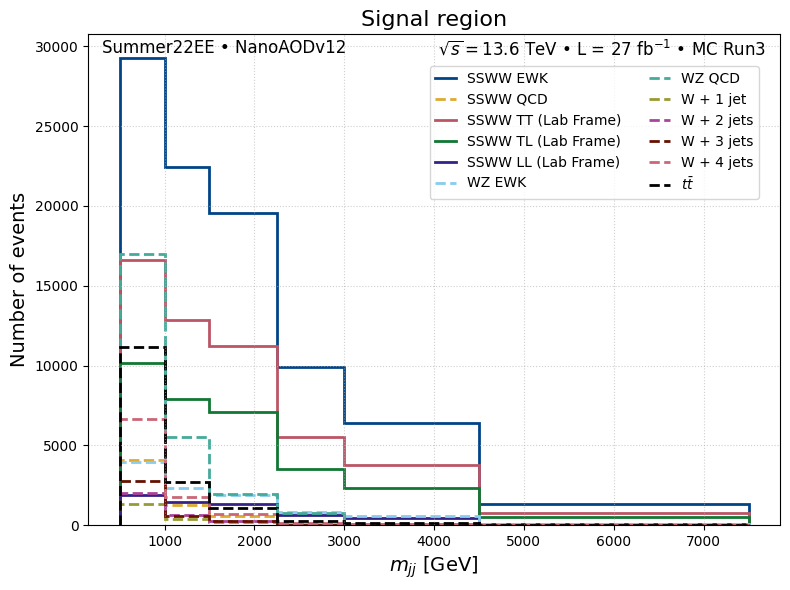

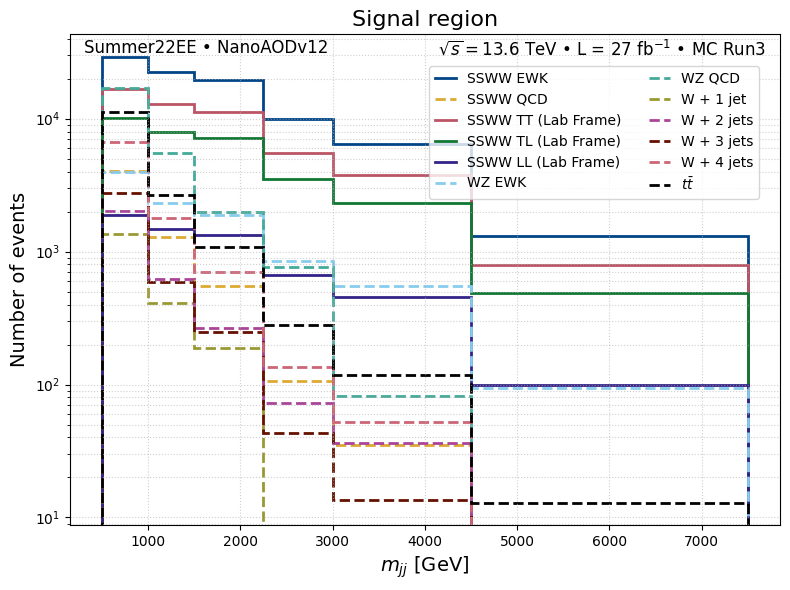

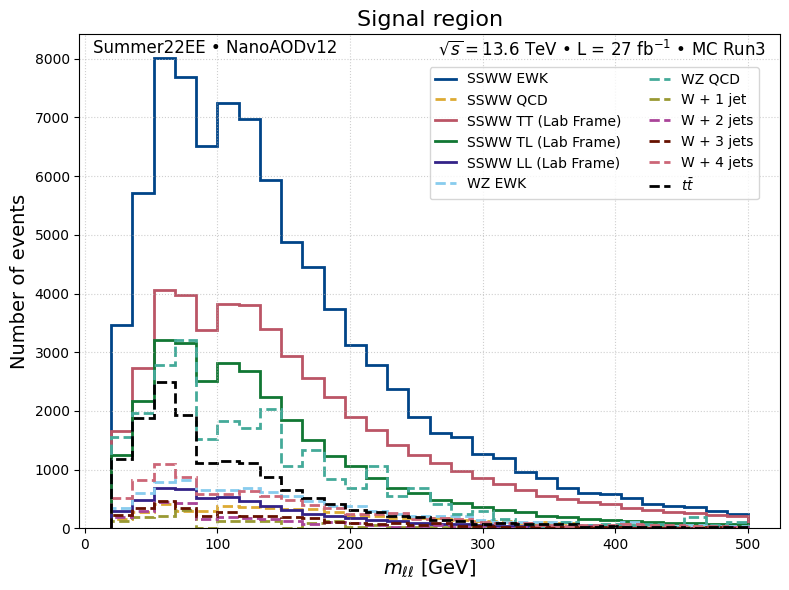

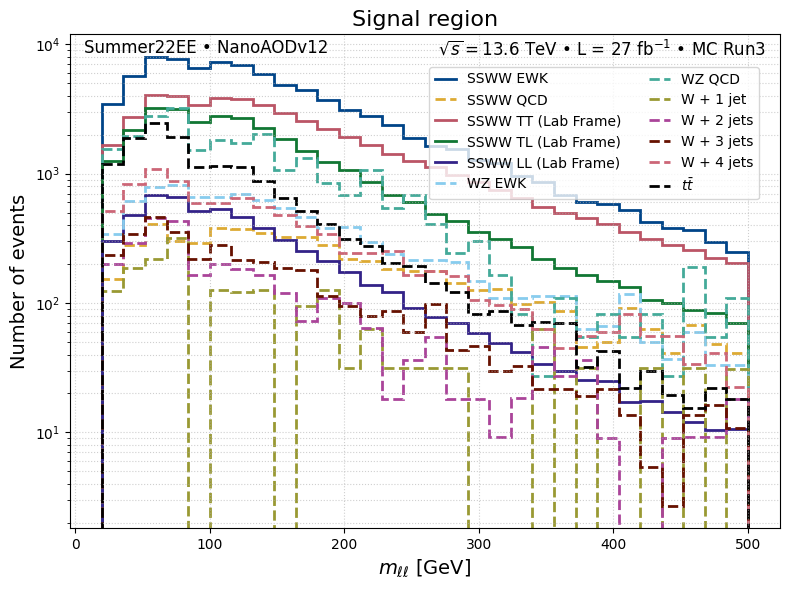

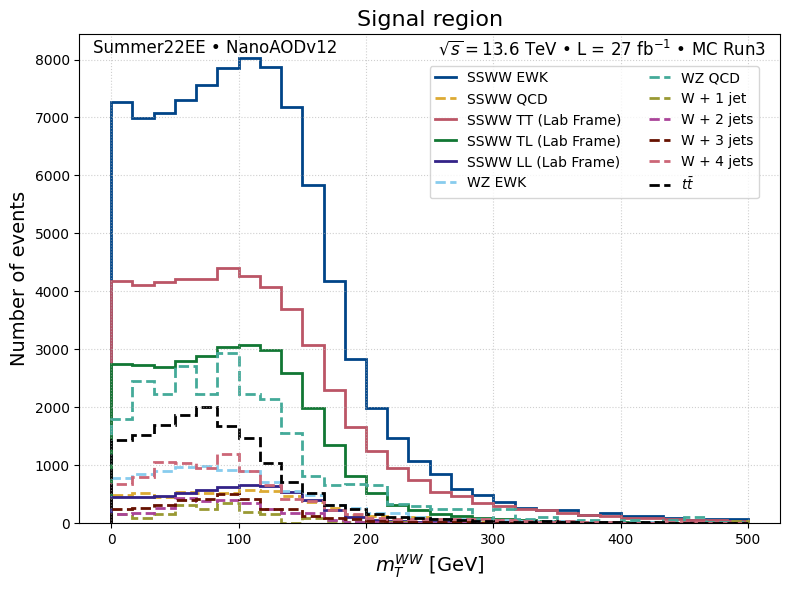

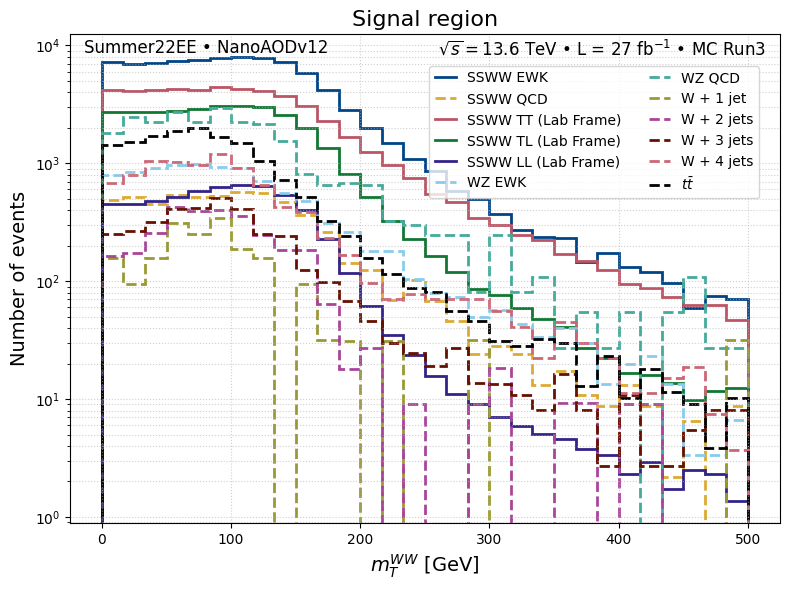

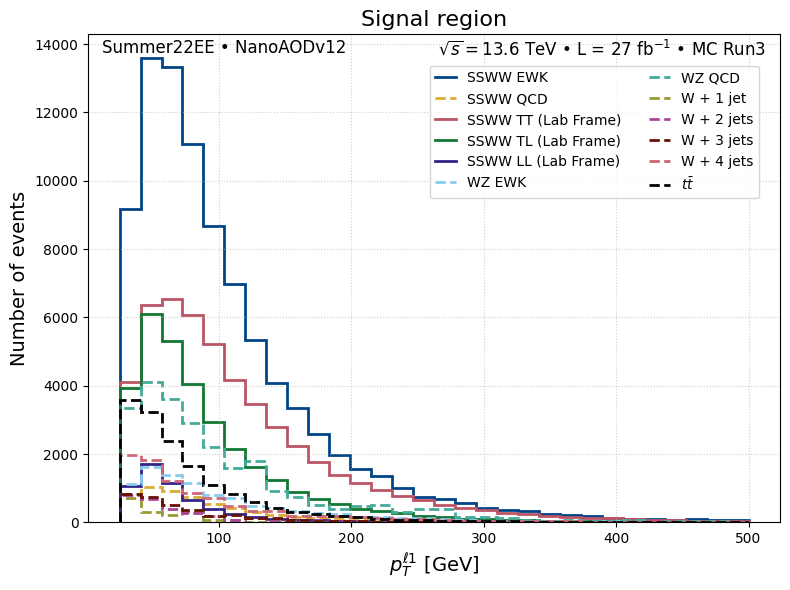

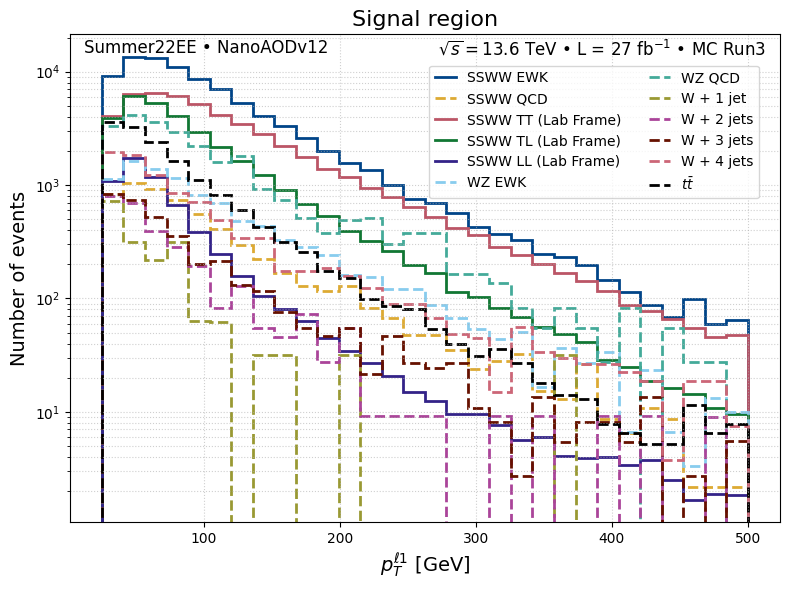

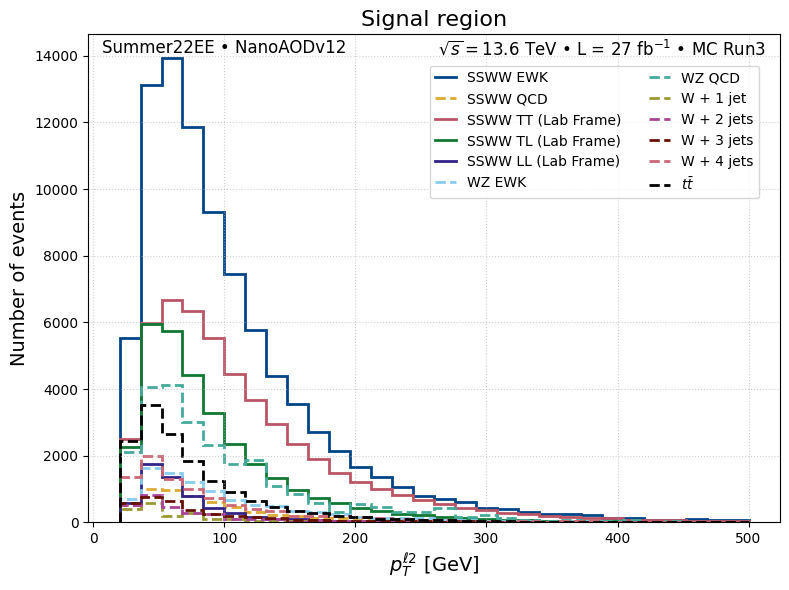

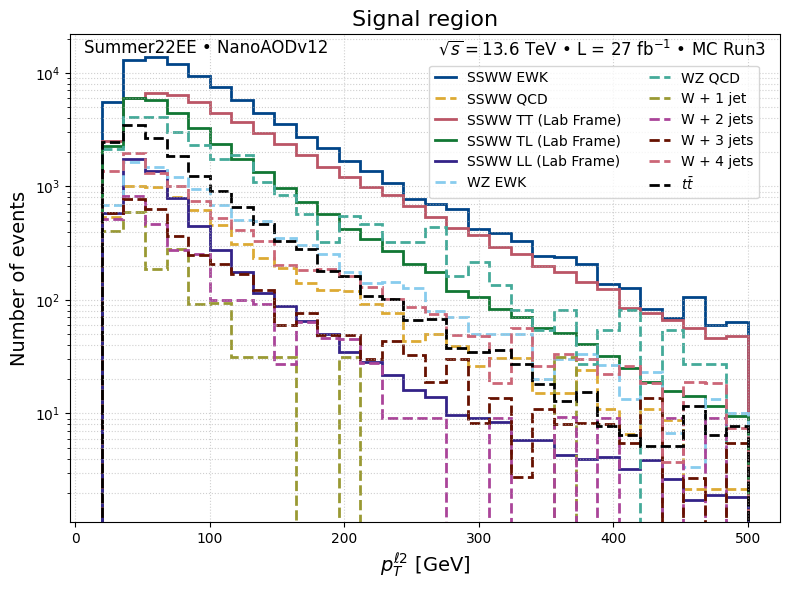

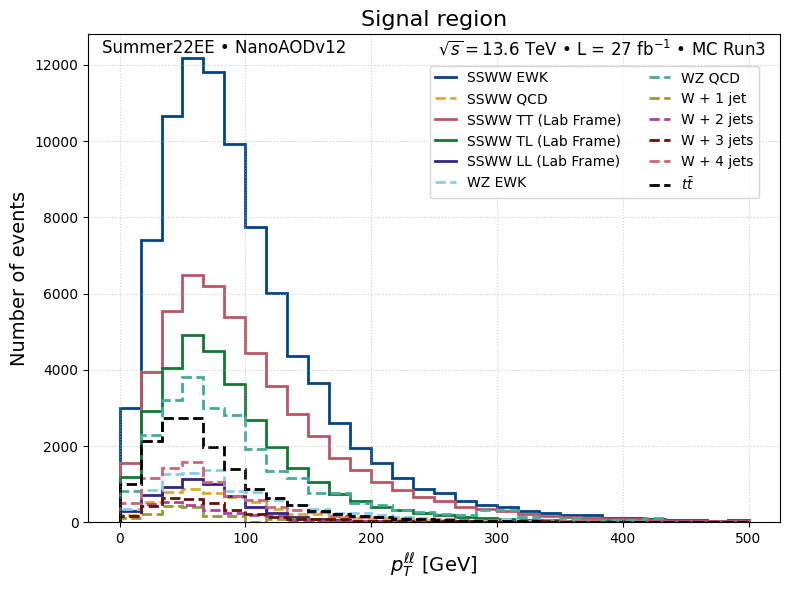

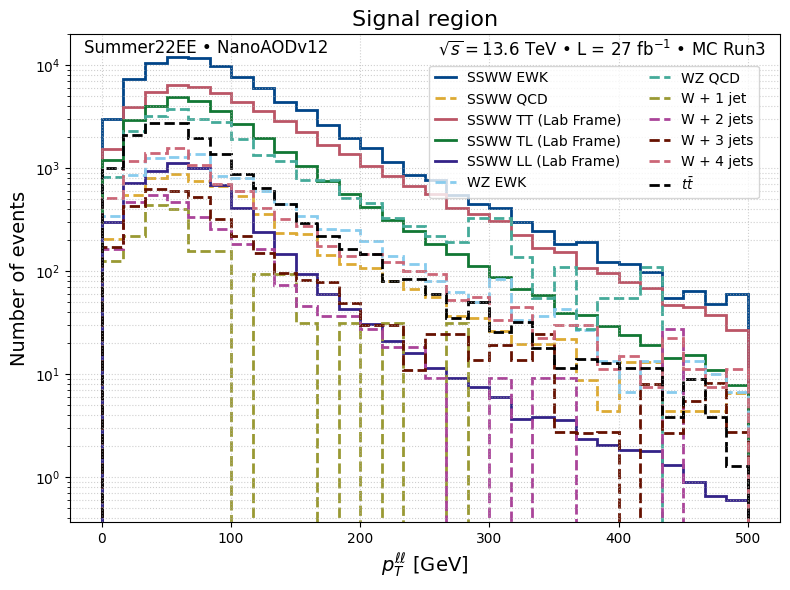

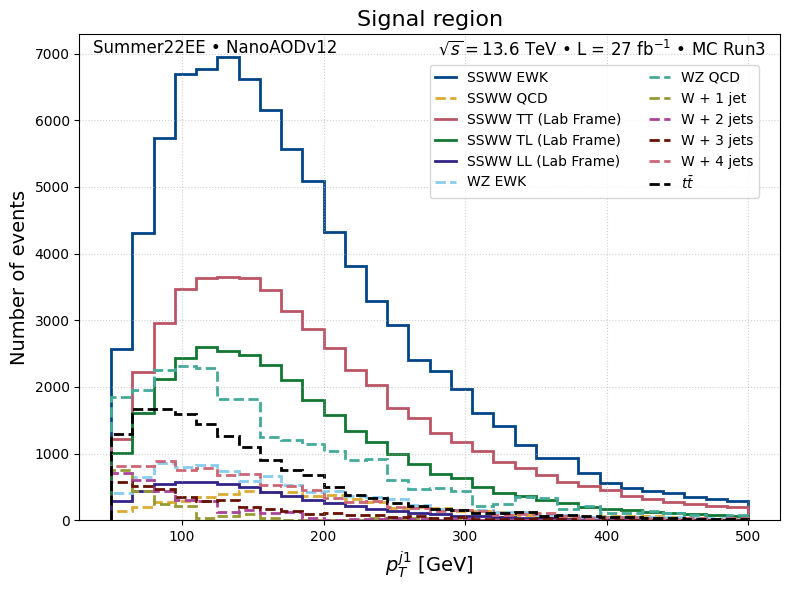

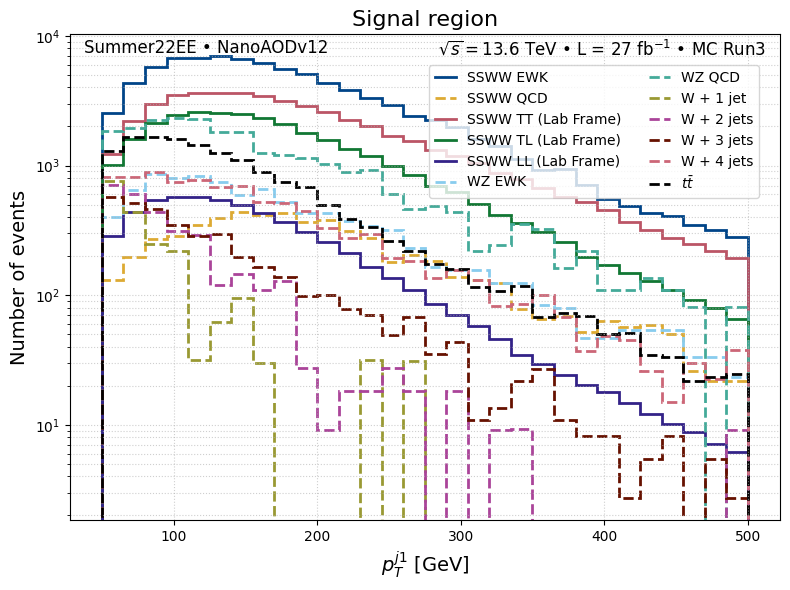

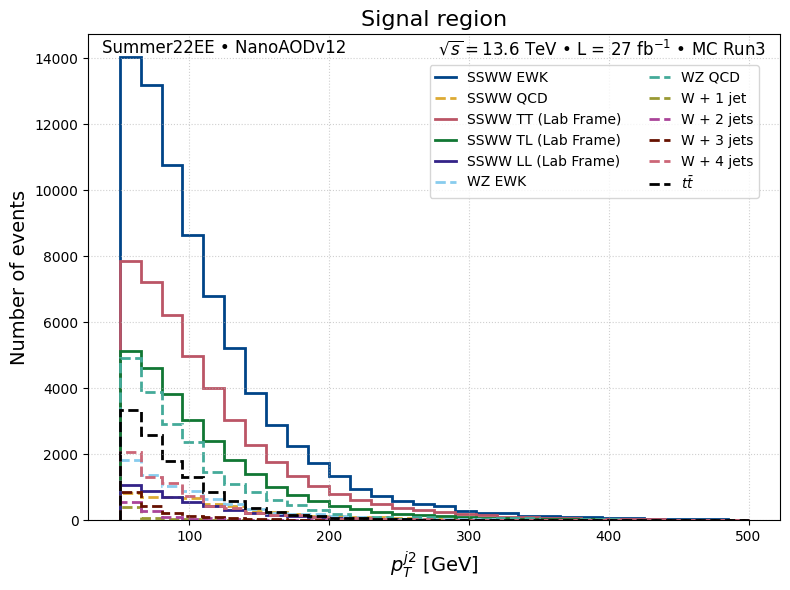

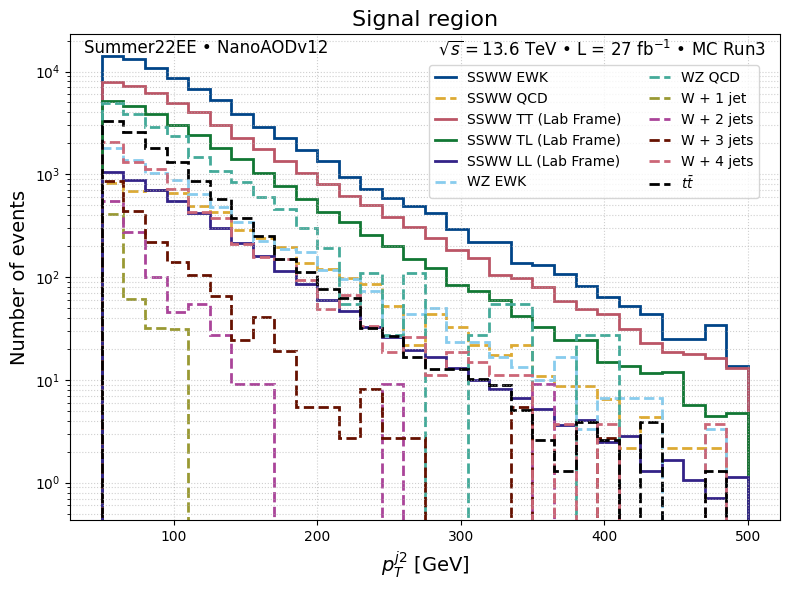

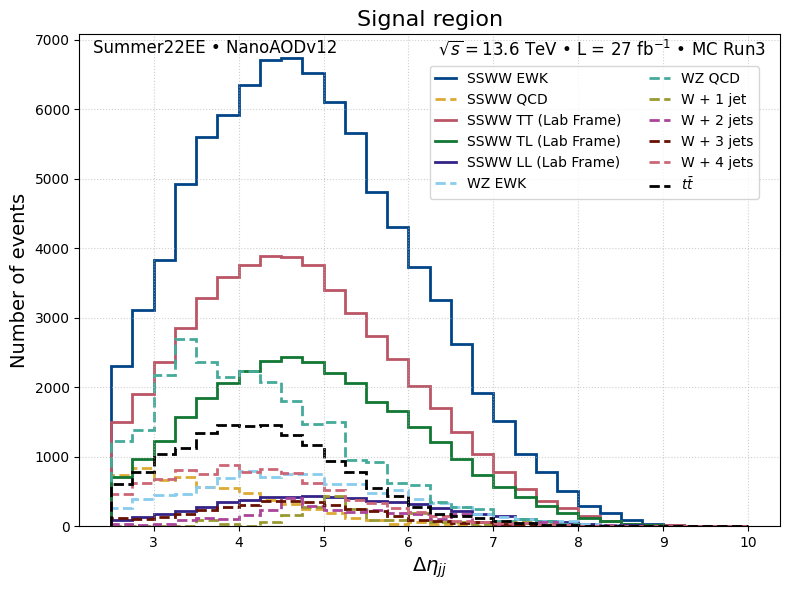

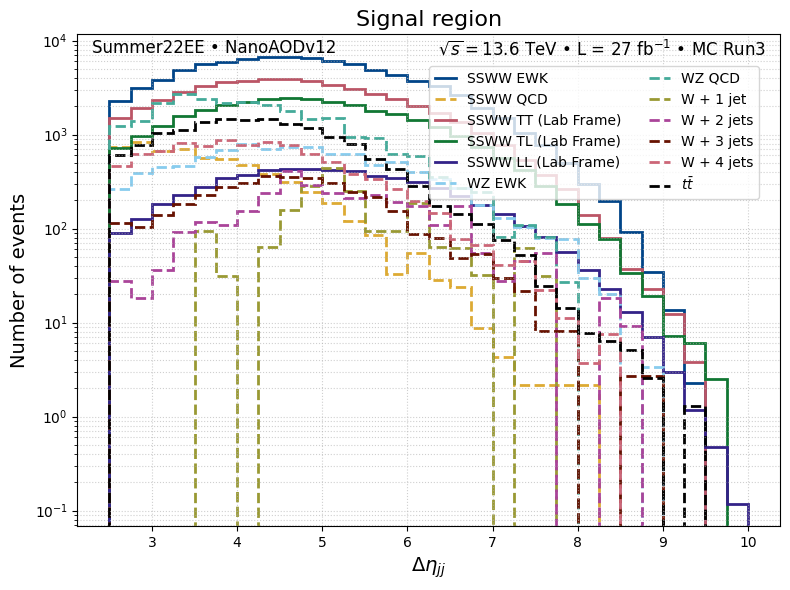

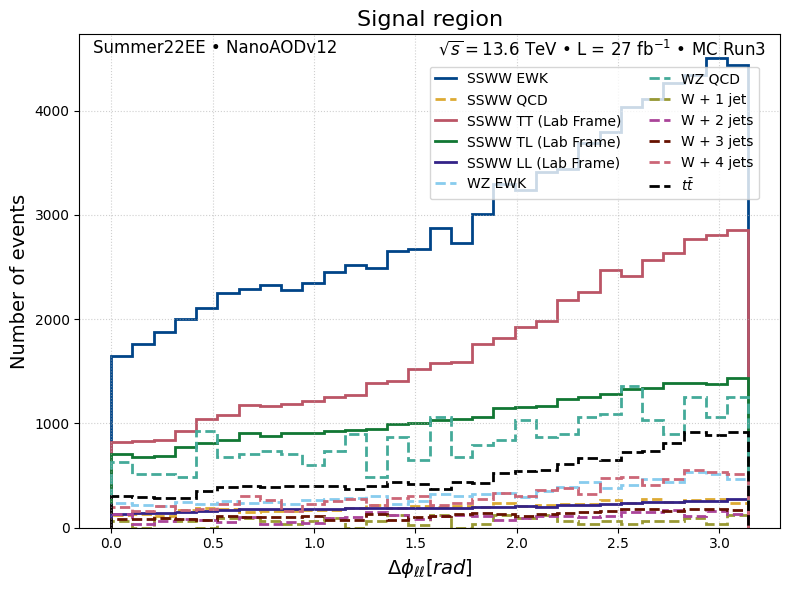

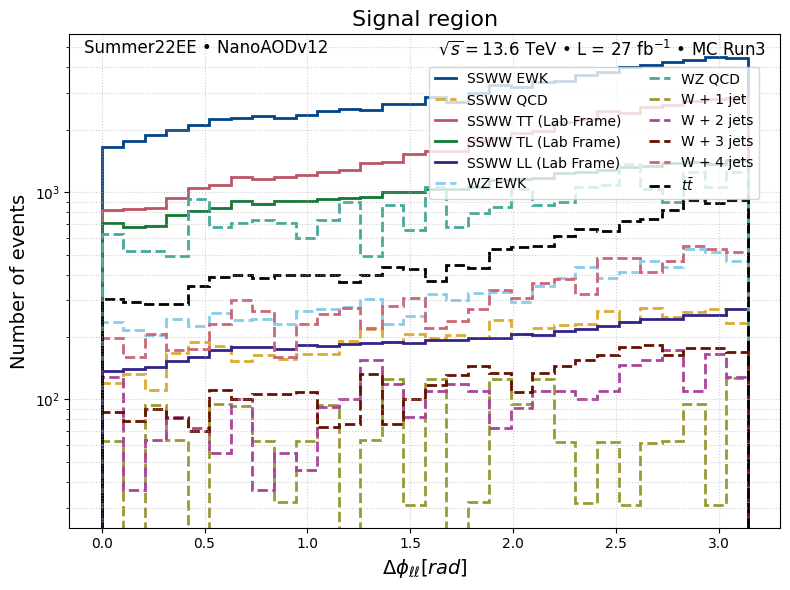

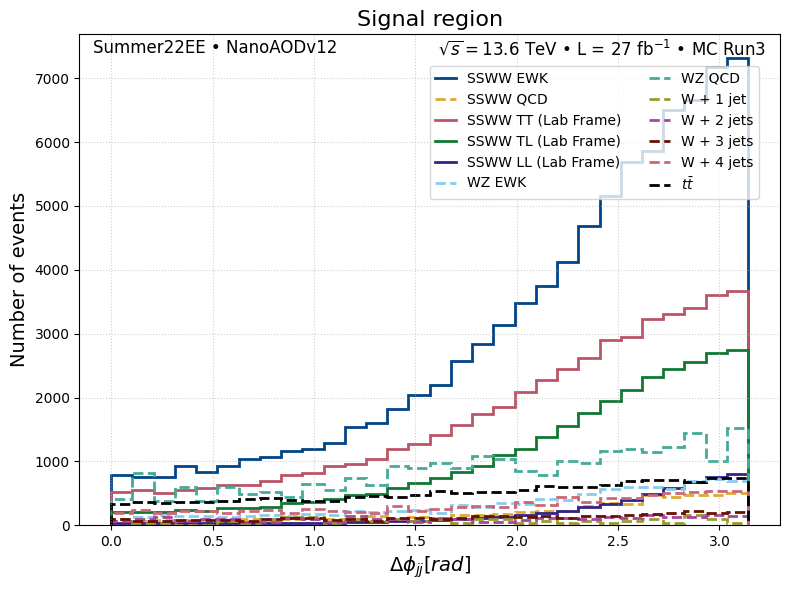

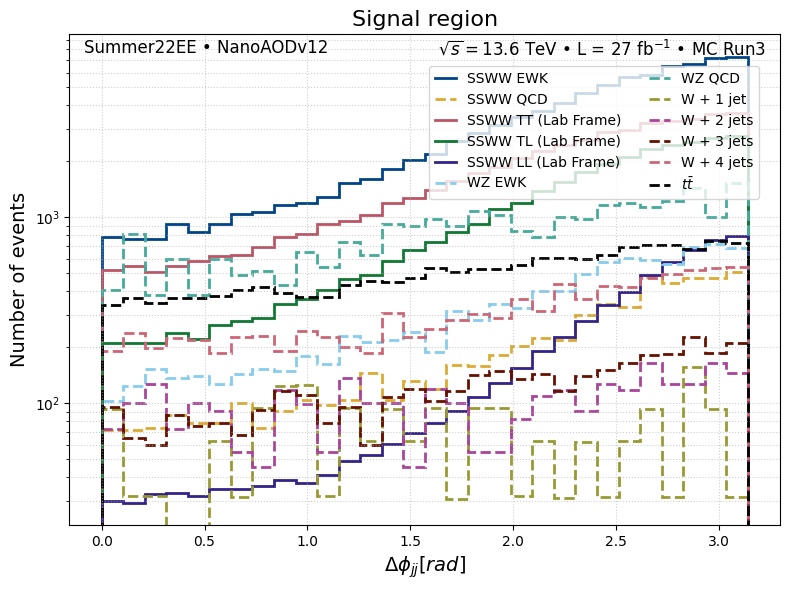

In [42]:

region = 'SR'

rwgt_dict = {
    'SSWW_EWK': 29.5255 * 1000 * 27.007197591 / results['SSWW_EWK']['sumw'],
    'SSWW_QCD': 27.9662 * 1000 * 27.007197591 / results['SSWW_QCD']['sumw'],
    'SSWW_TT': 17.635 * 1000 * 27.007197591 / results['SSWW_TT']['sumw'],
    'SSWW_TL': 11.700 * 1000 * 27.007197591 / results['SSWW_TL']['sumw'],
    'SSWW_LL': 2.190 * 1000 * 27.007197591 / results['SSWW_LL']['sumw'],
    'WZ_EWK': 42.9366 * 1000 * 27.007197591 / results['WZ_EWK']['sumw'],
    'WZ_QCD': 495.8618 * 0.7 * 1000 * 27.007197591 / results['WZ_QCD']['sumw'],
    'W_1JET': 9158 * 1000 * 27.007197591 / results['W_1JET']['sumw'],  
    'W_2JET': 2938 * 1000 * 27.007197591 / results['W_2JET']['sumw'],        
    'W_3JET': 861.4 * 1000 * 27.007197591 / results['W_3JET']['sumw'],        
    'W_4JET': 418.6 * 1000 * 27.007197591 / results['W_4JET']['sumw'],        
    'TTBAR': 923.6*0.1086*3*(1-0.1086*3)*2*1000 * 27.007197591 / results['TTBAR']['sumw']
}

colors = {
    'SSWW_EWK': '#004488',   # Blu scuro
    'SSWW_QCD': '#DDAA33',   # Giallo ocra
    'SSWW_TT': '#BB5566',    # Rosso mattone
    'SSWW_TL': '#117733',    # Verde scuro
    'SSWW_LL': '#332288',    # Viola
    'WZ_EWK': '#88CCEE',     # Azzurro
    'WZ_QCD': '#44AA99',     # Verde acqua
    'W_1JET': '#999933',     # Verde oliva
    'W_2JET': '#AA4499',     # Magenta
    'W_3JET': '#661100',     # Marrone
    'W_4JET': '#CC6677',     # Rosa scuro
    'TTBAR': '#000000'       # Nero
}

labels = {
    'SSWW_EWK': 'SSWW EWK',
    'SSWW_QCD': 'SSWW QCD',
    'SSWW_TT': 'SSWW TT (Lab Frame)',
    'SSWW_TL': 'SSWW TL (Lab Frame)',
    'SSWW_LL': 'SSWW LL (Lab Frame)',
    'WZ_EWK': 'WZ EWK',
    'WZ_QCD': 'WZ QCD',
    'W_1JET': 'W + 1 jet',
    'W_2JET': 'W + 2 jets',
    'W_3JET': 'W + 3 jets',
    'W_4JET': 'W + 4 jets',
    'TTBAR': r'$t\bar{t}$'
}

samples = [
    'SSWW_EWK', 'SSWW_QCD', 'SSWW_TT', 'SSWW_TL', 'SSWW_LL',
    'WZ_EWK', 'WZ_QCD', 'W_1JET', 'W_2JET', 'W_3JET', 'W_4JET', 'TTBAR'
]

xlabels = {
    'mjj': r"$m_{jj}$ [GeV]",
    'mll': r"$m_{\ell\ell}$ [GeV]",
    'mtWW': r"$m_{T}^{WW}$ [GeV]",
    'ptl1': r"$p_{T}^{\ell 1}$ [GeV]",
    'ptl2': r"$p_{T}^{\ell 2}$ [GeV]",
    'ptll': r"$p_{T}^{\ell\ell}$ [GeV]",
    'ptj1': r"$p_{T}^{j 1}$ [GeV]",
    'ptj2': r"$p_{T}^{j 2}$ [GeV]",
    'detajj': r"$\Delta\eta_{jj}$",
    'dphill': r"$\Delta\phi_{\ell\ell} [rad]$",
    'dphijj': r"$\Delta\phi_{jj} [rad]$"
}

def plot_variable(variable, region='SR', log_scale=False, suffix=''):
    if variable not in xlabels:
        raise ValueError(f"La variabile '{variable}' non è nella lista predefinita.")

    plt.figure(figsize=(8, 6))

    for sample in samples:
        h = results[sample]['histos'][variable][:, hist.loc(region)]
        values = h.values() * rwgt_dict[sample]
        edges = h.axes[0].edges

        linestyle = '-' if sample in ['SSWW_EWK', 'SSWW_TT', 'SSWW_TL', 'SSWW_LL'] else '--'
        plt.stairs(
            values,
            edges,
            label=labels.get(sample, sample),
            color=colors.get(sample, sample),
            linewidth=2.0,
            linestyle=linestyle
        )

    plt.xlabel(xlabels[variable], fontsize=14)
    plt.ylabel("Number of events", fontsize=14)
    plt.title(f"Signal region", fontsize=16)

    plt.legend(
        fontsize=10,
        loc="center right", 
        bbox_to_anchor=(0.98, 0.80),
        ncol=2,
        frameon=True,
        handlelength=1.5
    )

    plt.grid(True, which="both", ls=":", alpha=0.6)
    if log_scale:
        plt.yscale("log")

    plt.text(
        0.02, 0.99,
        "Summer22EE • NanoAODv12",
        transform=plt.gca().transAxes,
        fontsize=12,
        verticalalignment='top'
    )
    plt.text(
        0.98, 0.99,
        r"$\sqrt{s} = 13.6$ TeV • L = 27 fb$^{-1}$ • MC Run3",
        transform=plt.gca().transAxes,
        fontsize=12,
        verticalalignment='top',
        horizontalalignment='right'
    )

    plt.tight_layout()
    plt.savefig(f"/gwpool/users/ggianoli/spritz/plots/Full2022EEv12/Signal_Region_newcut/{variable}{suffix}.pdf")
    plt.show()
    plt.close()

# Loop su tutte le variabili che ti interessano
variables_to_plot = list(xlabels.keys())
for var in variables_to_plot:
    plot_variable(var, region='SR', log_scale=False, suffix="_linear")
    plot_variable(var, region='SR', log_scale=True, suffix="_log")




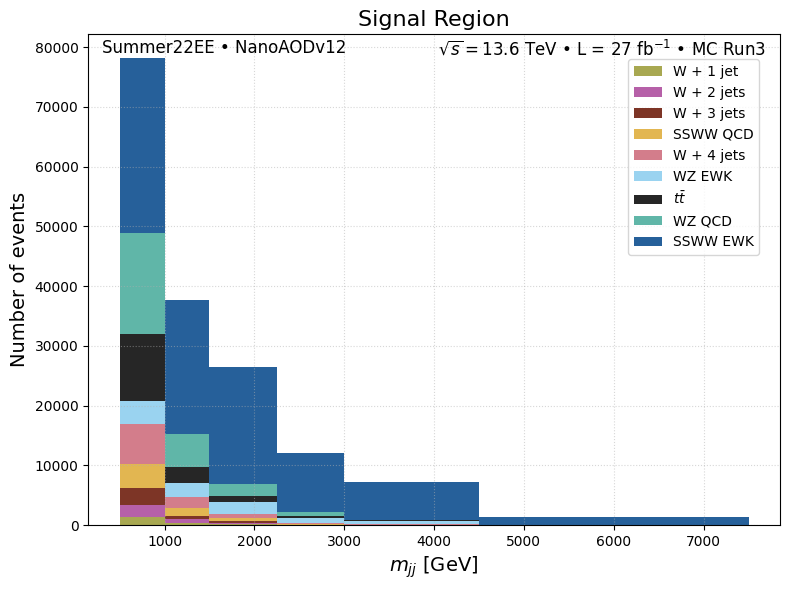

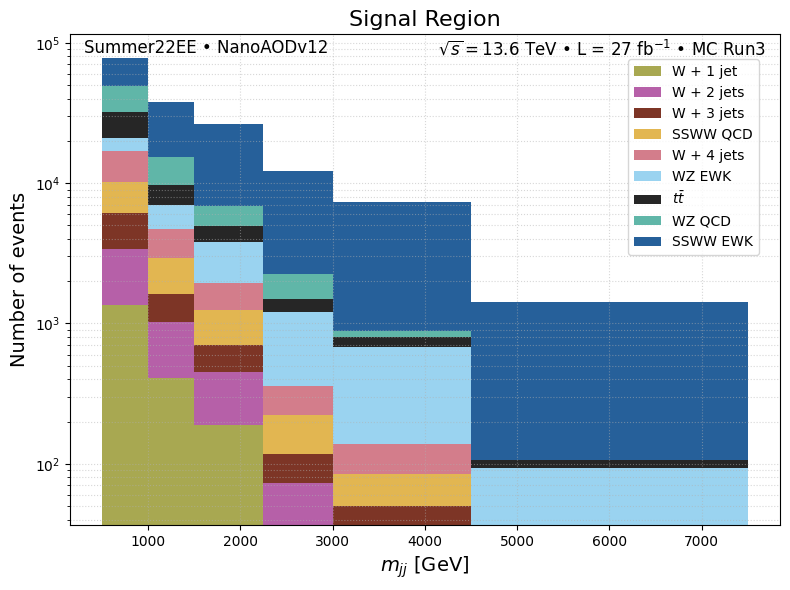

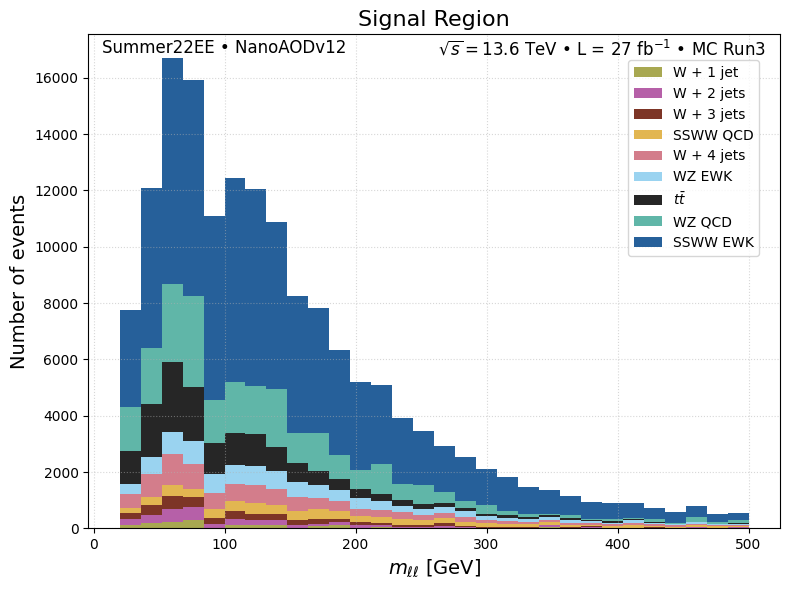

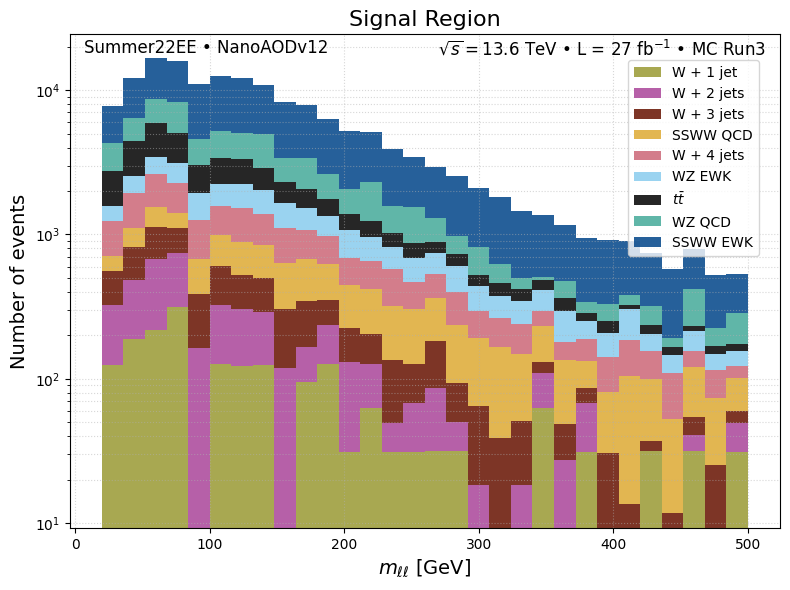

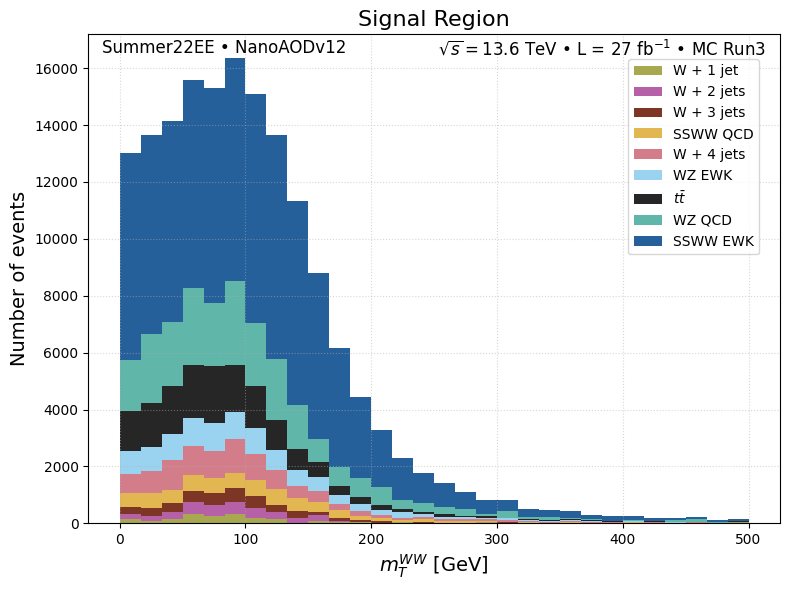

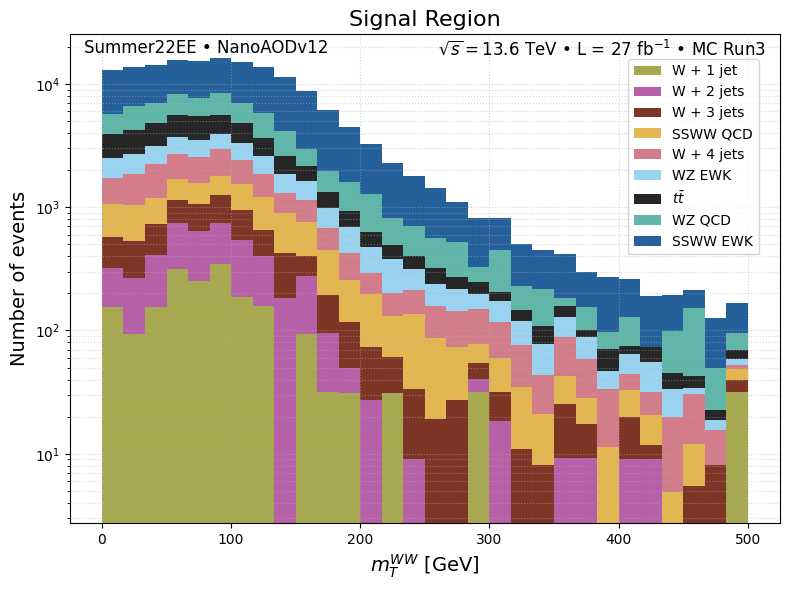

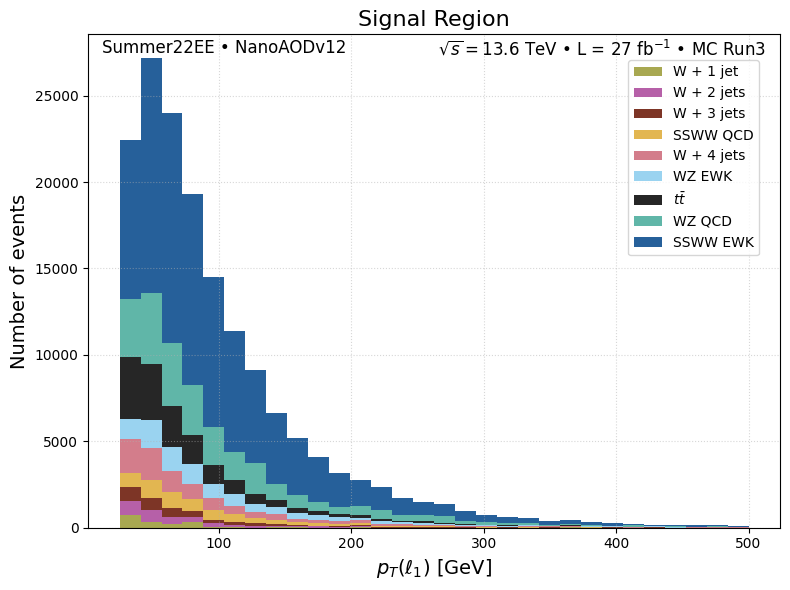

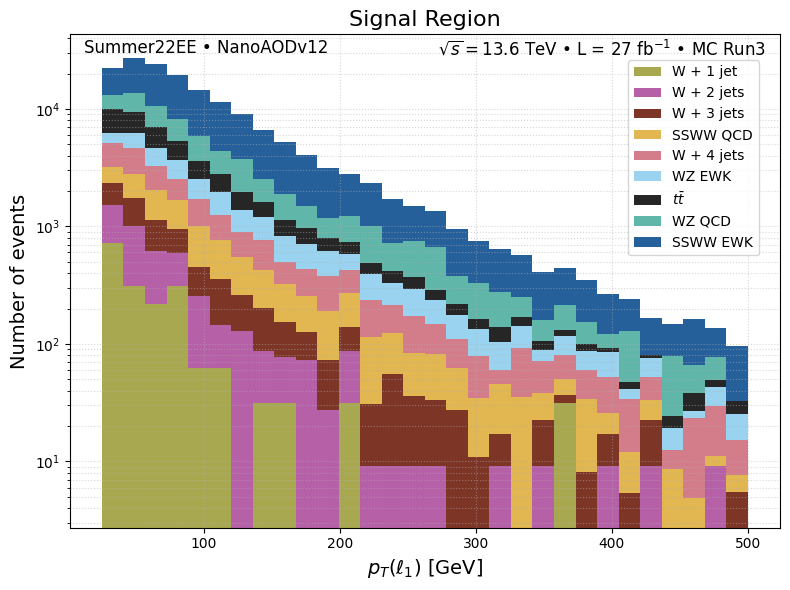

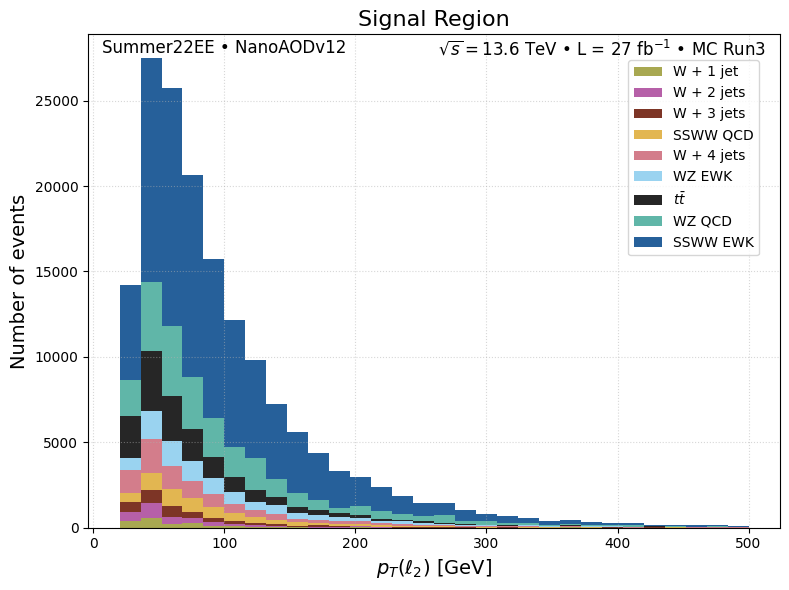

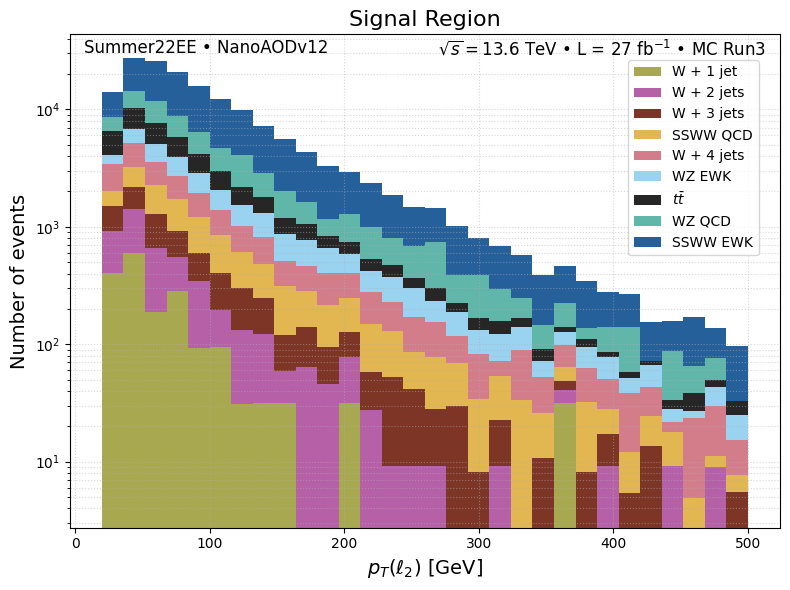

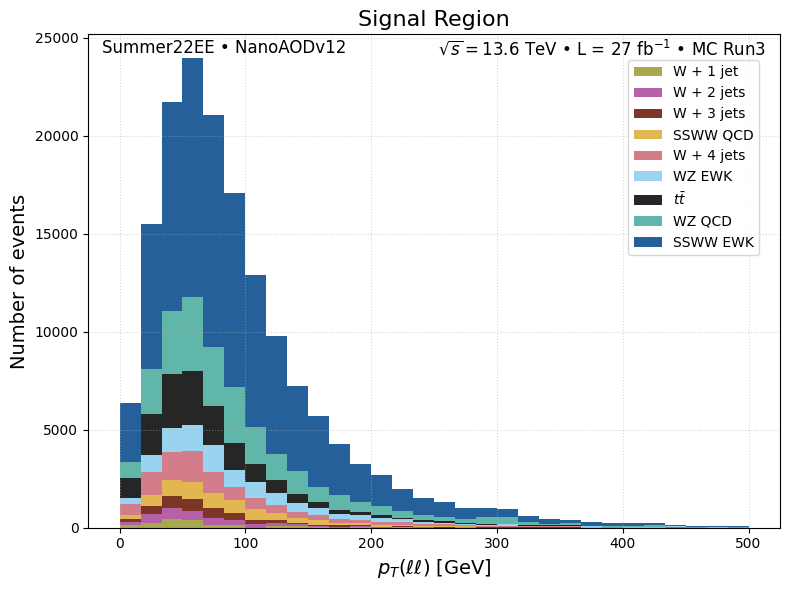

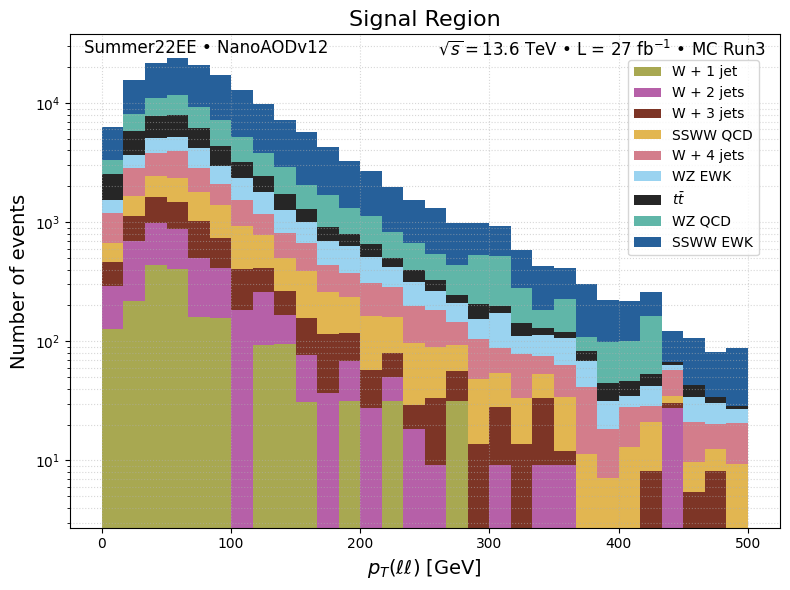

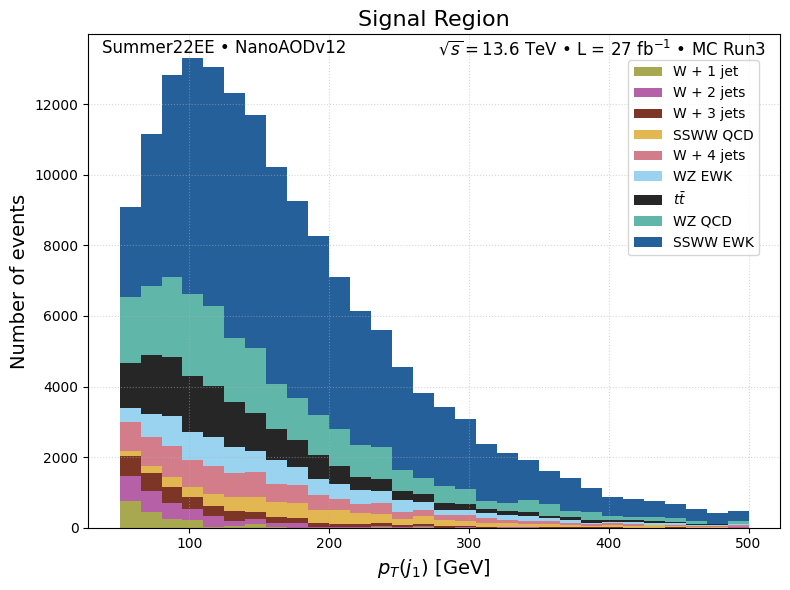

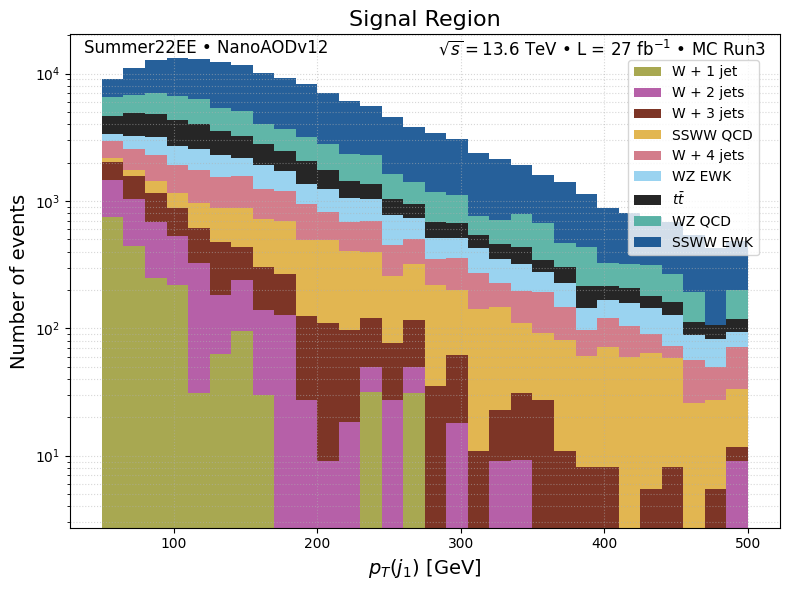

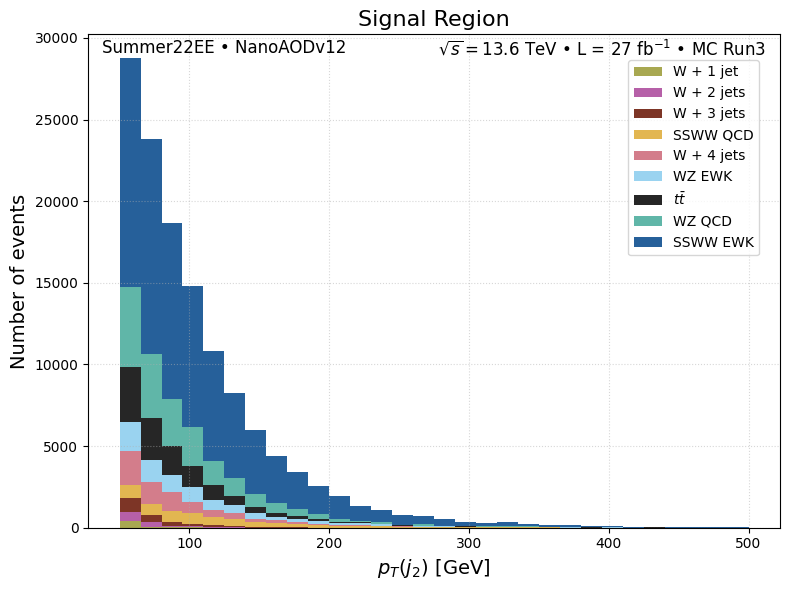

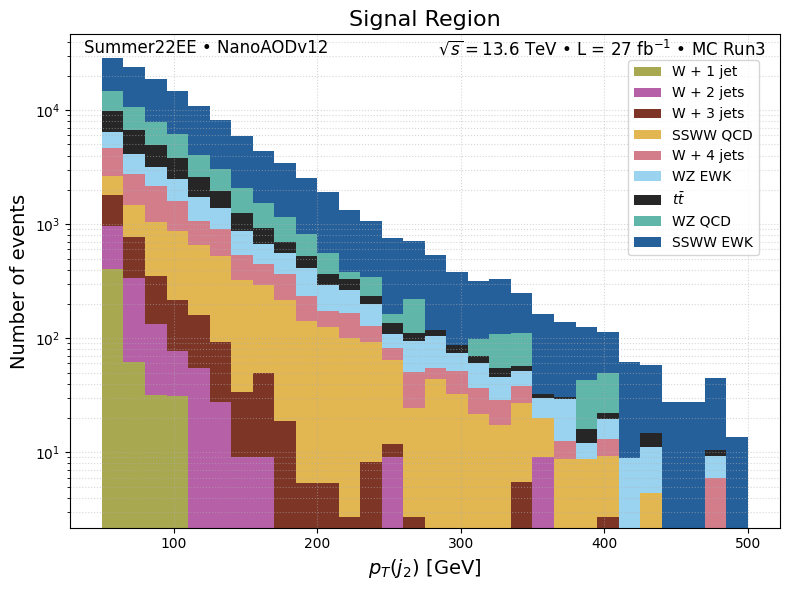

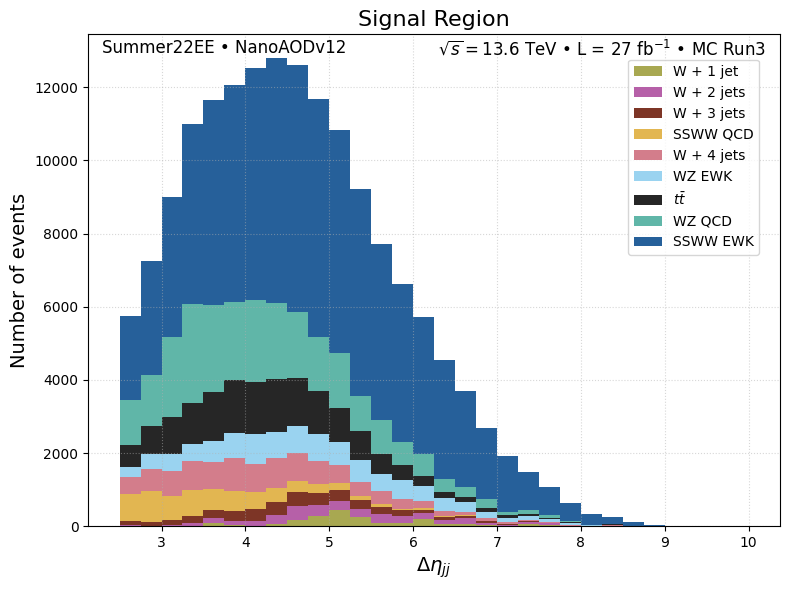

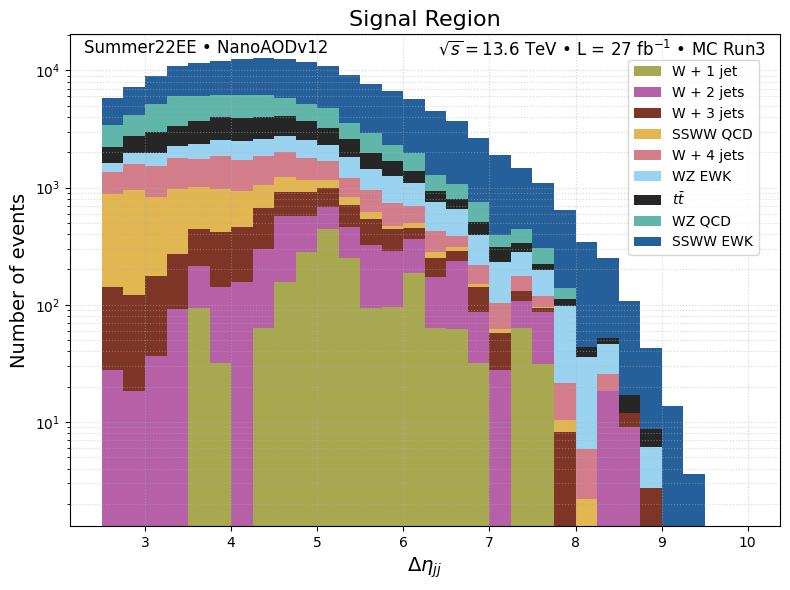

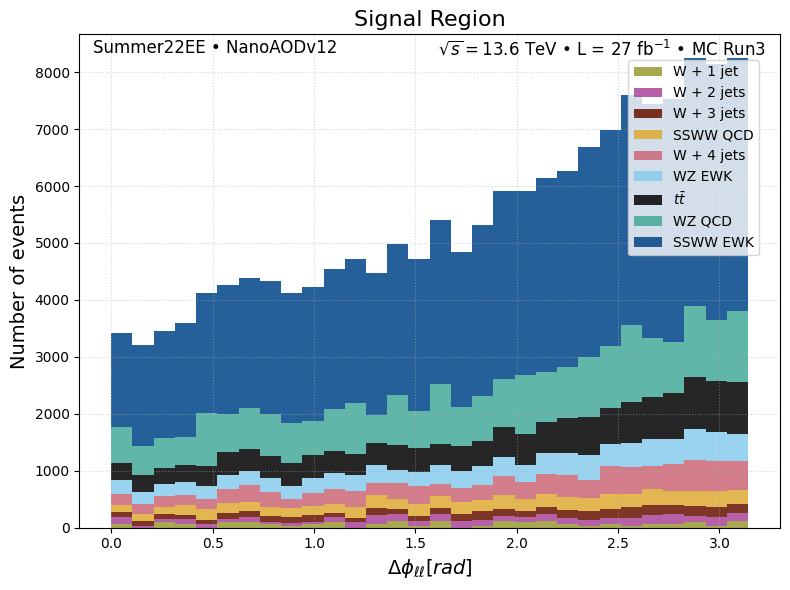

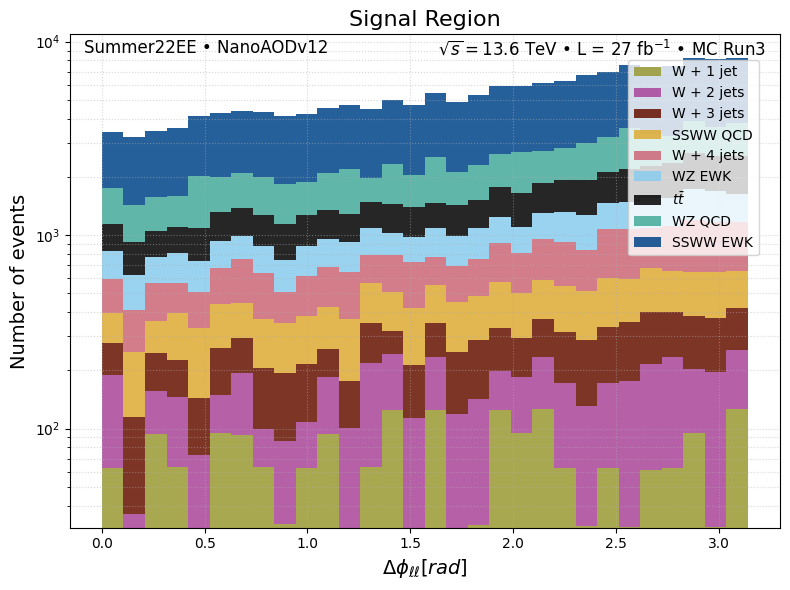

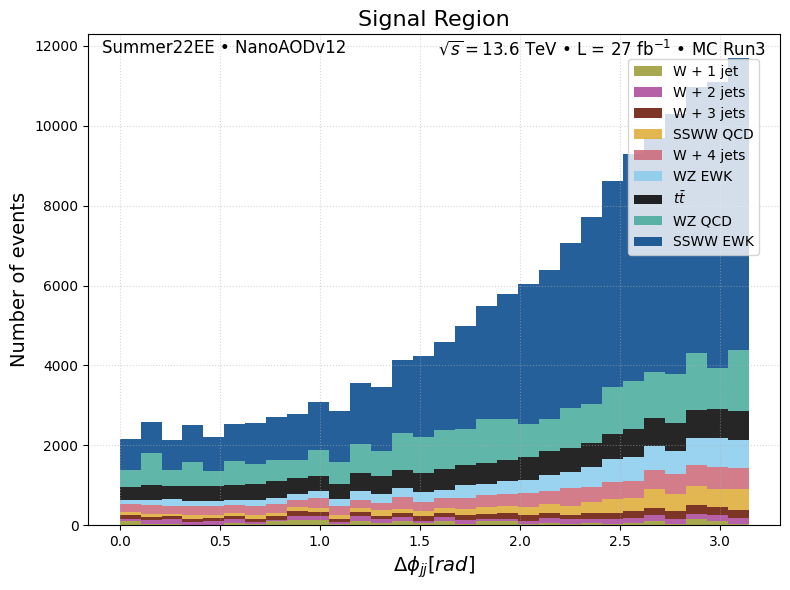

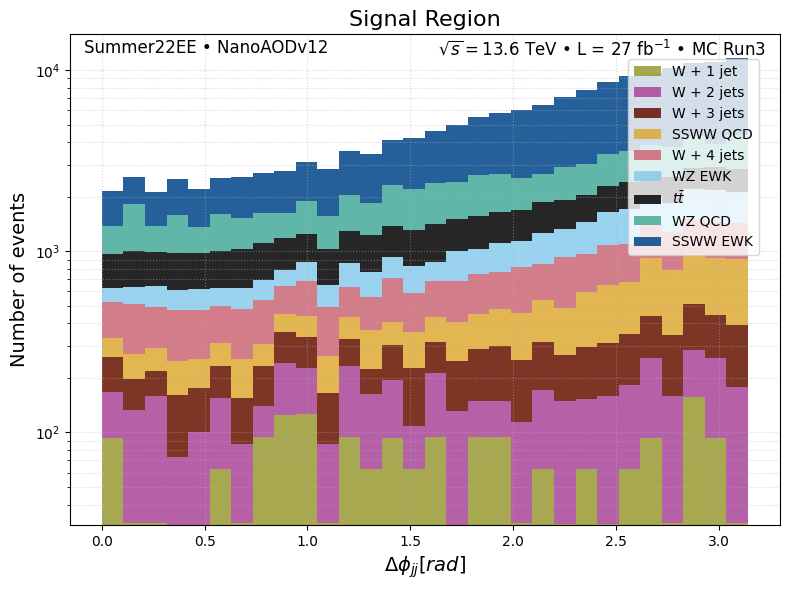

In [43]:
import numpy as np
import matplotlib.pyplot as plt

region = 'SR'

variables = [
    'mjj', 'mll', 'mtWW', 'ptl1', 'ptl2', 'ptll',
    'ptj1', 'ptj2', 'detajj', 'dphill', 'dphijj'
]

xlabels = {
    'mjj': r"$m_{jj}$ [GeV]",
    'mll': r"$m_{\ell\ell}$ [GeV]",
    'mtWW': r"$m_T^{WW}$ [GeV]",
    'ptl1': r"$p_T(\ell_1)$ [GeV]",
    'ptl2': r"$p_T(\ell_2)$ [GeV]",
    'ptll': r"$p_T(\ell\ell)$ [GeV]",
    'ptj1': r"$p_T(j_1)$ [GeV]",
    'ptj2': r"$p_T(j_2)$ [GeV]",
    'detajj': r"$\Delta\eta_{jj}$",
    'dphill': r"$\Delta\phi_{\ell\ell} [rad]$",
    'dphijj': r"$\Delta\phi_{jj} [rad]$"
}

colors = {
    'SSWW EWK': '#004488',   # Blu scuro
    'SSWW QCD': '#DDAA33',   # Giallo ocra
    'WZ EWK': '#88CCEE',     # Azzurro
    'WZ QCD': '#44AA99',     # Verde acqua
    'W + 1 jet': '#999933',  # Verde oliva
    'W + 2 jets': '#AA4499', # Magenta
    'W + 3 jets': '#661100', # Marrone
    'W + 4 jets': '#CC6677', # Rosa scuro
    'TTBAR': '#000000'       # Nero
}

labels = {
    'SSWW EWK': 'SSWW EWK',
    'SSWW QCD': 'SSWW QCD',
    'WZ EWK': 'WZ EWK',
    'WZ QCD': 'WZ QCD',
    'W + 1 jet': 'W + 1 jet',
    'W + 2 jets': 'W + 2 jets',
    'W + 3 jets': 'W + 3 jets',
    'W + 4 jets': 'W + 4 jets',
    'TTBAR': r'$t\bar{t}$'
}

rwgt_dict = {
    'SSWW_EWK': 29.5255 * 1000 * 27.007197591 / results['SSWW_EWK']['sumw'],
    'SSWW_QCD': 27.9662 * 1000 * 27.007197591 / results['SSWW_QCD']['sumw'],
    'WZ_EWK': 42.9366 * 1000 * 27.007197591 / results['WZ_EWK']['sumw'],
    'WZ_QCD': 495.8618 * 0.7 * 1000 * 27.007197591 / results['WZ_QCD']['sumw'],
    'W_1JET': 9158 * 1000 * 27.007197591 / results['W_1JET']['sumw'],
    'W_2JET': 2938 * 1000 * 27.007197591 / results['W_2JET']['sumw'],
    'W_3JET': 861.4 * 1000 * 27.007197591 / results['W_3JET']['sumw'],
    'W_4JET': 418.6 * 1000 * 27.007197591 / results['W_4JET']['sumw'],
    'TTBAR': 923.6 * 0.1086 * 3 * (1 - 0.1086 * 3) * 2 * 1000 * 27.007197591 / results['TTBAR']['sumw']
}

# Ordinamento 
def get_sorted_plot_order(histos):
    signal = 'SSWW EWK'
    backgrounds = [k for k in histos if k != signal]
    sorted_backgrounds = sorted(backgrounds, key=lambda k: histos[k].values().sum())
    return sorted_backgrounds + [signal]

def plot_stacked_general(variable, histos, log_scale=False, suffix=''):
    fig, ax = plt.subplots(figsize=(8, 6))

    edges = histos['SSWW EWK'].axes[0].edges
    bin_centers = 0.5 * (edges[1:] + edges[:-1])
    widths = edges[1:] - edges[:-1]

    bottom = np.zeros_like(bin_centers)
    plot_order = get_sorted_plot_order(histos)

    for sample in plot_order:
        vals = histos[sample].values()
        ax.bar(
            bin_centers, vals, width=widths,
            bottom=bottom,
            label=labels.get(sample, sample),
            color=colors.get(sample, sample),
            alpha=0.85,
            edgecolor='none'
        )
        bottom += vals

    xlabel = xlabels.get(variable, variable)
    ax.set_xlabel(xlabel, fontsize=14)
    ax.set_ylabel("Number of events", fontsize=14)
    ax.set_title("Signal Region", fontsize=16)
    ax.legend(fontsize=10, loc="center right", bbox_to_anchor=(0.98, 0.75))
    ax.grid(True, which="both", ls=":", alpha=0.5)
    if log_scale:
        ax.set_yscale("log")

    ax.text(0.02, 0.99, "Summer22EE • NanoAODv12",
            transform=ax.transAxes, fontsize=12, verticalalignment='top')
    ax.text(0.98, 0.99,
            r"$\sqrt{s} = 13.6$ TeV • L = 27 fb$^{-1}$ • MC Run3",
            transform=ax.transAxes, fontsize=12,
            verticalalignment='top', horizontalalignment='right')

    plt.tight_layout()
    plt.savefig(f"/gwpool/users/ggianoli/spritz/plots/Full2022EEv12/Signal_Region_newcut/{variable}_stacked{suffix}.pdf")
    plt.show()
    plt.close()

for variable in variables:
    histos = {
        'SSWW QCD': results['SSWW_QCD']['histos'][variable][:, hist.loc(region)] * rwgt_dict['SSWW_QCD'],
        'SSWW EWK': results['SSWW_EWK']['histos'][variable][:, hist.loc(region)] * rwgt_dict['SSWW_EWK'],
        'WZ QCD': results['WZ_QCD']['histos'][variable][:, hist.loc(region)] * rwgt_dict['WZ_QCD'],
        'WZ EWK': results['WZ_EWK']['histos'][variable][:, hist.loc(region)] * rwgt_dict['WZ_EWK'],
        'W + 1 jet': results['W_1JET']['histos'][variable][:, hist.loc(region)] * rwgt_dict['W_1JET'],
        'W + 2 jets': results['W_2JET']['histos'][variable][:, hist.loc(region)] * rwgt_dict['W_2JET'],
        'W + 3 jets': results['W_3JET']['histos'][variable][:, hist.loc(region)] * rwgt_dict['W_3JET'],
        'W + 4 jets': results['W_4JET']['histos'][variable][:, hist.loc(region)] * rwgt_dict['W_4JET'],
        'TTBAR': results['TTBAR']['histos'][variable][:, hist.loc(region)] * rwgt_dict['TTBAR'],
    }

    plot_stacked_general(variable, histos, log_scale=False, suffix="_linear")
    plot_stacked_general(variable, histos, log_scale=True, suffix="_log")
